<a href="https://colab.research.google.com/github/KLeeDE/Data-Science/blob/master/Outcomes%20of%20gentrification_local%20changes%20to%20median%20income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP20 // Assignment #4 (GGD: Total = 46 / 45)**

assigned : **Apr 13, 2020**

DUE : **Apr 19, 2020 11:59pm**

## Outcomes of gentrification: local changes to median income

<img src="https://cdn.theatlantic.com/assets/media/img/mt/2015/08/20720085886_db5d1f89e8_o/lead_720_405.jpg?mod=1533691764" width=500>

---

In class we discussed the definition of gentrification and the outcomes associated with that process.  Our specific example was the changing demographic makeup of Philadelphia over the period of 2000 to 2016.  In this assignment, we'll be doing an identical comparison, but considering local changes to median income.

<u>**Instructions for tasks that will be graded are in bold below.**</u>

### PART 1 - Loading and Working With the Census Data **(GGD: +14)**


<b> Link your google drive and install geopandas. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install geopandas

import geopandas as gp

# Additional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 931kB 4.8MB/s 
     |████████████████████████████████| 10.4MB 15.0MB/s 
     |████████████████████████████████| 14.7MB 267kB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<b> Load in the pre-cleaned 2000 and 2016 median income data from the `data/acs/income/` directory <u>as well as</u> the 2000 and 2016 shapefiles (in the `data/acs/ctshapes` directory).  Make sure that you call the census tract GeoDataFrames `ct00` and `ct16`.</b>

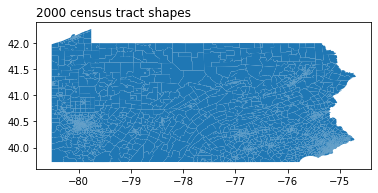

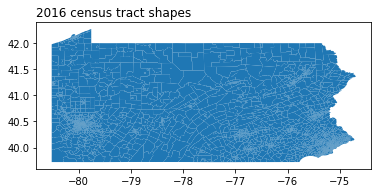

In [2]:
ci00 = pd.read_csv("/content/drive/My Drive/mlpp20/data/acs/income/census_income_2000.csv")
ci16 = pd.read_csv("/content/drive/My Drive/mlpp20/data/acs/income/census_income_2016.csv")

ct00 = gp.read_file("/content/drive/My Drive/mlpp20/data/acs/ctshapes/2000/tr42_d00.shp")
ct16 = gp.read_file("/content/drive/My Drive/mlpp20/data/acs/ctshapes/2016/cb_2016_42_tract_500k.shp")

ax00 = ct00.plot()
ax16 = ct16.plot()

txt00 = ax00.set_title("2000 census tract shapes", loc="left")
txt16 = ax16.set_title("2016 census tract shapes", loc="left")

<b> In the income DataFrames, rename the column `"Median household income in 1999"` to `"income_2000"` and the column `"Median income (dollars); Estimate; Households"` to `"income_2016"` (print the heads of the DataFrames to see if it worked).</b>

In [3]:
ci00.columns = ["Id2_2000", "income_2000"]
ci16.columns = ["Id2_2016", "income_2016"]

print(ci00.head())
print("")
print(ci16.head())

      Id2_2000  income_2000
0  42101000100      48886.0
1  42101000200       8349.0
2  42101000300      40625.0
3  42101000400      27400.0
4  42101000500       9620.0

      Id2_2016  income_2016
0  42101000100     103772.0
1  42101000200      50455.0
2  42101000300      93036.0
3  42101000401      57604.0
4  42101000402      70038.0


In order to compare 2000 dollars to 2016 dollars we need to adjust for inflation.  We could assume a model for inflation, but instead, let's just adjust the 2000 data so that it has the same mean as the 2016 data.

<b> First, plot a histogram of the 2000 incomes and a histogram of the 2016 incomes, each with 50 bins and range 0 to 140000 and `alpha=0.5`. 

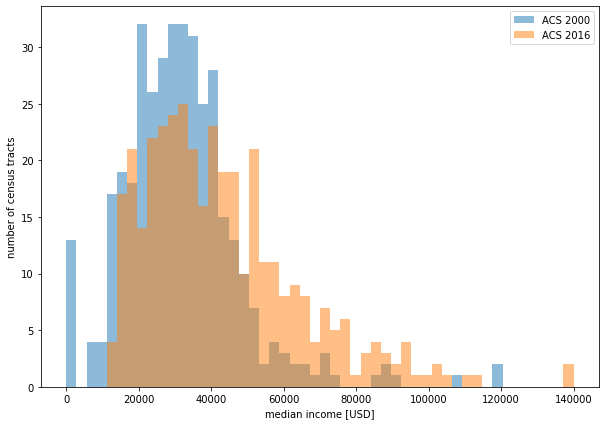

In [4]:
fig, ax = plt.subplots(figsize=[10,7])
dum = ax.hist(ci00["income_2000"], range=[0, 140000], bins=50, alpha=0.5, label="ACS 2000")
dum = ax.hist(ci16["income_2016"], range=[0, 140000], bins=50, alpha=0.5, label="ACS 2016")
ax.set_xlabel("median income [USD]")
ax.set_ylabel("number of census tracts")
ax.legend()
fig.show()

You can see that the 2016 incomes are a bit higher on average.

<b> Now calculate the ratio between the mean 2016 income and mean 2000 income.  Create a column in the 2000 income DataFrame called `"income_2000_adj"` that is `"income_2000"` times that ratio.  Print the mean of `"income_2016"` and `"income_2000_adj"` to make sure that they are now the same and replot the histograms above with the 2016 and 2000 adjusted incomes. (GGD: why adjust 2016?)</b>

Mean of the 2016 income is          : $43380.21
Mean of the adjusted 2000 income is : $43380.21


Text(0.5, 1.0, 'Income (2016) and Adjusted Income (2010 & 2016)')

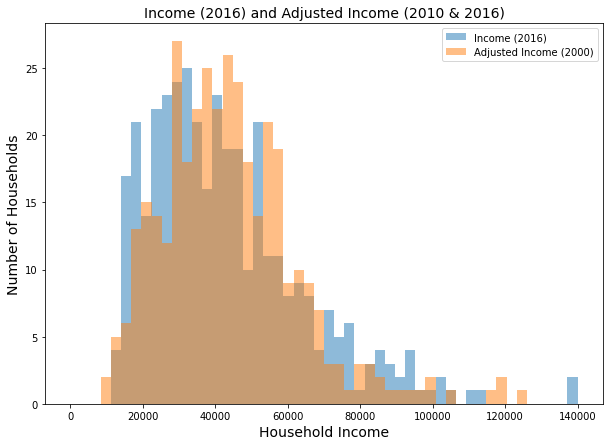

In [5]:
# -- Calculate the ratio between the mean 2016 income and mean 2000 income
ratio = ci16["income_2016"].mean() / ci00["income_2000"].mean() 
ci00["income_2000_adj"] = ci00["income_2000"] * ratio

# -- Print the mean of "income_2016" and "income_2000_adj" to make sure that they are now the same
print("Mean of the 2016 income is          : ${0:.2f}".format(ci16["income_2016"].mean()))
print("Mean of the adjusted 2000 income is : ${0:.2f}".format(ci00["income_2000_adj"].mean()))

# --  Replot the histograms above with the 2016 and 2000 adjusted incomes
fig, ax = plt.subplots(figsize=[10,7])
ax.hist(ci16["income_2016"], range=[0,140000], bins=50, alpha=0.5, label="Income (2016)")
ax.hist(ci00["income_2000_adj"], range=[9,140000], bins=50, alpha=0.5, label="Adjusted Income (2000)")
ax.set_xlabel("Household Income", fontsize=14)
ax.set_ylabel("Number of Households", fontsize=14)
ax.legend()
plt.title("Income (2016) and Adjusted Income (2010 & 2016)", fontsize=14)

The 2000 incomes have now been adjusted to 2016 levels$^{\dagger}$ so that we can now take meaningful differences.

<small>$^{\dagger}$ under several assumptions! </small>

### PART 2 - Merging and Visualizing the Data **(GGD: +7)**

Now we'd like to make some maps of the income data.  Before we do that, we need to clean up the census tract GeoDataFrames a bit.

<b>As we did in class, create a proper `"GEOID"` for year 2000 and coerce both year 2000 and year 2016 `"GEOID"`s into integers.</b>




In [0]:
ct00["GEOID"] = ct00["STATE"] + ct00["COUNTY"] + ct00["TRACT"]
ct00["GEOID"] = ct00["GEOID"].str.ljust(11, "0")
ct00.head()

ct00["GEOID"] = ct00["GEOID"].astype(int)
ct16["GEOID"] = ct16["GEOID"].astype(int)

<b> Now, merge the 2000 income data into the 2000 census tract GeoDataFrame, creating a new GeoDataFrame called `inc00sh`, and merge the 2016 income data into the 2016 census tract GeoDataFrame creating a new GeoDataFrame called `inc16sh`.</b>

In [0]:
inc00sh = ct00.merge(ci00, left_on="GEOID", right_on="Id2_2000")
inc16sh = ct16.merge(ci16, left_on="GEOID", right_on="Id2_2016")

<b> Plot the adjusted 2000 incomes on a map with `vmin = 20000` and `vmax = 120000`.  Do the same for the 2016 incomes.  Make sure to include the legend (colorbar) and add text to indicate what those color values represent. 

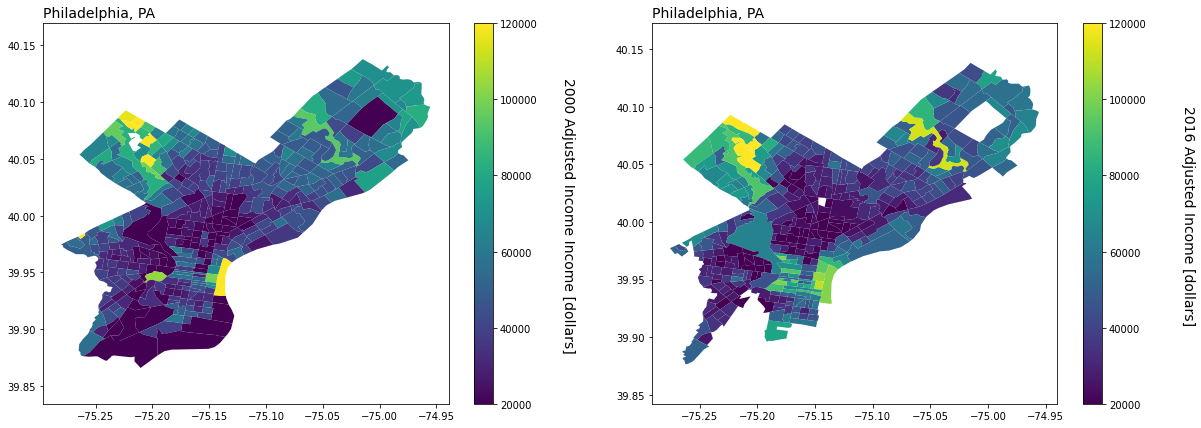

In [8]:
fig, ax = plt.subplots(1,2, figsize=[20,7])

inc00sh.plot("income_2000_adj", legend=True, vmin=20000, vmax=120000, ax=ax[0])
ax[0].axis("equal")
ax[0].set_title("Philadelphia, PA", loc="left", fontsize=14)
fig.text(0.49, 0.5, "2000 Adjusted Income Income [dollars]", ha="center", va="center", rotation=-90, fontsize=14)
fig.show()

inc16sh.plot("income_2016", legend=True, vmin=20000, vmax=120000, ax=ax[1])
ax[1].axis("equal")
ax[1].set_title("Philadelphia, PA", loc="left", fontsize=14)
fig.text(0.92, 0.5, "2016 Adjusted Income [dollars]", ha="center", va="center", rotation=-90, fontsize=14)
fig.show()

**What those color values represent**: *The color values represent the level of adjusted income difference in 2000 and 2016. The income is adjusted at the ratio between the mean 2016 income and mean 2000 income. According to the data result, we can find that the adjusted income has been increased from 2000, which imply that gentrification has been occurred in Philadelphia.*

We can already see some differences popping out, especially with respect to Center City (and Fishtown) and North Philadelphia.  To properly visulize those, we'd like to take the difference of these two maps.

### PART 3 - Interpolating to 2000 data on 2016 Locations **(GGD: +20)**

In class, merging the 2000 data into the 2016 GeoDataFrame resulted in a lot of dropped census tracts b/c the definition of the census tracts changed over time.  To recover those, we need an estimate of the adjusted 2000 income value at each 2016 census tract.  We can do this by interpolating (using Gaussian Process Regression [aka Kriging]) the adjusted 2000 values onto the 2016 locations.

<b> Import the GaussianProcessRegressor model as well as the ConstantKernel and RBF kernels. </b>

In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

<b> As we did in class (see the `mlpp20/week8/day1/mlpp20_gentrification_example_review.ipynb` notebook), create the features array (lat/lon) and labeled data (2000 adjusted median incomes) for the model from the `inc00sh` GeoDataFrame.  Make sure to use `.values.copy()` for these so that these are numpy arrays and not pandas Series objects. </b>

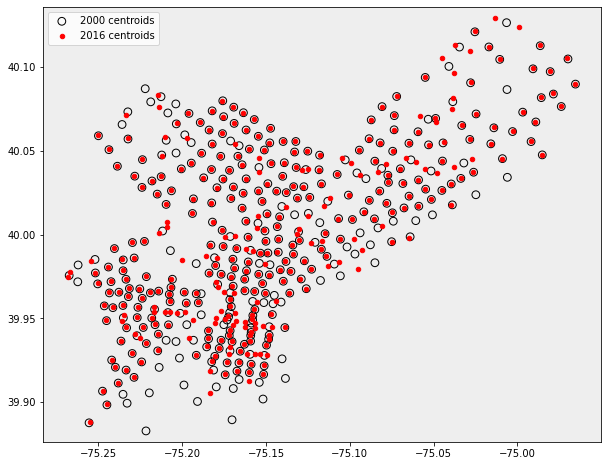

In [10]:
# -- Create the features array(lat/lon)
# -- labeled data (2000 adjusted median incomes) for the model from the inc00sh GeoDataFrame
lon00 = inc00sh.centroid.x
lat00 = inc00sh.centroid.y

lon16 = inc16sh.centroid.x
lat16 = inc16sh.centroid.y

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(lon00, lat00, facecolor="none", color="k", s=60, label="2000 centroids")
ax.scatter(lon16, lat16, c="r", s=20, label="2016 centroids")
ax.set_facecolor("#EEEEEE")
ax.legend()
ax.axis("equal")
fig.show()

In [0]:
# --Need the usual 2D array of Nobj x Nfeat
pos00 = np.vstack([lon00, lat00]).T

# --and an Nobj "target"
# -- Make sure to use .values.copy() for these so that these are numpy arrays and not pandas Series objects.
wf00 = inc00sh["income_2000_adj"].values.copy()

As always, the features need to be standardized.

<b> Standardize the features array across objects and standardize the object labels. </b>

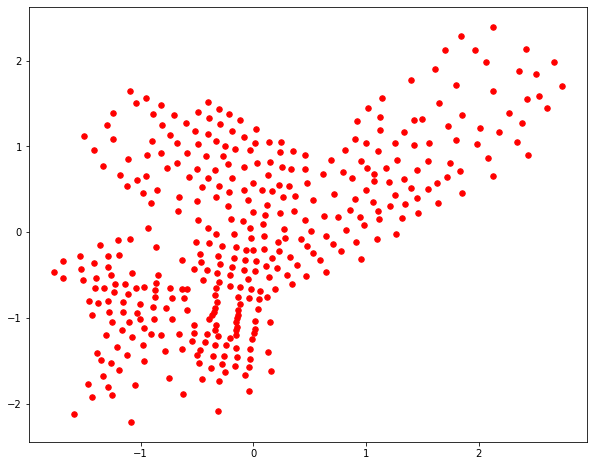

In [12]:
# -- Standardize the features array across objects
pos00m = pos00.mean(0)
pos00s = pos00.std(0)
wf00m = wf00.mean()
wf00s = wf00.std()

pos00 -= pos00m
pos00 /= pos00s
wf00 -= wf00m
wf00 /= wf00s

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(pos00[:, 0], pos00[:, 1], c="r", s=30)

<b> Fit a GPR model to the standardized 2000 data (remember to intialize the kernel).</b>

In [13]:
# -- now we initialize the kernel and fit to the data
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gpr.fit(pos00, wf00)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

The model has now been fit to the 2000 adjusted median income data at the 2000 census tract locations.  Now we want to interpolate onto the 2016 positions.

<b> Create a features array for the 2016 census tract positions making sure to standardize. </b>

In [0]:
# -- now we can use this fit model to predict the 2000 census data at the 2016 
#    census tract centroids

# -- create the features array
pos16 = np.vstack([lon16, lat16]).T

# -- standardize
pos16 -= pos00m
pos16 /= pos00s

<b> Interpolate the trained model onto these positions using the `.predict()` method. </b>

In [0]:
# -- predict
wf16pred = gpr.predict(pos16)

<b> Unstandardize these values so that they are real dollars and put those into a column in `inc16sh` called `"income_2000_interp"`. </b>

In [0]:
# -- now un-standardize and reattatch to the GeoDF
inc16sh["income_2000_interp"] = wf16pred * wf00s + wf00m
inc16sh["income_diff_pred"] = inc16sh["income_2016"] - inc16sh["income_2000_interp"]

So now we have a column of interpolated values of the 2000 adjusted incomes at the locations of the 2016 census tracts.

<b> Make a map of the difference between the 2016 median income and the adjusted 2000 median income using the `coolwarm` color map, `vmin = -20000` and `vmax = 20000`. </b>

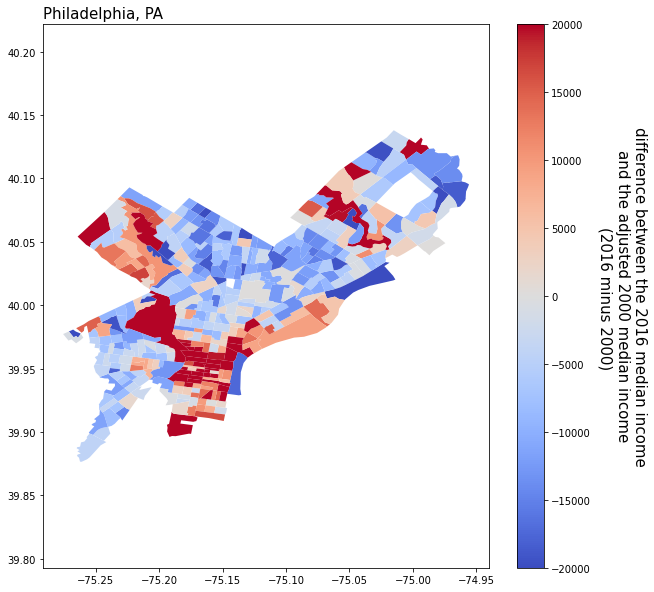

In [17]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
inc16sh.plot("income_diff_pred", cmap="coolwarm", vmin=-20000, vmax=20000, legend=True, ax=ax)
ax.axis("equal")
ax.set_title("Philadelphia, PA", loc="left", fontsize=15)
fig.text(0.93, 0.5, "difference between the 2016 median income \nand the adjusted 2000 median income \n(2016 minus 2000)", ha="center", 
         va="center", rotation=-90, fontsize=15)
fig.show()

**Describe the spatial similarity between this map and the map of 2000/2016 demographic differences we derived in class**

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoUAAAJQCAYAAAD42h5IAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOzdd3icZ5X///eZpi5LtuTeE6cnlDQg%0AlBBI2YWE3lnCLhB2Iezyg13KsrSwtG3ALksJ2VC/EAgJpJIQUkmIE9spJLbjbstyU+/T5/z+mJE9%0AVh1JI1myPq/rmkuaee7nfm5pNKMz527m7oiIiIjI7BY41g0QERERkWNPQaGIiIiIKCgUEREREQWF%0AIiIiIoKCQhERERFBQaGIiIiIMAODQjP7gpl53m2/md1kZifklfmRma0voC43s6vz7j9gZr8uUjvX%0Am9mPxnjOe3NtqhzjeV8ws5YCyu02s/8YS91jaMMDec9Jysx2mNk3zKx6QLlVuTINZmaT0RYREREZ%0Au9CxbsA4dQKX5b5fDXwJuNfMTnf33jHU82JgV7EbN429AWidxPrvB/6Z7N/VuWSfl2XAm/PKvD33%0AdRnwUuCPk9geERERKdBMDQpT7r429/1aM2sgG1z8JXBjoZXk1TEruPuTk3yJtrzf6cNmVgF8yczq%0A3b059/g7gLXAmbnvFRSKiIhMAzOu+3gYG3JfV+Y/aGYXm9mfzazXzB42s9MHHD+q+3ggMzvFzG4w%0As71m1mdmG83so2YWGFDuDDN7xMxiZrbZzK4Ypr6XmdmDubpazewHZlY1wvVX5tr4TjP7qZl1m1mT%0AmX1+mPIvMLO1ufqfNLOXDTh+VPexmb3YzG41swO539FTZvau4dozDkc9L7nf/5nAD4FbgbeY2Uz9%0AYCIiInJcOV6CwpW5rwfzHlsO/DvwZbIZqfnAL8c4jm0JsAX4ENks5A+ALwKf7C9gZmXA3UAl8E7g%0AX4Fv5q5PXrkLgD/k2vhm4KO5On9YQDv+HejLnfcD4PNm9uEBZcqBHwPfB94ExIGbzax8hHpXAI8A%0A7wMuB24Cfmhm7yigTYVYmfva/7y8A0jmrvMLoA54dZGuJSIiIhMwY7M0eRmm1cB3gG6yQVe/ucAF%0A7r4tVz4A/AY4GXiukGu4+73AvbnzDXiYbPD1AeCruWJ/TTbgPN/dG3Nld+fK5vsa8Cd3f1vez7CP%0A7FjIM9z92RGastHdP5j7/m4zmw/8s5l9190zucfLgI+6+325ug8ATwIvB+4a5ue7Ia8tBjwELM39%0AfL8YoT3DsdzzEgTOAz4DrAcac8ffDvzB3VvN7G6gnWygOGT7REREZOrM1EzhPLIZpyTZTN5q4G3u%0AfiCvzO7+gDBnU+7r0kIvYmalZvZFM9tONvOWJJt5XJUXlJ4HbOgPCAHc/RGgKa+ecrKTWn5lZqH+%0AG9nAMQmcPUpTfjPg/s3A4gE/SwJ4IO/+qD+vmdWa2X+b2R6O/D6vAk4apT3DeWOujhjZAHM38C53%0AdzM7DzgBuAHA3RO5n+P1ZlY6zuuJiIhIkczUoLCT7OzWc8gGPSvd/XcDynQMuJ/IfR1LAPJ14B+B%0Aa8l29Z5Ltns4v56F5AWAefIfqyWbPfsOR4KvJNlAM0x2Ju5IBtbff39R3mPdeVnD/qArv51D+RHw%0ANrLd05eQ/fmuH+WckdyXq+MFwFx3f6m7b80d6+86fsDMasysBrgDqAZeM87riYiISJHM1O7jlLuP%0Aug5hEbwF+B93/7f+B8xsYABzEDhliHPn533fATjwBeDOIcruH6Ud84e5f2BgwULlsnOvBT7s7t/L%0Ae3wiHxTah3pecnW+lWwAvGeI895BdpyhiIiIHCMzNSicKmVks3kAmFmQI+vs9VsHvMvMluaNKbyA%0AvEDO3XvNbC1wsrtfM452vAH4bt79N5INCBuHLl6QErKZ4vyfrwq4gmwAW0yvINvd/Ung8QHH/hp4%0Aq5lVuXt3ka8rIiIiBVJQOLJ7gA/nxhS2AR8mG0zl+yHwL8AdZvYFsoHkl4CBO4x8guykkgzwa7IT%0AY5aT7Tr9TF4361BON7Pvk82mvZzsbOF/yO8uHit37zSzdcDnzKwLyACfIts1P3AXEge+6O5fGOfl%0A3kE2W/otd4/nH8hd+z1kA9+fjLN+ERERmaCZOqZwqnyE7OLK/0t2rN2zHJl1DIC79wGXAr1kJ1F8%0AHvg4A7pJ3f1hsgFdPfBT4DaygeJe4NAo7fgE2UDtJuCDZIPOb4//xzrsncBOssHYt3L1HxWY5S1p%0AM9S4yVGZWZjsEjk3DgwIAdz9CWAz2cBRREREjhFzL3ZPoRSLma0kuw3f5e5++zFqwyuB3wLL3L3r%0AWLRBREREJp8yhTKalwDXKSAUERE5vikolBG5+5fd/ePHuh0iIjL7mNllZrbFzLab2aeGOP4xM9uU%0A29L2XjNbkXfsSjPblrtdObUtn5nUfSwiIiLTTm7Fj63AxWRX21gHvMPdN+WVeSXwmLv3mdnfARe6%0A+9vMbC7ZHbXOIbuixgbgbHdvn+qfYyZRplBERESmo/OA7e6+M7chww3A6/ILuPv9uQmfAGs5sovX%0ApcA97t6WCwTvAS6bonbPWDNqSZq6ujpfuXLlsW6GiIjIlNiwYUOLu9dP1fXODlR4l6en5FrbiW8k%0Auy1qv2vd/dq8+0vIrtDRrxE4f4Qq3wf072421LlLxt/a2WFGBYUrV65k/fqp2MhERETk2MvtTT9l%0AujzNN0MrRi9YBK9NbY25+znFqMvM3k22q/gVxahvtlL3sYiIiExH+4BlefeX5h47ipm9GvgMcEXe%0AergFnStHm1GZQhEREZlEBha2qblWatQS64A1ZraKbED3drKbLhxmZi8Avg9c5u75myzcDXzFzGpz%0A9y8BPl2EVh/XFBSKiIjItOPuKTO7mmyAFwSud/eNZnYNsN7dbwX+HagEbjQzgAZ3v8Ld28zsS2QD%0AS4Br3L3tGPwYM4qCQhEREQHAzAiEpihTWAB3vxO4c8Bjn8v7/tUjnHs92S1qpUAaUygiIiIiyhSK%0AiIhIjoGFlS+arfTMi4iIiIgyhSIiIpJjTKsxhTK1lCkUEREREWUKRUREJGcq1ymUaUeZQhERERFR%0AplBERESypts6hTK1lCkUEREREQWFIiIiIqLuYxEREemniSazmjKFIiIiIqJMoYiIiORo8epZreBM%0AoZkFzexJM7s9d3+VmT1mZtvN7JdmFhninIvNbIOZPZP7elHesbNzj283s/82M/0VioiIiBwjY+k+%0A/gdgc979rwPfcPcTgXbgfUOc0wJc7u5nAlcCP8079l3gA8Ca3O2yMbRFREREiswAC9qU3GT6KSgo%0ANLOlwGuA63L3DbgI+HWuyI+B1w88z92fdPf9ubsbgTIzKzGzRUC1u691dwd+MtT5IiIiIjI1Ch1T%0A+E3gE0BV7v48oMPdU7n7jcCSUep4E/CEu8fNbEnunH7Dnm9mVwFXASxfvrzA5oqIiMiYGQSUxZu1%0ARs0UmtlrgSZ33zDei5jZ6WS7mz841nPd/Vp3P8fdz6mvrx9vE0RERERkBIVkCi8ArjCzvwRKgWrg%0AW0CNmYVy2cKlwL6hTs51Pf8GeI+778g9vC93Tr9hzxcREZGpYlhAmcLZatRMobt/2t2XuvtK4O3A%0Afe7+LuB+4M25YlcCtww818xqgDuAT7n7I3l1HgC6zOxFufGJ7xnqfBERERGZGhNZvPqTwMfMbDvZ%0AMYb/B2BmV5jZNbkyVwMnAp8zs6dyt/m5Yx8iO3FlO7AD+N0E2iIiIiITZWDBwJTcZPoZ0+LV7v4A%0A8EDu+53AeUOUuRW4Nff9vwL/Okxd64EzxtRaEREREZkU2tFEREREgOw6hZp9PHspfysiIiIiyhSK%0AiIhIjqHZx7OYMoUiIiIioqBQRERERNR9LCIiIoeZJprMYsoUioiIiIgyhSIiIpJlBqZM4aylTKGI%0AiIiIKFMoIiIiR1hA+aLZSs+8iIiIiChTKCIiIjlavHpWU6ZQRERERJQpFBERkX5ap3A2U6ZQRERE%0ARJQpFBERkSzTmMJZTZlCEREREVGmUERERI7QOoWzl555EREREVGmUERERHI0pnBWU6ZQRERERBQU%0AioiIiIi6j0VEROQwLV49mylTKCIiIiLKFIqIiEiWFq+e3ZQpFBERERFlCkVEROQILV49e+mZFxER%0AERFlCkVERCRHYwpnNWUKRURERESZQhEREelnyhTOYsoUioiIiIgyhSIiInKEMoWzlzKFIiIiIqJM%0AoYiIiGRldzRRvmi20jMvIiIiIsoUioiIyBGBoMYUzlbKFIqIiMi0ZGaXmdkWM9tuZp8a4vjLzewJ%0AM0uZ2ZsHHEub2VO5261T1+qZS5lCERERmXbMLAj8L3Ax0AisM7Nb3X1TXrEG4L3APw5RRdTdnz/p%0ADT2OKCgUERGRLJtWi1efB2x3950AZnYD8DrgcFDo7rtzxzLHooHHG3Ufi4iIyLFQZ2br825XDTi+%0ABNibd78x91ihSnP1rjWz10+4tbOAMoUiIiJy2BQuSdPi7udMYv0r3H2fma0G7jOzZ9x9xyReb8ZT%0AplBERESmo33Asrz7S3OPFcTd9+W+7gQeAF5QzMYdjxQUioiICNC/eLVNya0A64A1ZrbKzCLA24GC%0AZhGbWa2ZleS+rwMuIG8sogxNQaGIiIhMO+6eAq4G7gY2A79y941mdo2ZXQFgZueaWSPwFuD7ZrYx%0Ad/qpwHozexq4H/jagFnLMgSNKRQREZHDptHsY9z9TuDOAY99Lu/7dWS7lQee9yfgzElv4HFGmUIR%0AERERUaZQRERE+tlUzj6WaUbPvIiIiIgoUygiIiI5Nr3GFMrUUqZQRERERJQpFBERkX4aUzib6ZkX%0AEREREWUKRUREJI9pTOFsVXCm0MyCZvakmd2eu7/KzB4zs+1m9svcFjQDz5lnZvebWY+ZfXvAsQfM%0AbIuZPZW7zZ/4jyMiIiIi4zGW7uN/ILvNTL+vA99w9xOBduB9Q5wTAz4L/OMwdb7L3Z+fuzWNoS0i%0AIiIiUkQFBYVmthR4DXBd7r4BFwG/zhX5MfD6gee5e6+7P0w2OBQREZFpzHJL0kzFTaafQjOF3wQ+%0AAWRy9+cBHbnNqgEagSXjuP4Pc13Hn80FmoOY2VVmtt7M1jc3N4/jEiIiIiIymlGDQjN7LdDk7huK%0AfO13ufuZwMtyt78aqpC7X+vu57j7OfX19UVugoiIiOSzQGBKbjL9FPKsXABcYWa7gRvIdht/C6gx%0As/7Zy0uBfWO5sLvvy33tBn4OnDeW80VERESkeEYNCt390+6+1N1XAm8H7nP3dwH3A2/OFbsSuKXQ%0Ai5pZyMzqct+HgdcCz46x7SIiIlJMNjXjCTWmcHqaSP72k8DHzGw72TGG/wdgZleY2TX9hXIZxv8C%0A3mtmjWZ2GlAC3G1mfwaeIptl/MEE2iIiIiIiEzCmxavd/QHggdz3Oxmiy9fdbwVuzbu/cpjqzh7L%0AtUVERGTyabzf7KVnXkRERES0zZ2IiIgcofF+s5cyhSIiIiKiTKGIiIhk9e9oIrOTMoUiIiIiokyh%0AiIiI9DPQ7ONZS8+8iIiIiChTKCIiIkeYaUzhbKVMoYiIiIgoUygiIsNrueXXRBYuovr8C451U2Qq%0AmHY0mc0UFIqIyJBafnsjB677DgBV57+ExVd9hMiChce4VSIyWfRxQEREBmm985bDASFA92N/YuuH%0A3kvTjT8nk0wew5aJyGRRUCgiIkdpv/cu9n/nm4Me93icQz/+Adv//gP0/PmpY9AymXyGBabmJtOP%0AgkIRETms46H7aPzWv49YJr53D7v++f9j739+hWR72xS1TEQmm8YUiogIAJ2PPsze//gyZDIFle+4%0A/x661j7C/Le9m3lXvIlAJDLJLZRJZ2jx6llMz7yIiNC94XH2fv2aggPCfploHwd/dC1b/+69dD7y%0AIO4+SS0UkcmmTKGIyCzXtfZhGv7tS3hq/BNIkocO0PDVL1Bxxlks+sDVlJ2wZsx1xPYdgoBRumj+%0AuNshE6fxfrOXgkIRkVkqE4ty4Lrv0nbXbUWrs/fZP7P9ox+k9tWXseA97ydcO7eg81I9vWx460fA%0AjBf94ScES0uK1iYRKYyCQhGRWSi6fQt7/+PLxBv3Fr9yd9rv+R3dWxuJnPA8Vn3kPQTC4WGLp3p6%0AWXf5VXQ8/jQAO/79B5z02auL3y4ZlWGYaWTZbKWgUERkFvF0muabf8mhn10P6fSkXSe8cCk7r/8D%0Anrqbxh/dxOnf/Cx1F714ULn+gLDt4fWHH6t+3imT1i4RGZ4+DoiIzBKdfc7D9zew/8ZfTmpASCBA%0A2zPteCp7jZ7NO3js0vfyxDv+gejeA4eLDRUQhuZUUX/pyyevbTIyAwI2NTeZdhQUiogc59ydjXuc%0AH//BeaxrBWuv/DWdl/4tkzVPOLTkZNqf2Dbo8QO/vosHz/gLtn/teyRa2wcFhAALr3g1wRItbSNy%0ALKj7WETkONYXd+550tm2/8hjPfEga5e8hcUfuoyT7/0akS1ri3rNWEvvsMfSfVG2fPYbbPvSt8kk%0ABs92XvTWvyhqW2TsTOsUzlp65kVEjlM7D2azg/kBYb79sSoefOm/0vjX3yZdUVO06yY7o6OWGSog%0AtHCYYEU50b0HyKRSRWuPiBRGmUIRkeNMIuU8+Izz9K7Ry2bc2GinsvuvbuSMvbcy547/YSKjvYKV%0A1fSs3Teucz2ZZO1F787eCQQoXVRP6ZKFlK9exlnXfplgWekEWiaF0jqFs5cyhSIix5EDbc5P7yss%0AIMzXmwjw2ILX8+cP30rszAvHde1AeQXtO1NE97WM6/yjZDLE9h2i4/Gn2X/D7Wz94n9PvE4RGZGC%0AQhGR40A64zyyKcPPH3Tae8Zfz8FoBQ+e+y/s/sD1pOctKfi8QGkZXfsCdDy5ffwXH8HOb/yQjnV/%0AnpS6JY8ZWGBqbjLt6FkREZnh2rqdnz/gPPocFGfrYWNLegV/fNOP6XvHp/HgyCONrKSU7pZS2h7f%0AUoyLDy2TYcd/fJ90byeprhaSLY3E9+8gvvc5fDKX1xGZRTSmUERkhnJ3ntoJDz7rpCYhLqqpMrbV%0AXkz1p17Osge/T+jh3w4qY+EIfV2VtD4yeVm8QCTMOTd8kdIFpfRtfHjQ8UwiSunq52OmsXAiE6FM%0AoYjIDNQTdW56xLn36ckJCAHmVGWDrK5UCRsv+Hua/+nnZJauOXzcQmGi8bk0PzB5AWHp0gW85J7/%0ApHTB8JNMUq37SXe1TlobZhsL2JTcZPpRUCgiMsNsaXR+9Adnd9PkXWPlQugasLLM/sBCNv/V9+h5%0A31fx8kriXk/TPU+M+xqL334JhIfvsJp34Qs578bPEgiNvDyNhSIEq2rH3Q4RyVJQKCIyQ2QScTY9%0A28S2HZ0kUpO1H0luF7Lg0JmcVMbYUXc+Oz96E50Lzxpf/eWlnPebr3LiRy7jpfd/g5rzTx9UZuWH%0A38zpX70SMolR6/NUgr7Na0kc2oOnBq9/KGMUCEzNTaYdjSkUEZkB0i37SD51H6tjPawGXli1gge4%0AiP1dxd8S7sSl0BUbuUxPOkzPuz/B/De+C//E1aQ2bS6o7jkvPIWz/ufDGNngLWBJzvrmVTT9YRPP%0Affb7AJz1nX+i5nmLIFN4v3imt4N4bwfxhk0EyirhqNUWBwTQZpQsO5VQ9byC6xeZDRQUiohMY55O%0Ak9ryOOmdTx31+NzYHt7gP2RT/at4pP0EEqnijNEqi0A0WXhdTeVLCH3nZhZsfIjeq/8WG2H686qP%0AvJVl73wpZAZk8zJp5l90MrXn/xeeTBOpCY63+eAZMn1doxaLbnmc0lVnEa4rfNmd2cDMNGFnFlP+%0AVkRkmsp0tZJ45KZBAWE/Mzi9817eWXITJ9QOv9/wWKxcbCTHOHEllTH2nfoKKq66augC4RBn//wL%0ALHv7iyAz/PjAcAUTCwjHwjPEdj5FfP92PC+Qdc+Q6uumvb2brn0N9Gx7imS0b2raJHKMKVMoIjLN%0AuDvpXX8m9dxjBXWhViZb+Yvkz9g573we7DmL3vj4Pu+fsgzaJxBbxt/4Hvj+949u2ykreP61HycQ%0AnJ57GScat5CJdmPhEjI9HaQI0hBaRXe6FKgBaqhvN04sO9YtnUIa7zdrKSgUEZlGPNpD8un7ybQ0%0Ajvnc1d2PsST4DI/VvYaNbbWkM4V3A56wGDpiE+s2bAnPZf5555J8fB0Ay977WlZ98JIRs4PTQap1%0APwRDdFWfQEOyHtJH/x7aupNkvJSAulXlOKegUERkmkjv30HymQchGR93HSXpPl7edSM1VS9jfe8a%0ASiMBeuIBEunhA5pl86FvDOMIh2cEP/oJku96K8/7waeYc2r9tA8I+zVWnUVHquLo+Sk56Qx09qSo%0ArQpPfcOOAa0hOHspKBQROcY8GSf57MNk9m0tSn0Zhz82r6KpKwNkiIRg1eIgHdEgGT/6H/6CWsiY%0AFWl7PGiqW8OFd32TysoZtPVcIEBHqnzIgLBfR+/sCQpl9tLAARGRYyjdso/4g78qWkDY7w1zH+Hi%0AlfsBSKRgS0OaeDTJ3PL04YkVtZVQUmqkM8W5Zqy9ixt/8jQP7J1hS72UVGZn7Yxg1szINQMLTM1N%0Aph1lCkVEjgFPp3JLzTxd9LoDBosTO+gumQMsPvx4R4/T0ZNiSV2A6qog1dVB+kZfG3pU7k7T9v3c%0AdttOUinnpgcjXHaSEQpO3gLbxZQMVw1aynCg0DCLeYscTxQUiohMsXg8TlfTAcoP7GQyF2DZGD9h%0AyMf3tWRYuSw86gLVhcikUjz10FYeX99y+LGDzQkeaajjFauaJ36BSZapnM8OXz5qudBsGmc3m35W%0AOYrytyIiU8Td6ejooHHfPrqSGQ6tvoDeE1+ET0JXWtIibG6qGPLYOaeF6ZrgTGOAeFcPt//8iaMC%0Awn43PuRHjVMs1pjFYuqrOYFNnESqgPyIMoXHhpldZmZbzGy7mX1qiOMvN7MnzCxlZm8ecOxKM9uW%0Au105da2euZQpFBGZAslUiqamJmKxI+k5d6cjMofeMy6lpnk7kYPbinKtjMPtvI7EEBN/F9YFSE4w%0AP+nutO05yC2/3UEiMfSAxB0NMX62fiG9cWNLQ4rGgwk+9pYQL17WOqFrF0UwTHP1KRxK1Yw4ueSo%0AU6ZoTe3pwKbJeD8zCwL/C1wMNALrzOxWd9+UV6wBeC/wjwPOnQt8HjiH7OCADblz26ei7TOVgkIR%0AkUnk7vT09NDS2komM3QAlUxnaJ67mvK6VVTtWk+ot20C14M7g2/kqcbBWcKAwaqlYXrGv+INmVSa%0ATY9u5+FHD41a9ud39Rx1/5ofpXn/6xbwxjMPjTavY/KUVrGr5BR6U6VjOi0cnB6B0ixzHrDd3XcC%0AmNkNwOuAw0Ghu+/OHRv44roUuMfd23LH7wEuA34x+c2euRQUiohMknQ6TUtLCz29hW0T0pcxoivP%0AozrZQ8WOtVh6bGv8ucM9oStYt7d6yOPnnhGhJz7+aCzR28cfbtlEQ+P4t3277pZeGlsW8qELDxEO%0ATG2fcrpqIVtZTToztrTf/JowlWWzKFU4derMbH3e/Wvd/dq8+0uAvXn3G4HzC6x7qHO10fUoFBSK%0AiEyC5xpSeKKJSGBsszncnc5QBb2nXUxNewORxo2F9nDyYOQveWTP3CGPrVoSJJoaf7aro7GJW27e%0ARjQ28fUH73qkhwOt9Xz68nbmlCYnXF8hemvXsCu5YNSlZwaqKA2wasHYsoozmjGVE01a3P2cqbqY%0AjE75cBGRIkqknF8/EON/b+5j3bbKcdeTSmdoqV5K+5mXkqpeMGr5P0Uu5v4984c9vmh+aLRVV4bk%0A6QzPPbaNG37+XFECwn5JD3Co6mTSpTVFq3NIoTCHap/HrtTCMQeEAMvrSwloNu6xsg9Ylnd/ae6x%0AyT531lKmUESkSPY2pfnJXVEOtmWHNz2xDV6wKkR5ZPxbvUXTEF36fCLBAGFPEU70EurtINy8m0Ai%0A2427vuRC7t41fM/YikUBuscx2zjVF+X+OzazY1fP6IULFAoZ73j9Ai58SQmBALQGllFbUka480DR%0ArnFYaTU7I6fQlyoZdxXP7e1j0bwIS+tKCM6K4NCwwLTJF60D1pjZKrIB3duBdxZ47t3AV8ysNnf/%0AEuDTxW/i8UVBoYjIBGUyzh/WJ7hjbZz8uSTpDDy9ew4vPmniM24T6QwJAhCqgjlVWM1yqlK9lO56%0Agt81rBzx3GULQ3SOcU3CroOt3HrTFnp6i7d38arl5Xzg3XUsmn8k6MhknNbQPObOLSHStrto10pW%0AL2GbryDjE5xpDexvTZBKOycsKitO46Qg7p4ys6vJBnhB4Hp332hm1wDr3f1WMzsX+A1QC1xuZl90%0A99Pdvc3MvkQ2sAS4pn/SiQxPQaGIyARk3PnZPTHWbR56bNzjzxknLiynvnr8kzOG4u50BcvpXvMy%0ALpkX5c4NpQy1vsq8OUZXrPDMTyadYffTu/n9HxqL1lYzeMNfzueyV5YRDg2dbWuzSqoXnErZoc0F%0Aj6EcilfMZV94FR3p8gnUMlhTR5LayhBzZ8P+x9NoSz93vxO4c8Bjn8v7fh3ZruGhzr0euH5SG3ic%0AUVAoIjJOGXduuHf4gBCymaa7nqjg7S+LEp6Ebd/KSPPCnvtZuKSK27tfQlPX0Zmxk1eG6S5wK7t0%0ALM7Dd21m89auorVv4fwSPv33a5hXEyOZGjnr2JUKklp4JpVNmwhkxjh+saSClvLVHEzOgfTkBDU7%0ADsSoLA0SCU+b7lWRolJQKCIyDu7OTQ/EePTZ0WfPtnY567bP5SUnF2/h5gpSVO56glBrNqO3Avhg%0AYBOPLnsND+xfSioNpREKnnHc29zObTc9R0dX8WYDX3bRAj561YlUVoRIpdMcONhMLDbyIol9SSdV%0AfwY1HTsIxAsby9hTs4bdqfmQChS8GPV4pNLO9gNRTl1Wjk2jbFpRGTB9xhTKFFNQKCIyRu7OLQ/H%0AeejpwgOox7cYi+dWs7J+/Fk4AyoycSp2PE6oc/C+wiFSvKz7Fs6oW8Idmb+gpr6S2NDrZR+WyTiN%0AGxv43V17irYVXWVFiH/68Bpe9bIjs6FDwSBLFi3gUHMLPT0jd6UnUmlaq1dTEztEuHv0RbIrkm2E%0AgnWkfPKDmc7eNL2xjNYtlGwTnYkAACAASURBVONSwa8gMwua2ZNmdnvu/iozeyy3H+EvzSwyxDnz%0AzOx+M+sxs28POHa2mT2TO/+/7bj92CUix5s718a5d0OBfbJ5fvtohKcbasccfJkZ1ak+Fmy+jzlP%0A3DFkQJivNr6PdyWu4yyeojQ0/MXS8QRr73qGO39XvIDw7LNq+Mm3zzkqIOwXCBgL59dRWzP04tpH%0AtS2ToTVST3ze6lHLWl87wZ7eKdufuC9evKV5ph/LjimciptMO2PJFP4DsBnofzV/HfiGu99gZt8D%0A3gd8d8A5MeCzwBm5W77vAh8AHiM7iPQy4Hdjar2IyBS7+/E4dz029oCw3/1PBakuq2ZVARnDgBlV%0A8U7Ktz5KIFbYrij9zGD5/gdYGFnPwfkv5mDJSg7Gq0jkxttF2zq5/ebNtLaN/2fJFw4ZH7xyFW+9%0AYumI6/qZGXXzagkEArS2dYxabzvlVC04nfJDm7AhVlpMRubw652nsqOlnLlVzqvOzpBMj5IenaBY%0AcnLrFzlWCgoKzWwp8Brgy8DHclm9iziyXtCPgS8wICh0917gYTM7cUB9i4Bqd1+bu/8T4PUoKBSR%0Aaey+J+Lc/qcJbBycc/eGCH/1yhAVJUNPvAgGAlT1tVK29VECiTGuJTNAJNHD8sZ7WA5kLED7vDNY%0Az9ncd38D7R3FCQhXr6jgcx8/hRNXFb5Y99zaOZgZLa3to5btThnJhWdS3bKFQCr3+7cAuzIn8It1%0AS8l4Nght6zZ++8cAl19gZHzysnkVJcd31/E0WqdQplihmcJvAp8AqnL35wEd7t7/jjbWPQWX5M7p%0AN+z5ZnYVcBXA8uXLx3AJEZHieejpBL95aOIBIUAsAfc+U8vlZzcf1YsWCgSo6j5E2da1WLr4279Z%0AMMzGnqX8cV8Zc08+mZecnKJv/16eeKpl3HW+7XVLuOo9qymJjD2QqK2pJmBGU8voy8fFkhlSc0+m%0AtmcvpNLcvPtUtjRVDCqXTBs3PwSXnhuirLR4ayzmq9J4QjlOjfoqNrPXAk3uvmEK2jOIu1/r7ue4%0A+zn19fXHogkiMss9+myCG++fWMZuoJ37nU37spsthIMB5nY2Mn/dzZRv/uOkBISpyvlc3/cWfr9v%0A5ZHHCBFetJILX7l8zEO86uZG+MaXzuIj7z9xXAFhvzlzqlgwf15Bk4ZT6Qwt5Ut5uOfMIQPCI4y7%0A1xnt3cWfSxkJ2fG9JI0BFpiam4wqN3/jh1N1vUJeMRcAV5jZXwKlZMcUfguoMbNQLls41j0F93H0%0AYpPak1BEpqV1mxP84g/FDQj73fdUkBdEDlHX8MhkrqRCc+0ZfG/nS4hnBr/lmxmxsgVcdFkZax/c%0ATm/f6N2uF15Qxyc+fBLVRVrIubqqknA4zIGDzaTTI1/f3Tl5USfzqqr47WNDL9jd749PwxtfYaTS%0AxVsfUllCKTYzmwd8CDgFGDhpdy7wSjPrH5vxK3e/sYA6g0Ad0OJe+FiKUUN1d/+0uy9195Vk9x28%0Az93fBdwPvDlX7ErglkIv6u4HgC4ze1FufOJ7xnK+iMhUeHJrkp/+PjbE9IbiSGegq7ln8gLCYJjH%0Ayy/hW9tfPmRAmK/Xqjn3laezdPHwW7mVlQX5zEdP5kufPK1oAeHhuktLWL50IaUlgxayGFJdZTfv%0AeWXviAuCZ9zoi449iAsGjEgoQEk4RCQcJhCIkPZSeuJl7GwqpaEZ4sVP5k4TBoEpukm/a8kO0VtF%0Adnhe/m0O2TXw+++PuFWPmb3ezB4nO9H3ABDLrRTzukIaMpHc+ieBG8zsX4Engf/LNegK4Jz+bWjM%0AbDfZ7GLEzF4PXOLum8hGxT8CyshOMNEkExGZNp7ZkeRHd0WLtlTLcNqZOyn1pivm8f+6LmFrU23B%0A58S8hBXPP5Xa2l08s/HoCSBnnlrNv3zsFJYsnLz9f0OhEEuWLKS5uY2u7tEXro4E+rjyohQ3r62m%0ArXvoHMf6rcZLzsjOxg6HAhgBkukAjhEJpnB3WntKSaahJxagO2qkfeSAZU9uCGZNBayaD2etyC4U%0ALjJOrwDe7e6DkmO5vZ0fc/eLRqvEzD4EfJtsPPVhoAmYD1wB/MbMrnb374xUx5iCQnd/AHgg9/1O%0A4LwhytwK3Jp3f+Uwda1n8DI1IiLH3KbdKa6/M0pmClYeac+MvmbfWHXUnsJ3dr+MvtTYs3lpglQs%0AP4GX1uzn4Uf2A3D5JQv5+IdOmpJ1AANmzK+fS0lJhOYCJqCQSfDmF7Vz37Nz2H5g8L+0pnaIJ0vZ%0A3RImnhrY/pIJtbWjF57cBc82wJkrssFhySzYGlmKrpajJ9/mMyi4s+JTwPfc/UMDHr82t1b0p4Di%0ABYUiIse7LXtTXHdbH6kpWp84mplYYHKUQJCnK17OjdtPYUL7vZmRmrOEV11SRlWwj4/97ZoR1x4s%0ANjOjZk4VkXCIA4dayIwSnWcyaV55ejv1c+bw6HODU3YNTQHimclrfzINT+yEvS3wxhdN2mWmhAGm%0ASSBT7YvA/mGONeaOF2Iu8Jthjt0CvHe0CvTMi4jkHGhzHt/iLF84dZ+XF4dH3p2kUJmyOfwq8yZu%0A3H0qxdoA+NTT6/nY301tQJivvLyMZUsWEg6P/ny4O6cv6eCK82IMTKxs35skGJjkcQDA3KrRy4gM%0A5O7X5OZaDHVsv7tfU2BVD5Dtih7KK4B7R6tAmUIREeBQB9z5hJFMhympCnHmiXGe2V6cxZ1HsjK1%0AfcJ1dNecwHcbLqQrWbys4/NPDPLWCyMEjvF2ZJFImGVLFnLgYDPR2OjrRC6a08NfXZjkFw9Vkspl%0AB+NJqCyFzpG3XJ6wkxZNbv1TwtAkkClmZvePpby7v3KYQ98ErjezBcBNHBlT+Eayu8b9jZmdnlfP%0AxoEVKCic5TIZZ397moU1wSnbN1Rkumnpgjs2ZLsBIdt9mQmX8sJTAzy9JcZk7ZpWWQrz4nvHn9iz%0AAM9VXcDPdpxBsbKDAGesCvKOiyLHLEM4UDAYZMniBTSNMgElEg7imRTlwW7+5lUJfvWnWjp6sx1i%0AfcVZd3xYc8phUeFzekTyNTH4BVwDnAt0A2sLrOfu3Ne/yd0Gjkf8fe6r544N6i1WUDiLZTLOMw1J%0AWroz7GpKceLCMAtrApg2KpdZpK0bbl8PiSE2v4gT4XmnBtiyI0pvrPjdjyfMi2LjrDZTWsltyUtZ%0At2tBUdt0yvIA7744QnCafUi0wxNQwjS3DN4ar7QkTCoRw3PTxS0T5+0vaeHuP8+lKxohmZ7cn+fM%0AFYx5AfDpybSw9BRz97cN9biZVQN3Ar9x918UUNVwGcSCKSicpfIDQsj+Q9zUmKSx1VizKExNhd4U%0A5PjX0Qu3rYfYCGvOxTMh1qyuYP+BPprai5sy3HyojPYlC6hNHhrTeX1zVvD9fRfRGi/u8jBrlga4%0A8tKSadtrkJ2AUk0kHD5qAkpZSZhEPDqovGdSXHpmCzvb6tjeVsQJPQOUhI+TrmOZVty9y8y+DvwX%0AMGpQ6O4PTfSaCgpnoYEBYb6uqLNhZ4IFcwKcuDBMaWR6/nMQmaiuPrhtHUQLGDaY9AALFlawdGGS%0AdNpJp51k0kmknHgiQzTutHePPeWXSMFNsb/gfYEfFZhlMnbOOZ8f7nwBXuQlr1cvCvDey0oIh6b/%0Aa768vIzlSxey/2AzwQAkYoMDwn7uGVbVNrGwNsHDO+ZSzG72fqcuhQLmwswcx0fK83hRRnZc4JQ4%0Anv6MpQCZjPPnhiStQwSE+Q51ZmjuirOiPsiK+hDBaTK2SKQYuqNw6zroHcM4swxGnAgEgSCEItk3%0A0HKyi4ytCGRIRONs2jm2rS62HIqw/oRXcW505ImBHinnbr+Eh3cuHlP9hVixIMDf/GUJJeGZ8zoP%0Ah8NUzplLb2cBaxkCZXRwyckx1u1dQHtfcf/1nbZ09DIiwzGzoWYMR4DTgE8DjxRYT5pRPvW4e8DM%0AzgPWurvGFM5mhQaEh8s77GpKs78tzYkLwyzQeEM5DvTGsl3GPUXezjiZCUCklBOXOtsbhxigOIJb%0AGk4gtjzCCxN/oiLdOeh4vHoJ1x16NQf6KorV3MOW1Bnvf03JjOsViCcz7DyYJJWuYFFViEy8e9Rz%0APBXj3CV72d9bz7P7K0ctX6iK0qJVNT0ENHxoit3H8ItU/w64qsB6PlJguV3A1UMdUFA4S4w1IMwX%0AT8HGxiR7W42TFoeZU643DJmZovFsQNgbcyIhSAza4WJizIyK6lIC1kNmDL3J8STcumMZdwTexvMX%0A93Fe5GlWRZ/BDBprzuYHO88lPfhD/YQtmmtcdXkpZSUzKyDMuLN1X5RUOjuJ8kB3KXNKw5SHk1g6%0ASjo1fFDumQyLyg5Rv6aPR3bWkUhP7PdaEtIKLjJhZw7xWAzY5+4F92eMtoVdXrlmhtnZREHhLDCR%0AgDBfV9RZvyPBwprseMOZ1NUk0tOX4Td/jNF4KEVvb5rVJ9UU/RruTldnbEwBYb50BjY0lrOBF7Oi%0A/nxeuCzBnRuLl9HKN78mGxBWlM681/Hepjg90aO3nOmMBemMBakrDxKkY9Q6QpluLlqTYn3jfFp6%0Axv+v8Ljb1s40+3iqufumyb6GmZ0CfHeENQ4BBYXHvWIFhPkOdmTo7EvwwtURShUYygzQG83wHz9t%0AZ/eBbAappjrAvj2dhEIBQkEIhYySSIDKmnL6EhP7m27tnPj+eIvrAtTOr2RbLMD5Z2ZY9+z4A82h%0AzKs2PnhFCVXlM+/1296dZH/b8LODOuMh5gYLqMgCJNw4Y1EzzzXVcbBzfNHdcRcUyjFhZn8BXAxE%0Agd+6+7px1PH5EQ4vBV5hZv8CbAZu9v71m/IoKDyOpWNxnv67z5F40cvxF19U1PGA0YTz2NY4pRFj%0AeV2IBTWBY77zgchQmtpSfO+mrsMBIUBHV4aOrsG9MtUVfbzk/Hl0RMeXKTEzls4PsWnX2Cab5Dt9%0AdQQrKSHl2ddTW1+Ac84sZf2zMTIZCAWZ0L7MNZXG315RwpwZtuyUu3OoI8meppEHg1aE0zDKZ2AH%0AgpFy4vHs38Qp85sJBepobB+8b/JojsugUP3hU8rM/hH4OtAAhIF/MrPXufvvzOw6oNndP11AVR8e%0A4ViI7J/+R8nukfzdocrPrHcFKVg6GmP9Gz/EgZ/9ltarP0bZZ/4/wi0Hi3qNVAZ6Ys6mxiSPbonT%0A2JpiiA8e005mBrRRJi6Vcm57qJfPfKeVnfsKC9K6ejPcfV8zmb5eIpkopcQoD8SpDCWoDieZU5Ki%0ANDzy309Z+fgzTmefXoaVlg5aEqS9N8C5Z5Ry8ooQJ51QxnlnlFA+jskN1eXZgLC2ama99UfjaTY2%0A9LHrYDYwHklFaPQZROHSSqLxIx8SMhnnhHktrKwb+7Ynx2VQKFPtI8B/u/sqd19Kdou6f8kd+z3w%0AmkIqcff5w92ASwFz9zrgr4E3DVWHMoXHoVRvH+vf8He03n9kZ5yOu+4n+MfHWP2/n2fOS87ACeCA%0AW4DudAX7+iontO5ZLAlb9qfY15bm5MXTd/HrpvYoTR1RltRVUFMZ0Wzq49SWPQl+fHsX+5vHnlJz%0A4PGnh95Krbw0wMtfXEssOfxbZywdpCScnTxSqAW1ARYvKSOeGb7fs603AKEwmbTRHg2ycnkZ5aE0%0Af96WIFHAtSpK4YNXlFA3Z3q+NoeSyTgH2hLsbYlTyGe5klCGVGL4NQsBQuFSemODJ6K4OytqWokm%0A6jnUVXikN1qQOiNpTOFUmwvclnf//wE/y31/AFhVhGvkz27eDNQPVUhB4XEmkYIHn87AnCWDjqV7%0A+2j49H9y2k1fJVhZdjgErKGV2pIQifBc9kRriaXH/2fRE8sufj0dJ6M0tUfZ19ILwO6D3VSWhVla%0AX0FZiV4Gx4uevgy//H03f3yqyOvNAKedWMbCJVV0xEb5mzZj2YJQwcvSnLoyTKi8lGSmkNfKkTLJ%0AtNGZDnHSCUEipHl6a2LYPZrLS+CDV5SyoHZm/LN3d9q6U+xpihFPFp7Zn1uWIDNCss8CQWLp4Vb+%0AyF73tIVttPXOL3hbvMVzC26eyHD+BLyE7NI0kN0LudrMAmSDt9FnTo1uF9n9kAEagS8OVWhmvENI%0AQRIpuGMD7OiuZMf7v4z/6m7Cb37bUW9/8QNNHPzObwed6+kU4VgTa4LbWV7RyXBvmoU62JHh0a1x%0A9jSnyBRzhPw45QeE/XqiSZ5r6KCxuYfUcP9NZcbojWXYsD1KVZVx9qkR5tcWMttgdKEgvPpltVTX%0AVxU8CWVO9egfNMIheOGppdTVl00oSx9PGt3JEGecXMZZa8KDNqMojcBVl5eyeN7MeLvviWa7irfu%0Ai44pIDQckr3DHnfAg2WkR3k/SqdTvGh1Yf+DQ0FYXdytp2V2+hDwbjP7ZzNbzpF/wIuAjwMPFlKJ%0Ama0Y7gZcAPzQzJYCB939miHrmAljwPqdc845vn79+mPdjGkpnswGhE2D172lKpSkbtcG/Ppvk16X%0AndB02o+/RPkLThi+wpJqdsUX0pua+ICZ8hLjpEUh5lUV55/0WB1q72N/S9+IZUJBY9G8CuZVl6hL%0AeQbqjqZ5Zk9s0ASMVDLDnsYMjz4VIzG29aQBWLE4wkkn19A9WnZwgKBleGZzz7BdnnVzAixbWkYi%0AE6S8JDtxJDnxScsAVJY68WiKTTuTREJw1eUlrFx4bF57Y5FMpWlsSXCwfXyTdCoiGSppHfKYA6HS%0ASvqG6DYezv7ueWxvGnng5qXPh5WTvAGZmW1w93Mm9ypHnH3icn/kvz45Jdcqe93VU/qzTVe5nUgO%0A38199dz3m4BXufuoG6QXsKNJf51dwJXufsvAAuo3Ow7EEtmAsLlr6OPdqTDdy14En38RS2J7sTe/%0Aml2f+y6n/OorBMuGmW0X72J1oIeeikXs6p3DRPYL7Ys7T+1OUl+dZs2iEGWRqctYHGrrY3/ryAEh%0AQCrt7G3qoaUzyoq6UsrKy6agdVIMnb1pnm2IDdl1GgoHOGFVgGVLKti8NckTmxMF58Bfcf4cUqGS%0AMQeEAGkP8Lw1JTy1dXBf5knLQkQqy0jkuov74lBfnX39FuPzSE/MwMKce2aIZbXpaR8QZjJOS0cv%0Aze29mAUoDZcSG0OGsF9JKANDxHwOhErGFhACLKvpYHvTAoZ77zt/zeQHhDJrDLUTSQzY6u4Pj6Ge%0Ay0c4dhLwX8AVwDuArwIKCo830QTcvh5aR9/hCYB9pcs44TNfJPrlz9P8g9tY+PdDTkACsiv/V8T3%0AcWZZK73BuTT2VZHIjP9PprkrQ2t3ghX1IVbUByd1P2V351BblANtoweE+UKeom/7BtI1dZQvWkUg%0AXDJJLZRiaO9Js7Fh9DX8IhHjeWdEWLMqzIZnE2xrGDkbdemF8+iMh0Zd2mQkyWAJLzw9wKZtUWIJ%0AqCwzTlpRQozwoO7i5i5YVAsHh+i1DAezP1yhY9wAAub09mW4e6ez61CKS84OUj9n+mXAu3piHGjp%0AIpnK/qLd00Ssj2BpOb2xsQWG4cDQT1a4tHLIiSWjSafTLK1NDrlMzUmL4Xkrx1zlzGCmbe6mWKE7%0AkRRQz53DHTOzlmwRv93MWoEHhiqnZ34Gi8bhtnWFB4T9Gl76NoKnnU7j/91My8/+QGaUqYuejFEe%0A289Jwa2cXrmf+aV9jHfMYXY/5RRrtyZo6kxPyhI27s6B1r4xB4TVEae28zkMJ9HRTMeWDUSbG/Hj%0AcnrhzNfSleLZAgLCfOUVxkvPi/CGV5ezcN7wGbQnn+mkvGTif5vxTJhT11Rw9mllrFhZSdyGn/F+%0AoD2bMcxXEnKSiTT7m9MEPcXcigxzK5yADd82MydiGfYczP7dbm10vnNrijseS4850JpMHd1RGg52%0AHA4I+7k7luplzhgX1g7a4P73QCA4roCw37K5g2cyL6yBl59WnKyuyGjM7HlmtqsIVeVPLukD9g1V%0ASEHhDNUXh1vXQdvQK2cMqzYYZfn9PyW1dSu4s/vfrmfzWz5Dz9rNowdo7lisnfmpXZxZtoMTK9so%0ADY7vDTeWdJ5pSPLEriTd0eIFXe5Oc2snfT1dlJcU3m1WHXFqOp87On+TSRM9sIvObU+Q7G4vWhtl%0A4po7U2zaW9gyJQOZGbW1AS67sJTLXlo25K4eTa0pnn2mjYoiBIaJTJCYhylkCEZbD1TlhrGVhJ1Y%0ALE1TB7jDgTZ4riHDcw1p5g6z852ZUxbMsHP/0a+pjMPjWzL8929SPLIxndsz+Njp7o3ReGiIAdA5%0AZpBO9FJbUXid5kMEhZGJDQMpDR49i72qFC55PgSP9/+cZlNzEwDM7IVmdq+Z7TOz5vwb2Yze8rzH%0A/qmA+k4ys7/NTVy5ysxOcPf9/ZNL3P1pd1891LnqPp6BemNw23roGH6i3SDzaaPqV9cS/8kPSXD0%0Av6forkaeu+pLzHvVi1jy8XcQWTrk8kVH8WSc0uQBTrSDeOUcWtO1HIyWDah5dB29GR7bGiceDfCK%0A50WoLBv/G0U2IOygvTMXKad7qC4tJZoKDspG5KsaKiDMk4lH6d71LOE58yhftJpgZByrBkvRtHSl%0A2Nw49kWGBwoEjMWLgrzxsnK27Uyy7tkEybzPOE2tKfY1dFOzoHr4Sooslc7+rywJOdG+NC3DjBNu%0A60qDDXz7dspDGbbtHf5vPZaE32/IsG5LhovPDnLacpvyiVWxeJK9B4cPCPuZQSrRR215CR3R4Ogf%0AADIDP6Aa0cTEZu+k0ykWVCfp6AuzeC6ccyIMNwxbZAK+DVQAPyY7ljDfUuD9wP/k7j82UkVm9r/A%0AB4E02d1RUkDQzL4HXD3U1nb5FBTOMD1RuHU9dBXYMxo0Z+Vvvkniuu8NCgYHar13LW0PrmfJ+9/E%0A/PdeSiBvywRPpYlu3E3Z6SuxUH4GzrFYB3V0UF8aIRaey95oNbECZy27Ozsa4Lk9SR7+c5JLzo3w%0AsrPChIJj+0fl7jS1dNDRdXTqNJWIEcYoKyuna4iMZNXhLuPRJTtb6exqJ7ToJCrn1hHQVlBTrq27%0AOAFhvpKwseFPe2htTXDm2ctpaLLDgyNWLCujc/htdsclEnIWzXVw2NdqpAasT9jZB3PLM+wdYa7h%0AwTZYtdjpjR85tyqSYUtDYVn39h741YNpltcbl54bYGnd1KS+Uqk0ew60j2lXoVQyTk1phO54iOE+%0A25VHMqRSRw+DCZWWE48VHhSaGeFQkHA4SDgUIpL7fsnCAJXls2znNy1ePdXOBF7r7oOWnjGz84D3%0AD7eEzICyfw+8jezuJR3AOrILY78e+A6wF/jaSHXomZ9BuqJwy7rCA0KAtBt73vhRQt++HqqqRi3v%0AqRSN3/slz17xT3Tes4FURy8tv7iPTW/4JB5PDQgIB56boCR6kBPZyqmVBwkHRn9DbmqG5/Zky8US%0AcOsjCf7t5308u6vwLfOyAWH7oIAwrwSpeC9V4eRRM5+rSig4IOyXLK1lV4exaU87bV2xGbGt3/Gi%0AvSfNxnF2GQ8nFID/u24rGzd30tQU5d7fbSHTcZCldUZNdYCeVPE+NxvOivoMy+qSBAMpAoEk6baD%0AVJcMfp30JgNUjJKQLsv73DWntPCAMF9Ds/ODO9P8+o8pOnom9285k3H2DDGGsBCpVILKSIJIaPCr%0A1cypDR2dUnUoeAmiUDDAkgVzOXnVIk5YvoDli+pYVF/DvNoqqivLqa4Izq6AUI6FcmCkwWCFvjg/%0AAPybu9+bd07U3X9Gdjzh+0arQJnCGaKrLzuGsGccGzWkMsaulRdQceNaFt77/4j/+1dGDYQSTa1s%0A+/h/Zvtw3Fn1z++n4ryTC75mMNbKKeFOOkMLaeitZmCOMuNOtNdY/9zgf4jNnc7/3RHjpGVBXv/S%0ACItGmBDg7hxqbqeze/S+9HQ6RW2gh4pIGSkrobpjjAFhWR0HrZ6MQyaVYc+hHpo7Yiypr6CyTBug%0ATqaO3hQbG4ofEF537XNs3X70e/GOHR3s2NHBBz9yDr0F7TIyuvpqp6YyRTrj2UWU3Xnq0UZuu7OR%0AUGgb73zPmWTKaw+XjyeNpfODbGkY/oNVa1caAiFqyjJs2jWxbtJndjmbG1K8+LQALzsjUPSdiNyd%0Afc2dRGPjW4MQsq/f0kCakrJyuqNH/hAWVcZIDdhTMFxSRm+8sN/JnKpyqiu1BNVhmn18LLwS2DLM%0AsU2544U4ERhuMecngWWjVaBnfgbo6M1mCMcTEObrTYXY8Yorid65gfBrX1fYSe4EqyqYc8m5Y76e%0Ap1NUxxs5s6KBOeEjfXCJuPPg42nu35Aa8Z/81r1p/uOGKL9+ME5PdHDBsQSEAOUhyMR7CUVbKI3u%0Ax6rq8QK7SRLl9RzIBYT5+uIptjV2snN/F7EJjl+SoT21qYtP/utWYr3jn0U6UCgA3//u4ICwX31d%0AKfFAeUF1BcxZOT9Dddngv9GKEmfN4hSVZcnDO2m4Oxse3sttdzYCkEo5P7n+z1SFju4Wb+sxTl42%0A/N/nwTanrjw94YCwXyoNf3wmOxll/dZMUXci6uqN09k98a0H3R1SvcwpiVNTbswtT5GOD34O0174%0AJLPQCL0fIlPB3R9y9yHfjNy9x90fKrCqLmC4PoaLgT2jVaCgcJrr6M1mCHuLuJVra6aSg1d/lcAJ%0AI+xokifd3cvWD3yF1HCj3kfh8R6W+XYWlPURjzkPbkgX/PNkHB55JslXftbLg08nSKeP/GMdS0CI%0AOyXp3qPux+MxUqVzsMq5I+bmExXzOUjdiAFsZ2+Cg4daaG0+RDqt4LBYHn+qk3/+2jZ27O7ja/+1%0Ajdtv3UdggunC0P/P3nvHyXHX9//Pz8zsbN+93etFJ+nUJcvdmGKDMWATTEwvMTX5fUMK5ZtvCAkp%0A5PsNgYQeAiaUmGoCBAMG4koxuGHjIktWl3zqul62tymf3x9zJ93ebZm9O8uS2dfjsY+73ZmdmZ32%0Aec27vF4K/MeNexk8XD1b8/uv24TpQhewPSJZ02WgKCZtEYM1XRa6JlEVyUCnRWfMwLLtU42WUkoe%0Ave8Yd9y9UA3iJ7fshFjqfAAAIABJREFUOqVJOItETtAerbzuFW2CvUdtWpe5DyZTgP952OJLt5kM%0ADi1dGcCWktFGdbNcoGAKkkUPtqel7NpUNZ1CA/Y1uqeZMFuAZvfxuYo9wJZ5n71VCPFN4APAR+st%0AoHk1nMU4Omxw6315ArEwS3EUmY9WJUPoPW/GHhws+1y94R3ItRsRxQIUC1AoIIp5KOQp5fPs3WnT%0A96JWYkplK6nakHQrI/z6UCdFo3FB6HwRfnx/iczIONdeZDFByD0hBMI6WLmFTNS2TAoWaKE2VLMA%0AhXKiUAp2MiLjddOWcZ8FxQSZIuTSKaKxVsItLYhmwfaicf8j03z0c4fK5FO2PZli25MpXnltB8+5%0AvLVq40E1aArc+Pk9HDtevTC3pyeI5Q3XFK7WNUl/u41lW5zaPAESixVtFkKwIKospeS3vz7Kz345%0AXHGZQyczpEfG8bWftsmwpSASUplKW2WOLX2tcGTEWUGh5EilLEMgrgyjCfjWLyzW9dpcc4lKR8vi%0A7kFTiRyl5fDwkyAUgarppAoa5swOHsvqRPwdBOxJkBaoOpjuSGFHa4RQoKkm0MSzBl8FXjTnvQS+%0AAmwHrq8lbj2LJik8S7HvcInPfmeafFFyxWUa6O5SWfUQ1gyCr3shdnYhoZK7djD4hg8u6Iaci12D%0AsLWnjY2Bg2jC/Yis6V605BA3bEry8aktlKzGydIr15zgBeIhzG0WkXgvxdhaCoqLG7qUqKV0TXMK%0As1TERKBHOhC5BJglSsEuRuxY3QrfVr+JLJyW2LBtm+nJcdLJBC1t7QSCoaafcoP4xf2TfOJLh6mm%0AG37b3WPc9csx3vEH/fSvDla0uJsPTUg++297GBpeKEg8F1dfM4BV4xroiUn8PgNbVg52ODWDCz8/%0Asm+iKiGcxdhomv72cu+0VB664nBywnnfFz9NCMHJIsTDoJvumysawcGTksEhk0vWKVx9oULA5/5c%0ANi2bsenGxFSlBFXTUBQNiYolBUUTiubMb67QDZ7KQ15rpc2bI1d0txO62luIRRoQQvxdQvNh9pzE%0ATEPJt2fePolTQzhcT4ZmLppH/izEtn0FPnXzFPmicxwfeDRFi395UpIdd30DWYEQit4+hj9yc01C%0AOIudQ0F+PnQ+03ar6/VqqRGEbaEZKf70uXXLGhbAIYQPgO3sB2XqJJ2H7qMnfRhV1h4EorrENt0V%0AuJcKeUqqD6ull1HphhAaZYRwLkzTYGJkiNGTxykWljmM8yzGbb8c5+NfrE4IZ2Ga8NWbj/GZzx5k%0Aaixfs0NUE5JPfWpXXUIYCmqsHfCzos1GzHMN8euSdd0mPq+xqIaXVRvbeP1rV1adrusKmy5ePe9T%0ASYtfniKEvXE4Mrpw5VNpaKuSZl4O2BISObjlIXjkoGOvWQ9SSkYm0g3VJqqah4wVJFHwMpVTmc5B%0AKi8puvBCNkwo4S4L0dsZaxLCJp7VkFKaM4LVDd2tmpHCswz3P5Hjaz9JLRgQH318ms1bWxvyP50P%0An2ZDIoG6fgPWgfJGJ/vkCTqObyfV5a6hJJFTuGtwJc9dGWG1Xt+BR9inSW2rPcSrt4b58c42V+u6%0Aom+cFyi/WdiULyWekQP0eY6S697EuN6+4Ak36AGZq2AoWwOqL0CmZBHRsphqmEyhMjtp8xvYhfp1%0AlsVCnpETRwmGI7S0tqFpzU7lavjBHSN86eYTDX0nmTK58StH6Gz38o4b+vCFy9WFNSH5xCd2MjFZ%0Am8n4fAp//cGLMIWKRzFZ2wXZosbwlGBFm8SjmSzFCKSQLXHvveWRwnBEJ5ctYVnwhjdvJluae/46%0AhPDgSef8647BsbHqGzA0CSs74OjY4rexGtb1KRSlgkCw6zjsPQkbe2FrPwQq8LBcwWB4PEneZdRu%0AFqb0LknmSVOsSoHEUxAC+jpbCdXT+/mdRrPe70xDOHVGf4LTDJIHfiClvHVmWhuQk1LWFaMTQvyq%0A3jxSypqdzM1I4VmEOx/MctOtCwkhwMS0iX+RlnKzKJgKg6//ACc++xP0P/7TsmkCEO9+G+uO3d/Q%0AMg9NV69y93h9eL1eVI93AZ+7KHyQrb31BRfPa0/yiuB9IGuEjYwigWPbWTn8KFHzdNQu6JGo+Ska%0A8WnW/EEyBjM+WwZaaYqYt4TXUz5YuyWEc5FNpxgdnWRiKoHd9FMug5SSb/9oqGFCOBej40U+8e+D%0A/PAHx5nNJ6tIPvax+oQQoK3VRzFvnqretST4dJOBLgNNMxfp9u1A2pL/vnkv4/O245XXr+OP//cV%0A/N51A3ha4mXTWsOcIoTRgGRoQtaNUB4dgxX1DYkawtreGUI4hyhYNuw+7kQOf3vQsd0EJ118cizJ%0AoROTDRNCVdNJL9Wb2a6eUVGEoL+7rUkImzgb8TEcV5MYsBr4oRDibTPT/gn4uMvljAHjc14TgAo8%0AB9gw874mxLkkvnvppZfKxx6rJsFz7kJKyS2/yHD7/bUbJ9b0e+lYEas5j1sIIVn96K0Y/+9vF077%0A2Oc4sO6aU++DHosVv/oW6D72PecPyuZVhOT1a3agzqsv9Hh9qImTiFrnl6Lx2+l13LEnXnHyunia%0AP+z6FaLUgFo3YMd7SbatByNTubirCjR/iIxRuVBMShC+COmCQtxXwio03k0pFJUiulMzpaq0xaNE%0AwsFmvSFw612jfOGbx5d1ma9+RQd3/+wE04nGtPHWDIR5zWtW4Q0HULXleW5OjGf43L/vXPD5H/7x%0AhRje6nnfoG5xZMSmxU9Vy7v5UBWnxnC8vpNcXaztVSih1D1HVUWysVsS1KagTjlHJUgJphIiX1oS%0A9SbuzVSMNKqKwoqeVvzec8+jTgjxuJTy0jO1vkvWr5YPfuH/npF1+a/5wzP6285WCCFGgM9JKf9l%0A5v3ngRdIKS8WQrwG+Fcp5cYlLL8NuBv4kpTyP2vN24wUPsOwbcnXf5qqSwgBBo8VCXmXh8RLKTh0%0A6WtRv3zzwqzsB9/Hht23oQjJmont9PzRVcjWTgaf9+aF2y8F41Zn2WeuCCGAbXJ5dC9/ccUhAnr5%0AE/7LVw/xh+0/a5gQAqhmkZanHiAgSwiXIqy1CCHMfFxMESaByuLqO1Xdf4qjWpbF6PgUx06MkMs3%0A6w2vu7qdP3pTLz7v8tyS1q70c+uPjzZECFVVsHFtGL+u8NnP7eE/v/AkQ4enqqYzDZcdtVJKdjxe%0A2bPu7tsPoojq10nJVhjoEq4JIThRvGwBIkvsTVvTI1wRQoCIT3LvLvjl7jhj6WjdetD58Hj9SySE%0AENCpeKw0TWVlb9s5SQifEQgc8eoz8WpiFj7KPY1vA9bN/D+BC9HpWpBSTuDI0fxNvXmbR+UZRMmQ%0AfOH7Ce59vHbx+1xoYnk18Ib7L0W0LIw+2v/4V6x978vwfP1zJG+6g/2bXlG1nvFXh7t5NLmFgu1z%0ATwjnIGYN84HnPsmmrjyqsPnzrTt5kXofwmrc/UBEO5CpCYRt4D2yg8jQbnxq7dO8HiEEUNQZgVsB%0AhWIR3R9E9zaWhrIrXG7FksGJoTGGRsYpGU9D6+g5Al1XuOHV3XzjM+fx0isqR44bQaFo078iVHc+%0AjybYtD7M1s1RfD6N/Yey7D6QxrIk45NFvvr1g/zPLQfIJsuv0ZGj03z6Xx/jrlsPMDFcnbFJKdn2%0A4AnufaByod/adTFsWf28M0xB0VbZtKoxq7Vc0ZFxWtmxODGrNT0CQ6iuCGFAlwwOOf8XDXjskJeH%0AD7WTKgRdBeqlhExx6QLSfs9CJhoK+Fjd145Xb9bxNnFW42fAK+a8nwKCQggVhxDWcEJ3jRywUghR%0As5ek2WjyDCFftPncdxLsOeyijW8OjNLy1qJ1H3oIKzFdcZpy3as5+HvvxnLR3PLUmBchV3NF4QHE%0AIqqvFCPHazccRu0cx5+tLdtRDaKlE5kov3aUQhb/4CPoLV3k21djGOVE0w0h9Og6pmGgqhqqpoKU%0AFGa6iXWvD2wL06hNYB0v1uqEPpPNk83maWmJ0BqLoPyOPkW3xXU++O4Brn9ZBzd+4xgHDjceKQY4%0AMeIUuV14QTsnT6QYnzztFuLVFdYOhBAIBo9m2fdU7Sj9jl0Jdu9Lcu1Lezj/sm6mRjN8/ev7MUzJ%0AI49P8sjjk1xyYZyrruknGCm3S9vz+BC331W9TnLT+T1k61wuJVNQMgVr+gVGyebIsLt7gGE5EUNp%0A5Glv87tOJw90uyeEAD6PXKDJmMgKHtgfpK/Vz/quNL55bi2zkBI83iDpejvBBTTFLmsy6WiNEI82%0A5aAahQRkc5+daXwS+K4QIowjKTMbqbkc+Hugrr7gXAghosDzgDhOpPEh4AFgFTUVWJs1hc8IUlmb%0Az9w8xeGhxiNDz70ojAi4l1II6ja5RBoZWOg/DLDmh5+k9PWbFnyuPvf5HPrgVyk10O0cD1psiE6y%0AWjmIT7oXlgYQvjBj/j56RrYjUo23T4pYF3J6pOY8EjB7N5LztWBbJlogRKZUhxB6dEzTqN0RKSU+%0Anw+zVKjaQKJqOjnLXTREVRXa4i2/8/WGti25+95Jvvq9EyRSi4+iejTBxjU+8tkStoTBIzlKxuIe%0Ari7aGmXX3iSlCg9nHk3wspf2cMFlPXi8Ggd2jPC9W+p35l93/Rq61/RSMNwd69aQZGTSZMJFU31b%0ABHbvd3QCz1vnI1XUKNZ4fhnoFpiKe0IIYJZsEjUudwFs6DXpjyXQ1JkGIM2DFF4yRUmNZ6WG0BnM%0AUzIMNE2lrzOO3/fsSBef6ZrCizeslg9+8cNnZF2Bl7y9WVMICFGWApy9+GYHnZ8Bb5RSuipkF0J8%0AAPi/wGwBicSJEn5YSvnJet9vRgrPMCYTFp/81hTDE4u7Ew6PlehZ5Y4Uqopk28NH2bMvyYuu6KJ9%0AVecCUV557NjCL7a0MPJ3X6TkcpCaxVRW5aFsB78V7ayMl1gXOEmPdQiljsi1DHcwpLYhpUKidS2x%0A9HhDDSJuCCGAUDU8+RSh5BhG5xoSs13Gtb4jKtcpzZ+pUCwiEHh9AUqFhdEtoeng0v7OsmxGx6dI%0ApDJ0tLbg9/9udksqiuD3XtzGlZe38O0fDnPr3WOnbA7dIBbV6G7XyGQMtu2YarjObT5W9vnZs78y%0AIQQwTMkdd53kgQdHefGVXdz+s4VWdpVw+08HCUeO88YbzqPkCSFrpJMBJjMC3aexdY1k31GLWlUH%0Ac8sedx0sEA4qrF3pZ2h64TpWL4IQAmTqVL9IYN9JjUOjbZy3okRHKIGmaEwvQ3SwfD0SIaC1JfSs%0AIYTPDERTvPrM4/crfFYADkgpXUsyCCFuAP4f8D7gJE6EcQvweuCjQohpKeXCKNDcZTQjhWcOQ+Mm%0An/zmFFOpxY9OQsCVV3a60is0klPcdvtp0vemN66lpJXXWa183yuwD522u5NA8b9/yXGtd9HbOBfR%0AgM0rYw/gpVIzhaAYW8mEHSwjZzEzQcuxR8GqHx0SsU7ktItyC9UD0Xbs4umQhuUNku/cQNasfQ0o%0AqopH0ygWK6fAFqxKVVGFLEspK/4I+ULjNZIAoWCAttYouud3uy7q+FCBL//XcR7eVj0P2h7XaI9r%0ATE0XOVrDyq5R9HT5SKaKZDLuH+Y62720xnT2HHDfqa4oEI3qhMNeXvSS1YTbWkjlq1/r8YDN7sPV%0At8mvw5GjCx1F1vbroOmkZwjdqi6BrTZOCAGmk7YrR5lZRAKSC1cVsGtnsVwj4FXQFDAsk6IhWdcT%0AoDXy7CGFZz5SOCAf/NI/n5F1Ba5+azNSuIwQQjwK3CWl/JAQ4mLgMcAjpbSEEB8GXiulPK/WMpqP%0AA2cIgydKfPSrk0sihOAE0IJ6bRLj1STJk6NlhBDAo5cHhoWQWEePLPh+wbc81gi6JnlR696KhFDo%0AflKxdUzI0IJo3bTWwvjK54PuX/C9OUtAtHS4I4SaB6JtZYQQQC1mCR3bRmvmJLpWPbWrCIVSyX3t%0Ap2VZWIhTA6zuC2AU8uiexQXm05kcR05MMj7VmDvEsw0renx85APr+ND7BujuOD3oSylZu9JLT5vg%0AxIk0Tzw5vayEsKNNJ5czGiKE4Ogm7jmQZlV/gDUuo/u2DdPTJY4dSyP8ERIZ8HuqH/O8KajVR5Uv%0AVQ6GP3WsxNFjGXpiNmt6BHKRhHAxSOUE9+3xMzztQ1+C5E/Qp+DXoVAyyRTMmbS4wFiKwngTDoRy%0AZl5NLDc2A/dVmXYvsLbeAppH5Qxg92CRj39jmkxueW5WRg2D07CnxM9v28s99y5s1lDnER+/aiHm%0ApTQF0PbTmjJGrqBrkpd376HNnpdCC7WRjq/jhH+AtKz+NJ9RgwyteB74wwsnCgURaUMmXNQeajoy%0A3IpdrE4StNQYLcceI2amUOeNsJqmYdtWwy4Llmnh8frRfX7yhSIgwTYWNfBqHg3TshmfSjN4bIxk%0AOr8k14dzGemMyTe/d5hjR6bZvNbHhgEfXXHB7r0JDh9bPiI4i3jMg23ZDWsdzsWRYzkGj2S5/OIY%0AHW3uIlhXXrWCdFEhXwLTckpBKiFfEgz01L6Nh4OVpxsm+HSbUFh5RhwsBodV7nnSR66oo6nu169r%0AgpBPkC+aFCvUhppNUtjEOQYhhCWEsGu9XC6qQHVedwlQt86qSQqfZvx2V55Pf3ua4hI1uOZiamph%0A1ErXJKnhMb71zT1MVpgOcOftgwTIoymSgd9+n7a3XVVxPuOrX6ZVW9oAuzJWIGqPL/h80tNGyva6%0AGoSKipex7otBmUNmVQ0RakGmFi57ATxeZDiOLNWX/BGAPjZI68nthIVD3hxCaC/afUQK4RDCmd9q%0AWyZ+vXHpDU09HWE0TIuTo9McOTlJvtBY5/q5jlze4gP/tJMDhzJYNmzbPsnhw0mi4aenNDoa1vBo%0ALHAhWSx2708znTC4YEuUgL/2rXftlr5T/yey1TX4ADL52veWcKDyup53oY9gi5ewHxpx/VleCLYN%0Aenhor59cUa8ZsRcCIgEF07LIFatHbY065SBN1IcU4oy8mjiF98x7vRf4CPA4MAy83+VyDuA4l8zF%0AlUKIfwI+DHyh3gKapPBpxC8fyfHFW5Ju+wtc49C8iEjYU+KXt+/ll78aqvm9sfEC+VwJ0xYQiSLH%0AKxMrAbTf+c0lbePBcT+3jL2InfISSpyOjtgNqqZl1QC53q3OG00HXwiZnqr/RY8PGWpxRQjnQtgW%0AgZO7aMucxC9L2Is8eF6fz5GtmZciKRbzDWumyQr7LF8ocfjEBMeHpygUnv36hsWixQc/sotd+8o1%0AAVNpkyf3JNm0Lkhf9/I15AQDKqGgysiouzrSeujs8JLJmhimZMfuJKqqcP7maEX93o0b4yQK5efI%0AyDS0VQiaB72S4cnaJMjvW7iSWUIIkMxDf7vEWyNN/XSjaDrk8J4nfew84qdk6mWp5aBPQdcgk69/%0ArjcjhU2ca5BSflFK+R9zXl+QUv6jlPIynHRwv8tF/Tdw1dxFA/cAfwz8pZvu4yYpfBogpeTWe9J8%0A67ZUI020rpFI2bT4LXRNkh4Z51vf3FPX2zUoirztNb3IgFMveHTLNWhXvrDq/OaX/p1Wz9KihQVD%0A8OhQK7eMvogd9qUUhW9R8YhRbxdWxwB4vJB1ocOh+5HBCLK0OKcQGYhiCQUtMUTcTOCvkrqrBq93%0AhhBWIHMCkGaxMcmPGlX86WyBX+2RPDbIskl7nG0oGTZ//6972PZk9WOvKoKTwznO3xQmFFyaELJX%0AF/T3+Ii3eJYtq9re6i17n844ZLa91cuWDeVs7/IXDlRcxvHxhdFCnwsi59XLb/OXbT1NCGeRyEHI%0AL+lrlTQaNdSXOVCbzCk8csAhiJbtIeQT5AomhukuYm//jpZWLBuEaNYUnl34OvAWNzNKKT8rpXzt%0AzNv9wJXASqBXSvkfbpbRPCrLDNuW3Hx7mh//ujGdvobXk8/wyL0H+cU99WUv3m7fw5/c/h7aP/pe%0AQppTGxVUDJT11a0UBdBx498jalhwuUXRFDw+HOeWkSvJmYuI5gjBichapOoiwuYNIANhpLG4CI8M%0AtmDqAeRM57MsZPElTxKXWTQX+8Lr9VEoViaEs7Btq4E0sqBUw07NVoIMJzw8eRR+/AgMV9YhP2dh%0AWpJ/+uReHn68enR4zaogO/emsG3YsTuJtGzO3xSuaR9XDaoK/b1+9hxI8+SeFD1dPtavqe+MUg/V%0ApHRGx4vs3p9m5YoA6waCrFoVJSsrN1hpKgseJian6z8JzE+ntsYqn3uGBamCpK9NEgm433d97a5n%0AdQFJV4vFc9aVeMkFBXS1SK5ouSbnHlWwsqNWg1oTTZxzUICEEKKhwVNKmZVS/kZKeVw2UITe1Clc%0ARhim5Ms/TPLo7qfPyzYYENxwnR/NI/GqLXzl5vrRvIwWpiWRgu1P0PZ/3kDnNa+geONnKdVJjZo/%0Au5OB17yVwY5LlmXbS6ZguhCiI9g4c7GFysmui+gbegxylSVJ7FAr2d7N+NKjqMlFuAKFYhiqt6IU%0AjsxMExZJ7HA7KalVTOnqXm9dQjgLJ40coFiq3cDg8Xgwq+jiCdXP40cip96n8nDnE7C+By5bA95z%0AXMHGsiT/8tl93PvQRM35CvPqyzI5ix27k/R2+QgEPTx12N0DmiIk61aH2DtHQubksHMtr18TIpuz%0AODncWDkCwAVbouzYXdtO5OjxHEKBt//ZC0gVKp8/88vtfB7JYRen+fGR8ixCNmfjrcFzU3kQimRl%0Au+TEpFigbTofhi1YSk1iJGAz0GkRD1uAeSr926jroyJgQ18An96MdSwZzXq/ZwRCiJcBL+G0E8kv%0ApZR3Aetdfv/r9eaRUv5hrelNUrhMyBdtPvfdBHsOPX3F/5ds8fD8izyYM7IkvX1eXnF1nDvuqV1j%0A9yPrUv7yqhdj/vpXWHv3Yu3d67qyT/mrdxH97kMkjeXR/RpNeulwb8hSBkPonOi+jN7RbYhM+W+2%0AIh0kO9ZhGwZFXxx/uAPv6EEUwyVBD8cpKTrYNYiytFFSo8Q8XoxgK2lTnLp56rp3RsfQ3Z7VNB2J%0A090sxIx8jQDB7N9ZKFRzJZIIrApCxweG4PgEPG89rGw/N+/vUko+9cWD/OzXtTvM1w+EOHBooQ4f%0AwMmRAlBg07ow00mD0Ynq16aUkk3rwwtqFmdxYDCDEHD+5gjHT+aZTrrrRr5wS5TtdQjhLJ7/gj4y%0AxeqERlPLz4SCIQgHIF3juTAegtHhcsKWTFt01Al+SgnTOWiLSqQNY8nqJ1G2AD2tMDRZe5mz0FTJ%0A2i6LjhYLXTMpzaSFl1r+sLYnQMjfHNKebRBCvBz4d0AFbpJSfmzedC/wLZzu2kngTVLKI0KIVcBe%0AnDQqwMNSyj89U9vdCIQQHuBW4BqcDuE+nAaTvxFC3Am8TkrpJv21pcJnLTj2dtNABbeKcjSvoGVA%0AKmvz6ZunOLII2zo38Ghww3UBAkF5ihDO4tLLIux/KsfgsRrkRwi+ueLtvNXzALKOR+8CZLP0fPWf%0ACLzj/UihYAsFKRQSMuhKQHs+RhIKm7sVVNcd9uUwFA/Huy6h/8RDUHDIgBnrIdW6CnsOocsbJoW2%0ANQTtIp7RpypTtVg3UlFBCAyjVJsQzoE0ik69oS9E3hvF0rwzOoZu9ofA4wuQKxhA/fNF16uT8VSh%0A+rR8Ce7ZBf1tDjkMnkOmKKYluenbh/mfu+t7YGue+vt878E0qio4f3OEpw5nyeXLzz0pJRdsirBj%0AT23yJiU8uSeF16tw4XlR9uxPUTKqR8guaIAQXnpZNz2bVmPWuKZUhQWuLCvaBcdGJZkql79PX3id%0ATUxbdHS72izyJQAnajiaEKes+ASS9ij4vZJs0TnzTQvGqpZ9Si4eMImFTSzLPOWVXENdqyGs6vQR%0AD5/jofGzCWeJ97oQQsXpmH0ZcAJ4VAjxUynlnjmz/X/AtJRyrRDizcDHgTfNTBuUUl54Rjd6cfg7%0A4HzgPCCI03Xcj+Nf/APgn4G/rrcQKeVzKn0uhBiYWc7f1lvG2XHkz2GMT5t89KbJp40Qblil8adv%0AdghhJaiK4NKLIhWnzUVUKTROCGdg/uSHhF77fMKveS7R/3UdwdToogghwKr2Je4nKQnrkmLfJmfb%0A2laQjK+qKBsjbZsMHjJ952OFW8unqToly8IoFTGKhYWjrZtNKWTwJU8SKk6juqhf8+g+bNU7Qwjd%0AoZZH71i6fvT22AT88Lfw5FEacp14pjAyVuB9f7ed++qkjGeRzrg7nyxLsmNXElWB8zeHmU13Sim5%0AYEt9QjgXxaLN9l1JgkGNrZsqX3tbN0XqpoxncdHFnQxctLYmIQTn4XAuNFXy8PY0g4czlLI5vBSJ%0A+Qw6IxY9MZueuKwopzM2adGoZvR0DoJ+SX+bZGWHTTwiKZiS6axD7IomtESgv2Phd9sjNi+9IE/I%0AX8AwTxPC5UJ3XKcr5q0/YxPnIp4DPCWlPCSlLAHfA141b55XAbNyGT8AXiLOPdP4twAfl1IeYE50%0AQUr5APCPwJuXsnAp5SHgX4BP15u3GSlcAk6MGnzyW9Mk0k/PaPuGa/y0t7MgOjgf9fxgfcLgtfu/%0AyaIS26Ew2qtfh/G8q0n3bmRChuvWGFVCNCA5ry9NyFM51ecGXtUmaqexMxlKgFh1AWk1gJS1979h%0AGCQDHQQiXXhHDyLMErR0QGl55EZkZpqIkqIQW0WuZDC/vkoCui/YEBkE0FSVYhXNNUURTGTcNauY%0AFjw2CAeG4fK1khVtZ9/90jRtfnT7EF/77hEyWSdie97GSNV07iyKxcauPU0VDA3n6ev2oXtUIiGV%0AJ3a5J4RzMZ0wmE4YrOjx4/MqHJypXdy8oXoaej4uuqSTdZesd/WQpWuQm3MRhzwW+ZkI4XTKZtql%0AW5JpwfDJPB09/obUEQwLEjU0EU3bEQhY1wcHTwBILllrEPYVly0iOB+aKuhvP4fC4E3MR5sQYq53%0A7VeklF+Z874XOD7n/Qng8nnLODWPlNIUQiSB2SjAaiHEE0AK+Acp5f3LuvXLh35gd5Vph4AKj1sN%0AowCsqTdTkxS8zoShAAAgAElEQVQuEgeOlvi3/5omV1h++YPeDoXXvMyPJW1XN22jhjC2B5N3H/0S%0ApYcfXtS2aK97E3uv/yvnzSJrftZ3G6xsGV90RkJISateguxkmdxESQ8iXcpUAORMm0LHeoJGBlGH%0ASDYKI9xFsgSq6iWkGuSKJgiBoqjQYHRwFpqmUqxSaCUUHbf1i7NI5eDWn08zPZHhj17fyYrusyO6%0A8vDjU3z+pkGOnigvjnMjLZLLuz8pI2ENr64wPHb6YWDLhjCtMZ3J6cXXAh8fcppPNqwN4fep7Nzr%0ATorq/PPbXRPCnjgkcuXzPXW48aaXWZwcM+nqhoAP0svYFyelc5u4YI1NW7CAYVnLHhmcC8uWpBMp%0Awi2RM2bT9+zHGRWWnngavY+HgX4p5aQQ4hLgx0KILVJKd09sZxZTwPy0w+xBeBOwz81ChBArK3ys%0A49jffQJ4ot4ymqRwERidMvnkt6ao0zi6KLz8Ch9rVgqsBkhLtbomVVq8d/gmjAceWPT2mLf/BHH9%0A+yt227rFkXGNeDBM1JuuP/MspKRDzSBLeaRlUCnMKQsZPMEYRtF9xM+2LGw9gHDjiOISpWgf07ZD%0AsCzLRhaTBBUVvCEylgez0TbKU6i+z4vm4uqnJidyPP5khsd3Zbj2yhg3/H47segzcxs4djLHjTcN%0A8pvHKjdK1bOW6+rwMjru7tgH/CrRiIfjJ8uJ1O79aXSPUyO4e38Ko0aNYD0Yhs2RY7m6kXtwBKo3%0AP38jRcPddTU/9R/122wfXXz4bevGEKMJBZD0tTndxvll6pGL+me2V1FZduX+ORACuvUk2dEprFyU%0AaNcKFLU5pD3LcBJYMed938xnleY5IYTQgCgwOSPDUgSQUj4uhBjE6eJ9jLMP24ELgZ/O+ezvhRBX%0AA88Hrne5nENUHjgkTiTyT+otoHkFLQKdcY1XXxXi+z9ffCp0PlrCgje/IoBQ7YafrKvVnfkUk9Ge%0ALXQ/N4+5Yzt2fhEhgYlxYp4iU8biUzQlU/DwU2E29Pjoj7qMGApBSfWhWbUf6lSziBturqgamq7j%0AMQuIpAvPZJcotqwgYZ2u7RNIkBLbMiGbwK9oEIiRNSR2gwe2ljNDouBBStlwdOTYDCmybbjz3ml+%0A9XCC11zTyhtf0Yan0UKzRSKTNfnG947yg9tOYtawJBsdLxAKqqfSyfPREvEwMlafFHq9Cp3t3qre%0AyCXDqRFsi+t0tnvZvb+Bh5cZ9Pf6GRkrUqwiHzQXqweiXHzVFvIuCWHA60Tzyg/10iI5D29LcfnF%0AERJ5lRMTjpzLyg4omJIasph10R5xGu8QMJTw0BFWQBaWXcRfEdCtJ9CKjrxVIZ2kkE6i6l403Yvu%0ADxKMdzSjh4uB4GwSln4UWCeEWI1D/t4M3DBvnp8C7wAeAl4P3COllEKIdmBKSmnNNFqswyFNZyM+%0AD1wx570BvB2HwF4ipXzS5XJ+v8JnBeDETL1iXTRJ4SJx3ZUhdF3w7dsbH0Dm4/kX6lxynoa5SI/d%0AagNRVnr5L66EgSvRB0wu8x7necpBlJ/fSeFYbUu8uei47SaSv/fuRdUSzsX+IQ8T6W629k7iVeuH%0AJVQX0VJZzKEH45SK1QmvqnmwERQLBSwFAsEWpBtnlJoQFFr6SFrlzR7qvHupsE3IjBMUAhGIk7OU%0Amg4ls1CEoGiYVBv8dx7xUDAkIb8koIPuAVV15jVtKBoskKuRpsn4ZDmFLhQlDz6RpbW/lU19Nv2t%0A4mkbSKWU3HXPKP/xjUN1o4DgEFcpHVmXfYNpCoXT+y0YUKpK0cyFRxP09/o5eKi+VuHEVImJqRID%0AK4NYllyQzq6Gni4f00nDVSo7GtV5/rXnkyu538dtEZjMlM8/2/E7y7VW93nQPQr7D7uLnBZKIOf0%0AGdpScHjUqVtc0S5JFWiIyGkKxIKSVE6WnbJjaZVY0IdXKWItUx5ZUaBbm0YrLryGrVIRq1SkmElR%0AzKaJ9a5qRg/PYczUCL4HuBtHkuZrUsrdQogPA49JKX8KfBW4WQjxFE4adrYp44XAh4UQBo6a059K%0AKV14pJ55SCnvBO6c+X8bsKjaHinlHUvdFuFW6HqmNfwx4KSU8pUzzP17OAWdjwNvm+kOmv+9v8Vp%0AGbeA90kp7575/AiQnvncdFNXcOmll8rHHju7Ir/3bcvxtZ8szs7O53WkZry+pd0sb7tjgkd3VCen%0AQsBlF4R5/mVh2ts9SMNE+9U9JL70DXIH3D04qTe8g8E3fnDRXcdly1Ik560o0hGcQqmyOB8GodIE%0AuEmja16KVG66cAghCzyM/arAk08szvlECPLRFaSshSlcrwreQnXBNgmIQAtF4cUwrarRQ6/uIVel%0AiUJVVX6yrb6NhNfjSNH4dadzNZ8ucMuPjiyY7yUvbGP1RqcuuyUA5/UrtIWXlxgeGEzzuf8cdC3R%0AMh/hkMbAyiB7D6RYuSLAiaE8q1cG2VMjqqcosGFNiL0HFxfR37opwvHhPIkaBLazXadUkq51C696%0AcT+xgVWut6E9OkMAKxB1HyX8fpW8qVAwBAKJTxjsG8zXbTq54tIQmRolCP3tkpzLVHrQC6piU6yx%0AC0Jem4ivsMBdpVFEfZKwNY5quBMkVz1e4n2r0bznbjOKEOLxp7HubgEu3rRW3vf1z5yRdYWf96oz%0A+tt+VyCEWA9cjcPPpnCip/trf8tBI49Q/xtHCHK2GPLjwL9JKb8nhPgSDvH74rwN24zD2rcAPcAv%0AhBDrpZSzI/SLpZTutCfOUrzw4gC6R/DlHyYbUjU5b63Gi5+r1+0sdoNqgR2vLrjiOVEuuyhEOHya%0ANAmPhnXNNYRe+lJafvMgqS9/g8wT1RqfHFjf+SZrEtMc+ZOPUTCXllqwbMGOoz7ioW629CYIaOV1%0AXhGZo6U4QU64tIIzi3hDcYqF8mihqnmwJMgK+oN5S1LQo4T8NqQmce3IIBRy0T7SFQghgFqHSwmA%0AXAIvM4+CigKaD1QPUtGQQsWSAkVxBvlKtZyG7U5IvGhQNlAHq+gidnWdHjATOXhgn01PTLBlhSDo%0AXRo5zBcsvvj1QwwezbqWaKmEdMZkx+4k4ZDGwUNZQgGVcLD67UsI2Ly+fvdyLezcm6K/18+qPj97%0AD2YqdjrHWnT2NUA6u1e04LaIYzbqXC1yW0CnMOfSkQjyUmflgM46TeL3SISUFIoWiaSJ3yuItuiU%0ALIVMnUjlsXFBf4cs63auhHjIEe6vJzydKSoYlp+OUIFCDZmlagh7IWpPoBYay8xYRpGJoweJ9a7C%0AGwzX/0ITTZzDmJHi+SLwLpxBLYujeyiEEF8D3iXryHW4Gt2FEH3AdcBNc1Z8NY4mEDgaQa+u8NVX%0AAd+TUhallIeBp3B0h55VeO5WP+99U8sCG6pKUBT4g1cEeOFzPMtCCAHO21RuERINq7z62lb++j19%0AXP3CaBkhnAuhKFhXXEngWzfR880biV55Wc31WHf8lFWf+jOCnuUpHp/KCO7fH+PIdDuW7ZyKAVkk%0ANrYLUcw0lr/KJxFzihVVjwdLyoqEcBYSSFsKpYjLbn9FpRhfWZUQAo17Rds2lHLO9mcnUTJjeLKj%0AqOlhWsxx4vrCUTmRW1yTyfBQ5ehKJLqQZA5NS36502bPCRvDReNEJezYneSd73uMH90xxI7dSS44%0AL7qo5czFrC5hJmeRyVYmuULAFhdyNvXQ1eElnTHZvitFwKdy/ubIgnrYfQczbN0UIdbi7pj4QgHX%0A6+9ro6E081yUTEEyr5AoqBSkji8SQHr9JPKq62XqdUIGHRFJJu++BrpoCoZSPvxet77fThSyV58m%0AXjyMaiyuVEfaFlPHB8lOn9PxhzOIGaemM/FqYrnxNzj1le8BolLKCE7jzXuBt85Mrwm3IZ/P4qhp%0AzzLMViAhpZy9K5/A0Qqaj0oaQ7PzSeBnQojHhRDvqrZiIcS7hBCPCSEeGx9fvo7R5cbFm3z8xVti%0A6DXGhlW9Ku++IUhLi1yCU+hC9K3wEQ2r9HTovOU1Hfzln/Vw2SUhfD53h1cIgXXJpfi++Hl6vn8T%0AsWtfVHVe6/57WfGht9KlJPGoy/Mr9g95eOhwJ/mij/aJ3WAakJmuGtmqvGEWXo+z81WPjmVLpMvQ%0AbdGSiFDMeVOtwFpRyUW6yRgWPg30KiPmcpdnmxWC+UPTjZNCAew/WDlSp85XRZ6BLeHAsEMOj03Y%0AuC01KRYtbvzqIO/52+2nvIMBduxKcuGWpRPDWeTyFutWB1nR4z/1mRBw3oYIu/YujRB2tnsplOxT%0AaeHppMGTe1J0tftYv6bcI27n3hTdne7Sk3ad6HfAC/3tTh3hRPrpHTS92uKuX48KbSFJMicbHtct%0AW3Bsyou/jjF3QBf0eJO0Fg+jlZZa/+sgNXqC5MgJ1+dxE02cg/hfwCeklP8hpcwASCkzUsov4GR3%0A31lvAXXTx0KIVwJjMy3dVy1te8twhZTypBCiA/i5EGKflPK++TPNCFl+BZyawmVc/7Jj61ov739b%0AnH/79jSFedqBfR0K112l120m8WheJALTdJdkkhJ8Xg9/8s6VhALmqWaDxcLafB76pz9Oz58Pkv/S%0AfzJ9568XzrPjCcKvuZzoP3+a9ObLGVVal9yEoiDpSewEc04+bPIk3o5VuNUntnMJPIEYhmHWFbSe%0Aj5zQ8UY7SUmdFpmD9Jy6QFUjG+6iMBPNNC0DaRoEfX4KRZO5gbSUGWL7WA+6ZqOrNh7FxqM6/4d1%0Ag6BWJEQa3c5iSOFEWYQAKdEV8NgmtqKQlw55yJnl+1UIwbHxxgvnI36bfH7hPvF4nAhOLRQM2HZY%0AcnhMsrVfIR6qPv+eAyk++m/7qzZpbN+dZOumCLv3pZakX7d5fZg9B05HjrZujHByNE9vl5+dSySE%0AHW1eDMOuWEs4NFqAUUdYe2q6xNBogb5uH4eOuKtxCwUUYmFI5WF6Jusc9EI87DwlT2cWNpUs6jcE%0ACqjY5G2dvKmeOsZ+j80qzwj9k7+lbegRxle8gG3Ra5jIl0eLe+KSZIVDGPKBgr1EbUPBsSkPK+KC%0AQrE8Eu7zQExN4ylMLLG/ujIso4htGqie5fFyf7ZCnj3dx000hj5gAY+awX24iBS6GV1eAFwvhHgF%0A4MOpKfx3oEUIoc1ECytpB0ENjSEp5ezfMSHErThp5Wo/5pzBxlU6f/3OGJ/59jSZ3OlRL5l1YYPm%0A0RlNqkT8oNW7IwqHQKbzKtN5QIEW3cY2c8sSlbfWrMHziX8lknovqQcrN/fYH3o/QWDdu97DgZe/%0AG1subsVBr+T64D0EzekF07SJE5itfbjJYAopUW2D0iIiAaYtkb4IVrHEpAjib/ETzE+CaZIOdVK0%0Ay2+SmioQpSxeaaF4g2QKtuOhLFUyhkYtnZwrYwdZkT6ADxwtN90PpXyZ97IeaSMf7sKcR7aF4nRS%0ANwrVrrxBa1eFXEetp7Nw316bvlbBlj6BXy/fjn1PpfmzDzxR105v594Ua1cHyWbNMiHpRjC/03fn%0AvhQeDdSeAF6v0rDTySza4jq2LZmq0VwS8KtksiYjYwUu2BJhYqpEwcX6Vq+OksyfPo/aoxJVcQji%0AVHZmXy7x2g3pFi+a/G9ig+UKFrbQKAbb8WZGUTi9rR3HH+Clw4/z4zX/SGGGOLZFJBYLsxltYcjk%0A7WXKcgiOT3nojgpMs4hXE8S0DHphDPE06L8KRSXS2Ys/EmvK1DRxTkAIEcLRKLwSuFJKeZWLr40B%0AsSrT4kDddGvdxwEp5d9KKfuklKtwmkbukVK+BfgVjiYQODnsn1T4+k+BNwshvDPdyuuAR4QQQSFE%0AGEAIEQSuAXbV25ZzBWv6dD723nauvsx/iqC98zX+mpERXdMZTTocPV2oPjaoqoqq+knmA4wm1bJC%0A8NGUgqK5r1mqByEEoTfMt5lcCOsrN3LeobtZ122ztttmXY/Nijb3Q0d/OEPQWkgIAbBNlAZGSjuf%0AQV2kdYosnQ5/5G2FCb2NRKiLopxPCBU80sQyDaRtY+XThDUTryYw7frr9ok5RMi2oJApI4QApCbQ%0Acwmk0FA1Ha/Xi9/nBaGxpa9EW7ixus7pqcruF6tWNn6+nJiU/GKnzf4hG3PGUcY0bT7++QOu/ZWf%0AOpxlYqrEcy6OEQ5Vfjbt6vDS1+Pn/M3Rsged1f0BjhxfGMYyTCcSGfCpbN0UafjhKNbiQVEcaZpq%0ACAZU2lu9HDmew5awY3eKdMas6oE8Fy952SqCc7LMuZIgXSiXAOqOOSnkgBdagtAVc6JzbhHUSsTG%0AFkqaKdLEnxkuI4Sz0Mw8G7XDAET8El2XZcdRCKd+MJVbLkJ4GhMZlU4tRZd1BG9h7GmJDvpCUdoH%0ANhKIxpuE0C2aNYVnHEKINiHEq4UQnxFCPApM48jUvBaXjiY40j2vqzLtdcDP6y1gKQJOfwN8Twjx%0AERzrlK8CCCGuBy6VUv7jjJ7Q94E9gAm8e0ZIshO4deYC1YDvSCnvWsK2nHUIBxXe8ftRXnxZgO/e%0Ala6p0eXRPIymTh8KKUHTNAzTPPVe1z0UDA9TdWqtR1MKnVE/0ly8BVYZAsH68wD+iWMI3+nB1K9D%0A2O9h73G17kDSqiapWj6o+zFsu4EbiMSnQnYRgSLbLBHwBcjNdkcKwXwFDU1RUC0DyyrfYNMoolDE%0ANOuTg935fq5S9oFdu2ay4G3BssGy58p9WKyIl1gRd7yR00UvyZzKcELHsgWm5bhJGCbkS6d32+Ej%0AlU+cjo7FSXVYtlNv+J/fGeUN17ZwYN84B13oBs6iq8NLwK/yyLZp/D7HUWTvgfQpzc22uE7JsBkZ%0AK3JiKE9vl49QSGP/UxkC/tp1edNJg+mkQV+Pj4Bf48Bg/e2KRjx4daWmGHYooBKP6QtS46m0yc69%0AKVb3B7AseUogfC6uu241drAF23IIX9Dn1ObNQkqnU3xyzqaaJcfrWBGOzd1oYqGzyXwsdpjtnN4B%0A/gE6YpLEnJ/n9UBAt0nmln8M7w3kWJV9FH0iix2Kk/dGF0hHLQWKqhHp7MMfaVm2ZTbRxNMBIcQe%0AYCOORN8TwL3AR4AHpJTVNc7mQUr5xzWmvbnatLloiBRKKX8N/Hrm/0NU6CSeEZP86Zz3HwU+Om+e%0AQ8AFjaz7XEV/l4e/eWeciVSJwyP5BTd1j+ZhLO1ZQJwSeZ2Iz4MQkmRecVLELjGaVOmK+LHN/JLT%0AUa50AgHmkSQhwKMZnLfKZv8JD6Uq/Cfis1llVpfDkZFWGvoRUuKfPkkp2I4hGnvmiVBCHT2KEV+L%0AUUH30KOqKFax5sDlRsdxKB/hUMslDGR+W3O+jAjVnG5aFn4thz8Cu4+3LdjHqgIhP4T9MHBVB7ms%0Ayf69U0xOG0wlDXJ5SSjkYXEJXNCkxckxk5tuGePgzmOuviMEnL85yp4DKUbGnLM+X3AcRWJRDxvW%0AhjgxnEdVBRPjpx8yTo44UdwLNkdc1wwGAxpPHc6yYU2ITNY8tYz5CIc0gn7VqResgbWrQzV1Fmcd%0AU7ZujnDsRJ5kymHy179qDW0DfafmM20q1utVgy1hIg2a6tQe6qpDIBNZZ1mnfofXYm3erfFBOQbb%0AXghZyBZOS2K3BMCwbHKLPUGqIOy1WG/vJZI8fc4omSkCZol8qBPLXHr+2B+JEensbQpXLwZCnE2O%0AJr8r6MO58B7GiQ7eBzxSSfvZDWYUYjbgpIwn3LqZQNPR5IyhLaIT9ms8NZQjPVMPdYoQVgilFQ0Y%0ANwSLZXUjKRVdCxEL2I7N1CLdUtzKwlgTlR9mFGGxaYXk0IiHdL78t/g8kpeHHyRgVB/kDcWD644E%0AKQkXEjA1TFhRmQq4lJoBIhRRJ51G+Vh2mPFgXxlR96gKilnEriFxA1Cy3N1MH06sYnVwF6JYpUFB%0A0UizNMFdy4Zk1olKmZoPPQonRoaZnHbYY8Cn8Kt7R+nt9tPZ4SPWFkBVnd1dMOrv9pNDzpNKSMnV%0AtKubC59XIZc3K3oMTycNDNMmGvGUdS2XQQhXp8OaVUEOH3V8iPcPZlCUymLUPq9CLOqpGN2bj+27%0Ak6xZFcQ0a7ud7NyTwudTuHBLhNXrO4itqiTM0Dgk5WRSUaEtBFE1R9/0Nnr33okiG4+05cIrOJSL%0AAzA8BX3tTho5kW28u7gWNEWyxjdKV/IJlAr5A1HI4DdKFOP9GMbijJgVzUO0awW+UP2IfRNNnEWI%0AAZfguLC8EHg/EBBCPALcD9wnpfyZmwUJId4IfJo5ijBCiGPAX0spv1/v+83HgTMIr0dhc3+QvjYv%0AHk1jvAohXC6UTCedPJYOYBJEXcRTs71hA0KtryuW/Pp/EcpVqQvEZqCrSEf09I9VFcm18W20GCM1%0Al6tPHMcv7PrkVErC+WmYGnaWP34Mj3QhaSMlUZk/RQgBbI8PHRO/roGUeDTVFSEEMCqQQo9dpLUw%0ARNQYJ1qaoLU4TGfhOKJUnYjIYGzZntZn69isknGKEALkCjZ79mf4+a/H2Xswx2922ty/3ebBHTbb%0A9tgcH7LJZSUqENCdLllFOP8rAh7Znsbnkezc5Tq7QXenn6MV6gEB/D6FeEyvTgiBkbH6ba/9fX6G%0ARvJlnuC27TS45HMWF26J4vMKvLqgp8tHKKjR2e6uG3XwSJapRIlYtLakSqFgY9nw5JPjBJRlDrXN%0AoCNiM9CaZH18jL7B2xZFCCWCvSucuuGQT9LfBl7VXpTcTC10B/Jcbj9AT3JbRUI4C2GV8E4cQtcb%0Ad/kKtLTSvnpjkxAuERKQQpyRVxMOpJSWlPIRKeWnpJTXSylbgcuBHcD/AVyV1wkhrgVuBr6BI08j%0Agd8DfgF8RwhRt0mgGSk8wxBC0NfmI+C1SRYsCot7IG4IktnuRh/tERthuc9dyfYO4q+6hskf3Vl3%0A3uS7/gz9v75b5rnrFRbFGXmVrliRoE/n8KjgJe376Sy6sNizTZTxY4SCUQrBeBXBb0k4NwWJ0Tkf%0A2UTTI0yEe6sXQ0lJi8wjpst9oEu+FmzDws5nCeheTKOA7TLS6i1MEzUyWMKDiQdL0ViZepLu7/9D%0A2Xz+jVvg6uo67iXf8tVBKQpgQT5VnYTGW/1MzeEuEphIwkRSMtft5ZINCvtO2ChGjnTGpidSILwp%0Azr7903W9f1f0+hkZy1OqECX06oLuTj+HjtaWdmlv8zI6Xp1k9XT5mE4Y5AuVj1exZLN9d5L2Vp1o%0AxMNTh531qarggi1RBo9kyGSr/45QUKsbWRQCtmw4nea+8dMPc8WVvVz0vNVkDffCzRWXjaQ3btEZ%0ASqELZxtyePC+4A2EHrzF1TIkMBY7nz2h57E73UVqUCEaLNG5RsFCzK8EWRJCus16uY9o8ojr7whp%0Ao48dROlYS6HkwiPdoxPt7scbqF1u0UQTZzNmUr4X4EQKr5x5xXFqDO93uZi/A74spfyQEOJinFTj%0AL6SUdwsh8sA/ULkp+BSapPAZQjyscOVGwZNHLUaTZ05+cTylEAmE8Ik8Tk1rfehvfwvqXb/GytVO%0AsRX37CN82w/JXec0pYfHj1H43n/Dez8AOINl2F/iBWtNVk7sbGi7ZTaJN5dCj/fO2N/NED0pCWcn%0AITm24DtiaogWX5iEXkEwWUpa7BwiMVz+MYLiHP0bo9RYlKfvjk/QeXBv3fkC69fUnJ7TGrPkqnUG%0AzfRuoKgK61f7OXB44XFUdR03xYWP77fpiNg88GgSKSUFW2eq6GfF+iABMjyxo3LUsLvDRzJpkKug%0AlRgMqHR1+Bh0ofVXK7YQCqp0tfsYGqktdqyqgnhMZ/9Tp7s6LEuyY3eSYEDlwi1Rdu1LLrBuCwZU%0A4i21CaGiwMa14QVuKg/cf5KHfnOS171hI/G+DkoNeoiriqS/1aTNn0ATC4nSdKgLfcPl6Pur16lO%0AhwbYE7uKXbk+JjMqzHk27GlTUKoZkS8CqgJrfGN0J7dV7HiuBwFoY08RbOmipIcwqpBDj89PfMVa%0AFBfZjCaaOFshhLgDR37GA/wWp6bwS8BDUsoGKpC5GPhYlWk/wYke1kQzffwMwqMJLh5QWdl+5g5D%0A0CsYS6kMZ0IIl97C9tq1dNzyNQIbBurOO/Ghj8Bf/Dneb32F0WuvR+srr6cSAjKWxlNd12IpDaaI%0ApERMniCYnkBXBEgIZ8YrEsJZeIb2E7TnpRylJGZlFhBCALul03VUcD4CHhU5WX1bZhG67HL8PfGa%0A86RwH/WwpdNtXAmxEKf0IwOxEAMDC8mm36eQzLs7FzQVnjrolAkIIZjKzIhslxQmShEufk4/q1eW%0Ad6y3xXWKJYtUZuFGdrZ7CYc0V4QQYHK6euRoYGWQbTsTrO4PEKrii6wosGFNqIwQzkU2Z7F9d5KW%0AqM6WDaf3VcDvSNHUIoSaCuvXhMpEtefCsuD739vH97/2CGEl76pa2OuRrO8scknfGF2BsYqEcBYT%0AA5djBcsjzDlvjO29b+Dmzr/ni8Y7uHdspUMI5yGyjEG2rkCBy+0H6U0+tihCOAsBKIkRvOOV08mq%0A7iXWt6ZJCJ8OCOXMvJqYxTVAGEea7+GZ1yMNEkJwIj3VbhJrgLr2QM1I4TMMIQSb+hQyBclk+umL%0AGEoJ4YDCaNIZiiwbJvJB4r6Uq8HJXrma8M03EfjEp5n4we01583d9xty9/0GAHXVyorzTBV1iu0v%0AZX3iQfRigzZWxSyeiWN4Nb3ceaQKAkN7MXrPpyRUhxCaKUhV1vAs+VrAaLw2y69r6OODtUN2gBIM%0A0XLJ/8/ee4dJctb3vp+3Uufu6cmzMzu7O5vzKgeUhUS0MMYIuNiAMY742Of6Xgcwh2COA8YHX6eD%0AjdNxAmzAJtkgjBAIJIQC2pzj7ISd2NNhOlR67x89uVP1bEAS9XmeeXa2+6233uquqfrWL25H1LPK%0AhGJNZU7bdXoxJyLLlzQ2Vilqbr+9hzq1mpfREihxdKK2MJnIqshQB7fe1sKxI+MIAaoKk9OVO9i4%0APsLYRKlmD+NqjFwqoijlGMGl9PcudjJJxPWFTOClKAps3xLjyPHGPXQnp00mp0029IfRNIFlyaq1%0AEefRdaFY2AwAACAASURBVMGG/gjHTzUuf9PRHsI1gsSVspCcqrKceEiyNpknqs3g1YDnuJLMyx4m%0A9vX/w7nOuzms7uPkdBSnQctfVQGPz4d1SQQdNrrHSaQvXP5kS5h3J4vOTZTmLIaKptO6diOq5t/C%0AfF4SrAfuoOwyfi3ltsIIIQ5Qdh1/W0r5OQ/znKUs/h5d8tpaIcS9lC2In2g0gf8X9QJAEYLrNqg8%0AedxeVoz6SiElREOLgnCeTEEQMaIEFY/15cJhlA+8jzW33sj4hz+GnW58cxVdPTXfmzUVDsfuZKux%0An0j2Ys1xFahaudSEB0EIgG2RGD/FdOdm4lam5nZ2Sw+FVQrCwMQZb+J6Nkfu5BCxbWtrjrGCSVwR%0AQEgL4cHSUq+RjGFAackhDQ4tF4XBoEJJeCtg3RKRPPXMdMNxQgiGZwza161hbZvLtx+v/G53b49z%0A9GQWx0urmiW0txpVi0urqkDKcmxisVj9O9yxip7I8+Jy59YYHW0GE1OV+w4FFdZ0hzzVQ1y3LsYr%0A37Cboi0WHuc741CyJUHdJRk2iWgFdFFoKtFDSsgUgxycSHIy8l4KKe8b97aLqg8pmiKJB2ymC/WT%0AakK6ZKM2SHvmyFUpPg1lq6E+fhrRuZGS7dK6dgDNb1V31ZBX7Zv0qYaUcgj49NwPQogWFkXincAv%0AAF5ca18CXsei+JOUhWIB+HPKMYd18UXhCwRDE9ywUePJE7bnrhBeEEAgoDJe4144mlZZ3xZErHSx%0A1ppPCIoPvJbsjh8h9MmPwz/9Tf0N9MVTLJpPIXWdWX3RV2W7cFTfx6a2BMmpxk1tpKYjkt0wdMLT%0AehcoZEhmhnHs6qrbDcbIajHPJXjmCRo6gYnTC5fQyuZglcx84+sowdcQWV+9ZM6E7ODkRNl1qasQ%0AMiRBXRJQXXTVQRUOirQACwEYikU8LMnkKy/kS1fjmBZTM8utcrff1k3a44NIyRJlj4/H89O0Fc6M%0AKey7bRPFmRRHjpTF+N6dCQ7UqfdXj462QIUo3LczsVA/sGRKjp/OsXlDhGLJ5eJc2ZzrdidwHDnf%0AZrppjpzIlpNRdsQ5N5hfcIXHoxotCd2T+7unJ8zr37qPgrX8e0rly3+nHTGHhJ5GEd4fTDI5wbFz%0ACuMphZQTWVXHjraW5dsoAvrDM/Rl96OX8uRCvZzTt1f0RzZUybrAJD2Z51G9ZPpfJgLQJ88T3XEn%0AeiB01ffn4/ODQko5A3x57gchhNf6ZB8C5v9QzwE/CVwEDkspa5UHWYYvCl9AxEKCfetVnjt7Zar6%0AaypIVKYbGDAupgKsS9rIBh02SrbO4ESQs5fmbiKv+H/YdtsDBH71HYhSdVE59urX0/Gx36V414Nw%0A4iiTv/CrdP7bJ8mu2YghHOSffAzrv/0aJ+UG+rvidI89WfMZVWoGMt6Kk89ghGOQb2ypXIpIXULt%0AWodTZTsZjCJXIQiDSwRheSJvc0w/8giBt70FLVT5Jzhqty38bjlgFQSZgqAcArx8fECThIxyS7TM%0ACu+moUHJXky+LmYrvyM1GAKPhuKCCdftTPDsgeYE3fi0A8S5894k+dQUz+33dG2qSiCwPA5p364E%0A+w9XrufUXFbxru1xNFXw/KHymL41QUIBdeH9ZnAcyYGjmXIHlp0JRiaKqEJ4qnHY2hrkzT91PXmr%0AehyVRHBhymBE7WJDe5GoOl3TbVw04fRFleePOZweXBTIN14XZKbUfCmX4NztRhHQF86wdnY/xszi%0ASREtDLO7MEwm3M85bStSCnrFMG3Z4yg1rLJXBSEIbr4RzS85c5URSD/e7wWFlNKT1UZK6QLFud9T%0AwCeb3ZcvCl9gdLUo7OqHY0POZVkMAxoUbJWCByuQ48K56QgdMZeIboGzvPly0dQ5Nx5kcKLyLnU8%0AvofOf3yCNe95M5w5VWVyh4lf+Q30gf+N3dmBNEuMvfYNdPzeh8h94UsUnnqW5C//35SkxqDZRrH7%0A5awb+ybKCsuD1APIaBK3VL4By1gboklRCMDMBEqsDXdF0WhlZpRg93aKtTI2VlDTZexVVzo22YMn%0ASN6yc/nrisZoKe65ZnnJFpRsSFURdm1xllmOUlOV4sW0m7v46+EQsDor3/lLDoaW4Lq9Ss0s5Ua4%0AS0oS1RKES9EUsWzM0Ej52rp1U5RcrnaXk3oUii6ZnEXIUIjFdEYbdEKJxXTe/nM3kvdQjsZyBCfH%0AQkSDa1ifzBIQWYQA25EMjWkcOCE5eLKE7VTGaJ45k6ZzbTuObO47FQL6IjnWzh4gMFP784znB9mL%0At841V4PAxuvQkl0/sP37+FwthBBnaaJThZRyw9Vaiy8KX4D0tyt0xARHh1ZXriYcEMzklabyJaSE%0A8YwCBNDVAG1Rh5BqcvhCgOGp+ufqeClE+EOfoOUn7q05xjp7AevsYgD6xHs+sPC7MTJIqWdgYa5i%0A14NsmvoWujUn3AJh3FAMuaTYs6NqqLFWRLZxjNsCwQhy8Cxu6Thi323L5hNA6NIxAvFOnEAMqai4%0AQkEicBC4rsR1HQxdIzg7iZKulRzj/fsyOtsrXnNCSahhTaqFIiBbxVgVDYG5ZDmjl5YPEoKmW5hN%0AZQWbN4Q5da7ZpLgypi2YJM4tt4U4duhS1Yzkepw4kyMcUtgyEGsoCPcucStXzHM6t9Byb3A4z0za%0AW6bNhv4w8ZjOoWPpuWSXAhv6w0hJzUSUd737JvJ2c5kcuaLg8GicuFCYHEnx5BFJdra++ExlHNbJ%0AWXI0V85IZNNssp9saptriTBCBDddhxqv/HvxuUr4lsJrzWeoFIUtwL2U3cH/cq0W4ovCFyihQDnG%0AcGzG5eiQ48niBxANCsazyqo7pQgBHTGLNiOFJvNs7koyOh1v2FrsvOxi38/+Cnzij5vep/X44/Cm%0AxXI3mZLK0ZZ72TL7DCEKOHoAaS2/IbrFWVw9gNa7GTFxEWHWv2GKYBT7/GnIZ8t/eacOIzbvRC7Z%0ATgBqZhyVKmVlFBUl0oIzU9s6aQ6N42S8JTIosRihrQNIq4BY0l96Vm+DJlu/qjU0+3zRagDpSi6s%0ASDJpaw147iA4T2sMtmwxODeYr6jj1wwjMzobd6zh+aebszyVSi437m3h2QP1M9b37Ig3jFuUEg4e%0ATRMMCPbtSnDsZJbSXFFHRSl3X0kmdDRVUDQdwkGV7x+qnHM+GWXXtjijY8WKsjmPfPE4D/7IVgqu%0A98QIu1jizIELfPuJSwgB1926gawHj/fB4zl27w4xa3m/tB8Zi3L3es/DrylaRz+BdTsRWv1kFx+f%0AFzNSyt+o9roQQgE+D4xIKf+/a7EW/3HgBU5Xi8JdOzQGuup/VQsZxpnVCUJDlaxvLbKnY5huYxid%0APEJAdzTFPTvSnjIhT9//LohXKRTdgMw/frritaItOBK6mXRsA7JGcgiAXchhJTqQ3RtqZ8wFo9jn%0ATy2PQZyZRB56BiXgIfNW1SAYwynUFoTWdIbJf/kUSG8+/9bX/zhOIIQdbcVOrsHpWIfsXM+E4r1f%0A8zy1vpolXd5wiiWKpeUnRltrc/FnIQP2brSIxVVecWdz1qiVRAKSkfONazpW49CxDC3x2qJn9/Y4%0AB496zzI2Tcn0jMnuHXF2bo3R2xMsZ1CPFjh8PMP+I2mOn8phNciUPnw8QyZnldvoBRf/Xo8enSZf%0Ap5vMUhzT5Mz3T/MPf/E9vvn4KI4jsW3J+RMjxCKNL9euC6nxNKKJi0AidAUz264QQjcIbrmZ4MZ9%0AviC81gi/zd0LhbkYwf9NuRfyNcEXhS8CVEWwrVdl73q1pjirVnLGC9GAZEt7jp1tF2nVLqFWMVN1%0ARma4b0catcHZkjNV3P/+W02vwR65RNiudL05Lhw3+5mObas/gWNjmUWc7g3IZPfy90IxnHMnIV8Z%0AdCeKedynv4lquaDWuPGoetntbNZ3l2rJGNFbX1Z/nfMoCnrfYqkeaZu4xVnsQo6RUvPt7aqdE/Ew%0Ay9oNZmcqRUk87v1mqyhw0zYbTSuLjXXrdF5xx+oqHkcCLunRS4x56GNcjZLpEo/p9HRVJuQtbS9X%0Aj60bo+zbmWDj+giappBMGDy7f4YjJ7IMjxarlsqZqlIKZyWWJdl/JE1AV9izI4Ei4B0/vRsRrf+w%0A5Fo2g4fO8c9/+TRff3QYa0UrwImJIqIwg5c6zYOjJmHpPd62I7y67+FqoSa7Ce+5F621u/FgH5+X%0APn1ApOGoK4TvPn4R0duqENDh+2cc7BUP91JKVEV4Tk6JBCTrEjMEpDcrYEdkhpfvdPnGsWTN7hkA%0Aw7seoHYFvtq4//op+L9+uup750qdlBJhutPfrxuJ65oFXCFQ12xGTV1CILBPH4VSnT61SNyjz0Aw%0AgrrzRhy7xEJcoKpDIIyss/3CPEIQu/0GhBBkn3i87tjEg69CVkkUQAuQnvVaeaA+LSv02uR45TGE%0AIwa5uUPtbCknpjgu5ArlTObckk1u3uoSMBZPLiEEAwMGnUfVuexib4QNl/ToWMPkjEYMDhfQdcGe%0AHQkOHi27dLcMRDl2qrogVAT0rQmRbNGx7bIrfb5odiKmcfJMYxE1cqlIOKQ27PEMkM7aHDyapqcz%0ASKnkYEhZtVyMoUmyY1N87l9PkG0QX3n8eIpbbwsxONVYzB84PsuNezVmrPqW8I6YzX98ZZBH1R7W%0AdiqsbXO5c8M0raEmg02vBKpGYP1utPa+VZXW8bkySD/7+JojhHh7lZcNYAfl1nRf9jjPY42GSCnv%0AEUJsAz4upaxIBPBF4YuM9pjCbVsFz5y2KS7RFfmSpC3iMplTPMWJFS2BhokQcxmqWhRVlrDruGqT%0AoQwP7HR57FhbzRjHqVKA/k1bkaebqyM4/Yd/Sug73yX2Cz+Lvfs6iiy/8Y0UopTit9GffaYiM3kl%0ATjGHZYJ96gRBUfKU0iWKszgHnyJ/148TLk5BcRb04LJklIZzCEH4hj0NRWF4316krBSFlt686x1g%0Aq3GO2ztPkFNbyYoWsjKGG4qTV6OYNhQtFur1LVtHUKG/S2AEBOvaLfKl5WLHleA6AlcKDL3yaUNR%0ABAP9AcanvSWdhA2X7Nj4ZQvCeSxLcvBomh1bYszmbQaHZxc6nUTCKn1rQoSCKrlZm4sjBQaHC1XL%0Ax6xbG/bsbu7rCXHyrMcaPsDoeJFP/dNRtm9NcPPdAwQTcYKai1MocOrYBI8+OohtS8+1G5/67gh3%0A3bOB0yONn/6eO5jmhn1q1TI1kSDMXhrlc59fTP46c1HlFx/SSQavvSBU4+0ENu7zFs7h4/PS42+r%0AvCaBceDv8VB0eo7qrboqsWqN9UXhi5BYSHD7Vo2DFxwmMnLB0jdbkrTH3Lks4vo4LgzmOtiYTDGW%0AC2K5CpoSpDeawbZq3xTigRwP7rT55olO0lWKJQO4P/LjJJ59FPnmn0RNp5h57/s8HVfhqWcpPPUs%0AANFXvpzIO99OafMOTFn2mU0Vdazwzawf+xZ6tLa1xJ3Jkvn8Z5GlIsV4C5Ht29GtdF3rg2uEyNzz%0AFopSkA2tIRwThLKXUK3mBIzboMtL+zt/pqogBMhQWX9NIBt2FwgIk6iTIuqkmHe4HQo/wFhx0eNw%0A/yvXgXRxHRfXdlE0FS2oI4TAAZwq/Z4VAYomqZdRPTbpLStmXhCOXPIusr1y/mKeTRsiJOIGriuZ%0AnC5xabxUs7/xUnq7g57czfOEw833gwsFVVRFcOLgJeLxab72tco2cAeOpNm2OeqpTd4Tj5/jxpcN%0AcHGsvsVSSjh4OMXW7e0U7PKlXgDtoTxf/dIxZnOL393Lro/w7nunaL3WglAoGP070Ls3+NbBFxL+%0Ad3GtqRakXZJSNpXOJ6V82OO4M0DVsb4ofJESNAQ3bVK5OCUZnHRJz853a2gsCBUBXXEXZImhzOKT%0Aue0qXMwmWBvLYNcRQyG9yP3bR/n26R4mlsQxKgps6ALxo28g9fBbyy9KSdsbvsfM577U1PHlvvp1%0Acl/9OgDxt/w4obe8CXnpEpMf/n1mpMPOj/0C4f5kxXbuTIbM5z+HnCum7WRmyHzvuxhr1xPp7US1%0AKlM43UCY9N1vYSEPQwjyDuTD3UTj3QSnL6DY3m6W1vgUSiSK3j+A0rcO2dOP29KOKOWJGqDVMYSM%0Am4uWwvaIyUBLCtfKo6o6UtGxpYZbtCjYGhkryFQphOmqGCtFplAYMRc/GyFA1VVApZqkMVRJyWo+%0AO8l1JcNjjUvKlGMIL99lvBRDV9g8ECEYVLFtF1URHDyWwbabO45EQm+qVmGhyWLNN17fwWQhTMoV%0ApFIgpyX79rSy/2BlKaWz52dZtzbMhTo9lmEu1vbgEH2be0llalsM+7oNunpipEvly3xr1OXUgXN8%0A69CigSAR1/ilh1Tu6B+55jpAibQQ3HQdSujykpZ8fF7sSClXV+PrKuCLwhcxQgj62wUdccGxIUmm%0AKJmoY/RQBHTGXRRMnBo+ZlcKBrNx+uMCu47r1FAt7to0xPfO9zKZVVjfBUagbFNyWBIXJwQz734/%0Aof0HKZyptJB4IfOpz5L51GcX/m8D+9/5EXZ89N20XFeOYJSOg31hmNlv/hfSqvRtmxfPY148T2jH%0AHkJRFcUpj3GDUdJ3v4lSjXtrzoZ8Yj1RYRGYOr+sfMxKZKyD2dsGcO94HaUVd1gNFz13DpwaIkoI%0ARgpRWkIWm5MzSDuHO6f1HMcCx0KRkvbSKLhlYSLjMf5rZh8qy+d0wi3Y0rtFKxlxmymvuIBZkpgN%0AxKSmQos2y+mpK2OBEqJc+mV4tMDYZAlFCMYny3N3dRi0JgMcO+ktyWJNd5CjJ5orgD7qUUAGDIV9%0A1/cwlFpu0RZCMGXG2LLJ4uTp5fs2LclM2qzZY3kp6bRJ69QURri15ndg6IKcpWFoYJgpvvipE/On%0AzgK7Nga4fe21FoQCo28L+prNCMWPXXsh4scUXluEEHc3GiOl/JYQIgrcIKX8Vo15PlDt9aVDpJQf%0ArDfAF4UvAUKG4PoBwdCUJJWTFUkomgrtUReBietKGtk6pBRcSMdYlxDYdbJuVc1g+zqbnGmQK9bW%0AFU4ogvarvw7vfndTx1UPJ5fn0Lv/F1t+6x0kN0YpPPtd3NnGrrfC0YMUjQCR3XvRgwrpux/GbBCe%0A5UpJRmpo7VuJ2Vm01FBVh25aT2LJ6m7toOLUFoSADMTY25pC2FlqhUwGVVh6VxelLLsS45Ss5TFj%0AeaMDmtBgIcOluArNli/U/uB0DXo7FGbTOZ56dpJki07/mjCHT2SqZvZ6YcvGKPmCzaFjGbo7A5iW%0Ay+SSmoBjEyZjEyYb10cwLZeLDdrPtbbojDTZ0SSTsxuKtmhEY/OOHoZS1YW5KwVWMElvj83w6PI1%0ApjM2PZ0BohFtIRGmFufOZbjhhjCjVvXSQmcvltgTTHHg+yOMjlYvcvjE87N8ItHLz98+fE2EoQhG%0ACW66HjXafJa9j89LmG9Qju6odXGc73O6A3iM2pVjqt1kY5STVopAHvhgvYX4ovAlRF+bIB6GJ09I%0AskXQlLJl0HVLyKaNQYIL6Sj9CYFjLt5QpARHjZMyY6Rmy+elobkoonqCS/z4s2if+Ucyj3zjso6t%0AKq7LyQ//LQMf+GnCBe+xatIskXvuadTWdpR1p6F/k6ftbMchZ8SJJPsIzE5VJKFYdVz3OVcnnOhB%0ASY9WHxAIIez6VquAqJTza6xTFcH5U6K5zg+C1dWpy+WWbxcKCHraBNmZHEcOT3L20OJ6UzMWqZk0%0A7W0GPZ1BjpzIUCWMsSpr5xJGTp4pi/6ujgClkkuqRheSM+fL5+vu7XGGRgukZirHtSb1pq2E83R2%0ABKuKQl0T7NrZSk5GGsb1mpZCrKuDZH604jhGx0sMrAtTMp2K0jQree65S9x1zzpOjyx/vSWmYLiz%0AfPU/Glvnv/DNHG2xNTy8Z6Th2MtB7x7A6N+OUJqPy/TxeYmz2+O4A8CuWm9KKasWup2zRP4x8I5G%0AO/BF4UuMeEhw307J+QnJRLq0aqtMGcFgOsLahIJdymIprUwWw8yWlpsUTBtaozBZ5R6rFGdJf/VR%0APCuAJojcdzfDr3s3X+razc7Nh9j93Y8iq9QjrIUzPYlx6pBnUahrGloxS8l1KQWSxEJxSI8tvG9J%0AUbd75biM0RPKIasUwbYUg0baTLNLlcJeuqjOcjPfsNXW4EiWTbDQxaMZHFty9qJJLKLQEZekJrMc%0AOTTJyQbn2+SUyeSUSVdngI7WAIeP1453aE3qrOkOcXhJIkhHm4Fl1xaESzl0LIOhC/btTHDybG5Z%0AKZmu9iDTqSZbx8yhqcvjaLs6gvSvSzBdCDBe9O52c1zoXRMhVaVl4tkLeXZsiXHUgyv8O49f4OY7%0ABhi85CAEbFwjeOapQQoeSufM87dfmiUZ6eKBjWONBzeJMEIENu5DS3Rc8bl9rgaiYXKbz5VFSnnU%0A47gS4Gnsiu2+JYT4I+DjwG31xvqi8CWIoStsWQPrOoJcnLQYTdmrbnunCMFUMUG60IJZx5uVLbgY%0AmlIxZmbf3bT/1m+S+vDvrm4BVZgXg0e6Fh+ujmi7Sd3x+9z1/O8iJ7xbPGS3t6qKuqahlbLL3LdZ%0AVyXcsgZ1ZgQUrXG/UCGYCnTRWsqzMrir5CFBiBoxnsJd/NClEWLG8V7nNBmWTbe6U5A8+tg45y5k%0AOXN6hqOrOLfGxkuMjZfo7QkRj2nL4gAjYZXNA1GOnMgsE4TtrQZS0pSYM+eKSesabN8cQ1UFuiZ4%0AvkHf5KWoqqCjzSAR1wkGVCJRnZtu6SNvKaTzAikFQ96nI6hLWgMFDh6arCvIj57Msq9O/+Z5XBeO%0AHxxm175eRganePyxJhazhD/61yKJt7dz85rJVW1fDa19LYH1u/yuJD4+HhBC6JRdvUu5ibJ7OU7Z%0A4WfKWiUs6nMJ2NNokC8KX8IEdIVNPQH62nQuTFiMzTTOFJ0Xj5oKumYwk4esh3gzV0IiXN1aOPmq%0At9I+eI7U33+qySNYTuT+exh+6BeXicGljIg1fPm63+M1J/8Azh9pOJ8wAmh9/Q3HVROE8+QdiMU7%0AoOjNQmlKlUJiLaHU+cUXVR3TrW9lVIWsWTNRaoGFTc1Qe1O9k2NBF7PGeF0TKELgugpFS5ArKqRm%0ABaksjF3KcfpU/f7DXhgeLTA8Cv19IVriBqm0ydBIgf0rRFtri46iLCaVNItlw7FT5ZOzrydYMy5Q%0A1wVr14SJRTVMy2E6ZTI+aXJpvFzmZp477x1gxEOtwKUYmqQrWuLgwQnOeLTi7T+SZufWGEfquLrD%0AIYV1vUGe+NbZVT/8QVlc/s4/O3zknS1sa7vM71YzCA7sRWvtaTzW5wWHn2hybRFCvBz4S2BDjSES%0AmH9C/tDcj9e5dcqxiB8EGhYQ9kXhDwFBQ2Frb4C17ToXJkwm0tVvSJoiMF2dggnCaj4hNT3rEjKU%0AysLWQjD5rvcQ+fYTFM8ONr3+yP33lC2DnTVDKRbIiRj/tvV/8JrIxwkcqZqgVV5SIEDyvvvQRw8S%0AMvvIdG+nWMX1WU8QzpOVOjHNex/htBsgGO9EZMq9f0Uw0rAuWFB4+zYyalsTolAS0BwCKuiqRBUO%0AChYHLiYYT6vL2uQtQ8C227YzndrP0PCVqaQwOFRgkOqiN5nQ6e8LVwjF1TI0WiQaKVsjp1IlejqD%0AaJpCOmNxcSTP2QvVkzKW8uTj57jljgEuXGos7jRV0h0tceTIJFpngJLZXFmbk2dzbOgPc26w8rPe%0AuTXGyKWip8LXXiiZLu//J43/9VNR1sa9h2IsRU12EdiwF8W4Mt15fHx+CPhD4BzwEcoJIUsZAN7P%0AYjzg/lqTCCEcapsXJoA3NFqILwp/iAgHFLb3Belvdzk/bjKVXbw56aqgaOsLXVJWZXAQEDYkBbPK%0AOalpqNHmeuVqLXEmf/tvPIlBgIju4Jom54ctPlZ4Oz+1p53ug5+rXGYwRPK+e9HnjPT61BCtU0OY%0Aa7aTTq7FmusV6EUQzuMGY019aBOihS4jgzSLOFqo4fiKWoRLEEtiFMfc6kkmuuKSDFskghZhzUIV%0AFq5tIud9x0uMyKMzrdQ1WwJC1bjp9nUMfeZYw7VfDvGoRiiosv9wmu1bYkynSoxNNO5B3Iie7gh9%0AW9YwoDg88h+nmt7ecSTPP32endevZ3Sy+vmhCMmahMmJ45NcmIuBPHXOZte2eN1YypVYlmRq2qSz%0APbCs/E4ibtS1IK6WTM7mfZ8K8bG3WbQ10+5O1Qis24XWsdYvRP1iRuAXr772bAHeLaV8YuUbQoib%0AgfdLKf/Bwzy/ROXFuwgMAY9LKRuWW/BF4Q8hkaDCzv4gmbzD+XGTfEkya+p1Ywa9ks5LYkFBdsWp%0Ap5byFE6dbWquwHX7GG4gCHXFJahYjE2YnJ1a4s4Tgr+bfS2v29fOjoN/vSDslHCE5D13o62I2hBA%0AYOQYHaMnKGy4nnykHaXoTRAClJQgDWv9LMFFkIn0EjPPYip6wyQTxS5W15xCgczkwu+TbgvdsRJh%0A3cZQXYKahSJNHNvCMHRM0wK79lLLN3NvNwQt6N06uhriUY14TGNotHwyHTuZRVUFe3fGOX0ux2y+%0A+QSZWFTjptv6yYgWcq4AFx56eA+PfOEwpVrFKmtQKDicPjrE2k29TFcpIi2B9PQsMyuSYg4fz3iK%0AFVxKJmfT0xVkKlVi9/YER05krog4rsXYpMn7PtPCR98yRVRvfGEQwQihbbegBJt78PPx8QEgQKWF%0AcCmeTA5Syo9f7kJ8UfhDTDyssmd9iLEZh0ODVyY7WAgI6FSIwvjz3yJT8FYTTo1FEO/6bzxz41tr%0AjJDEdZts1uTUiF03sfkL2VuZ3JPk7hN/glBVknffSb2YdyFdwmefJaQFKK3bS16o1AvUkgDhNjJS%0ARTpWUzl7s65GKNFDwW0QvyMlsljdTatoOrKlm2KohVk1yiZxadnipLUoAFUPhYKF4j0hQAkEUFWx%0ALMO9tyfEhoEEQgiklMzmTJ4/UNm9oxGqWu42srLWoONIDhzJEItq7N0Z5eiJDJbHh5kd21pIru8n%0AxRx+pAAAIABJREFUK/Vl39NoWue+h/bx/cePMzbWnDt8JlUiOjpOuK2DfHH5eRLQIRJaGTNeZv+R%0ANLu3x5tqsZeIa3S2Ba+YG70R5y4W+fAXO/jwj45hqLX/yJRoktDWmxH61X1I8LlWCGTNMng+V4kN%0AQK0MyeepHWt4xfFFoQ9dLSqJiMLJEYdLMxLnMvRhLFhORlj5YKM89l+eto+89tUc/7HfIBOuLLek%0AKy6aa3Jh2ORswbuv9onsViY3vo+H1x9B01KethF2ieCZpzHCCYp9OylW+1C0AKaRoGg6gEMkFETO%0ACUgpJa7jYtsOss5DXlqNg1PfRWeogFtd+UhFYSQ24OmYSrUySpaQs8P0d0DJgtki5OrpeC3AQ2/Y%0Azv7vXWDT1jaSPR0QDC9zHUrXZWj4GSaaTBDZva2+JS2bszlwJENrUqevp1y2plYWta4JXnZXPzmt%0ADbNGnORkRrD91u10nb/IwQPjTa11aCjHtqiBrsWxbDB0l45QiUOHJjlTpy3ekRMZtmyMLtRfrEVv%0Ad5B4XOfp5y8/sadZDhzP87lD3bxlX/X7ldraQ3DT9X7tQR+fy0BKOQgghHgAuB9oBSaBR6WUjwLN%0AB+OvEiEvJ13tGnPjjTfKZ5999ge9jJc0jiuZyEiGplwmMvXPjaXSz9BAVxXOTyh0xMBaYr5TSgW0%0AV9+Bk69dYDq4cT3TP/9+zq2tXkIpottcGMyTmV39+RoNwc9s/j7r5Jmmt3WS3RQ6N2Hac+JMM8iI%0AOCv/fkIBnWJpuVtPUQSaqqIoYk4wSaSUOI5LQBOYNayA88QVBy1d/aYsglHG9cb134IBo2Jd1RjK%0Ar+Hi9KK1UBGSZATOXqqzUQNyw8P8x5e8f+br+sJcHMk3VdqyuzNAW3Ixxi4R11nbFyWdLjGwewN5%0A6S3pIaoWmR4c5sDh5gXYTTd1oioKhw9PNuxGMk8woNDRZnBxpFJ9d3UGaE8aHD2Zvays4svF0AV/%0A+W6Tnsjy81Tv2YjRv8OPH7zKCCGek1LeeK32t3fXDvm1z/zjNdlX944br+mxvVCZyxD+d+BByqVj%0A+oBRoBv4CvCGuRqFVx3fUuizDFURdLcIulsU0nnJ8WGH6dziHUkA0ZAglVMxbehqcSlZgpHpxYKn%0AQpHLYuRiJ58nV0cQhnZs4eBvfhLTqF5fL65bHDmV9+wmrEWuAH929Hreuj3BPr7f1LZq6hKR1CWC%0A3RvJJ3qw9TCySreJQskitEKAua7ErGHps2yJqgRpa4lg6BqO4+A6Ds6SH91M17Y1erTQeNUUmeLy%0A+VxZr/OSN6JdnQhxxpOwiUVUSqbTdK3z+ZIx/X0homGdzo19zLohQn2SfK0s6iWElBK50Us8tr8c%0An7lre3xZjcR6aCrs3Jbg5IkUG9aGPQtCgGLJJZd3aEsaTM217OtoM+ie6/oyNn5N7gN1MS3Jx7/R%0Awodem0cIUFu60Ls3oLVUbZ7g4+PTPO+lXENwFxABngP6KRea/izwYeDXr8VCfFHoU5NEWHDTRpX9%0AFxzGZsp39KABw1MqJbt8oz07VilKlkajBDSQ192I0dmOOV5ZFNfo6uD0r368piDcs8EhPeNctiCc%0Ax7Lh/xzayGu3J7hffaypJDsBaJfOEL10hsldr6k5rlCyCBq6J3ctCBxXoukG0Wi46gjXasdp7WQ8%0AVUC1S+iyVO5iIl2GWEvIYFkrwmqYK9YyL9CWHr8rIVOo/ECyRVjXBfONPGwHZnKQ8dhZMDs65kkQ%0ARiMqLQmDiyPeWxauZHSsyB0v7yfnzmV0N/iCA8LCnLzEE98fXxY2cexkls0DEU6drf25KgJ2bU8w%0APFpYKAmz/0iavTsSHDjqPe4vNWPR2xOkpytAR1uAIyeydXsr/yA4NWgyFd1J/5aeiraKPi89/DqF%0A15y3Ah+RUp4UQlw//6KU8jtCiPcD7+MyReGcNXKNlLJu70tfFPrURVEE+9arHLrgMJKSFEzoSToM%0ATanYbvUbbrYIkYBCOg8zswII0ZdMwApRqISCjL/3z5mJrqkyi+TmrRLTkSTbNB5+pcoXv5GneIXu%0AlV8+1s7EwGt5Y/g/0YR3s5SrBclsuJnZBnqvZNlomoptN1eTrhqKHkDGDM4MFSptdi5gQTIcQkqB%0AJmxUYaNIG6QJrkMwaFBa4Tp2tDhD6TCGBgFNYqgSVZH0t7mUbMFsSZArgpQC0xbLMtNbI5K8RwOW%0ALOZ5/JuNw2EiYZVNG6K4LrQk9KZ6I8+jKHDnfZvIut4yYO/cp/Hvnz7OuSp1CR1HMjxapLcnxPBo%0ApUjdtS3G+KTJwSri7+CxNNs2Rzl+yludv2RCX3ATj4794C2D8/StCbFne5xbbmjlrlvb0XVfKPj4%0AXCX6gVodF84CV8Isfx3wFNTPIvJFoU9DFCHYs05FVVwuTrnMliR9bS7nJ6q7LmdLglkP97bSez7C%0AcJXuJKqQ3LzNpbDEPWsjeP2DEb727TxT6SsTYPW9syGme36Ud7Q/QoTlwkACTjiB1dKLGW7FNKKU%0A0LA89pKWEoRQkDh1M5IVoaAHAjT4OyVbcOs6cS1XYzoHoFKublBGVSBol7tpGIqDppQLVBeccoyd%0AaYNpLy1DY5dDBALlH4nOpZnFtUWDZUEYCpTd8dXWJKXEzaY5fXiI/Qe9ZR6vXRNallW7MkbQC3ff%0AN0CWuKexD94WwBGCH33zdv7kD5+r2iM8X3AIBm2SLTqpmfJTwPYtUTIZm8PHa69LSjh7fpZ1fSEu%0ADNW2eibiGhvWRjh6KsuBo96zkK8GuibYtjnG7u1xdm9PsGt7nGSieua0z0sfv/fxNWcaKi5e81/C%0Am4DjXiYRQpyldk2xACCFEKfm5vs1KWXFvL4o9PGEEIKdaxV0FU6PCc5PXJ7VQP/lX+XIlgcrXg8F%0AJPs2uhTMypt0yYYH7wzz71+bvWIWw1OjKn9afBU/v/05jJY4ZihJSQtTkgrO0nRWB5qNrTMtm1Ag%0AQLFUqZAVVUXTDPIlm1LBpq2l/kU406Amn2VXj/1zXJgtlYV6+c9dY6lobHwMy/+fK4q59UMiKgka%0A5RABVYFzYyCLBZ75xjHOXWiuG8bYiuzkhRjB3hCBgFLXjQtw9z395NSkp33dc4OBM+dWDoQD3LCv%0Alaefm6o6djpl0dcTJB7VMAyVYyc9tjO0JDMZq2o7vXhMY0N/hOOnsk3VKryStCR0dm+Ls3tHgt3b%0A42zdFMPwLYE+Pj8o9gP7gC8uee23hBD3AbcDD3mc5zPUFoU9lN3UXwAeAP4KuHPlIF8U+nhGCMGW%0ANSqmA1MNDDhaMUfHyacInjgAE5eYHRpdeC/yhh/j6dveVbFNa0yypc+pbJO3hJINr38wwiOP55lu%0AkB3diIAuec1t0N9tkXJ3LL6xCgFYi5JlLdTsA9A0HaFq5Is2JXvRJ9vouTxTqC0KpYR8FRF9JYiG%0ALGypk8lXCgaJoGBCwYRwQCIlSCGaFoSKwoIlbiWDc3UKNw9EKJkug1Usb3e8bA35QOMM7Hl0XSyr%0AFb57X2dNUQjltnibByKcOd/ccaUzNmu6g4SCCoWiSzyqMbA+wrGT2SvWls4r69eGF6yAu3fE6esJ%0A+VnDPjUQfkzhtedPgTuW/N8C3gY8C9wgpTzoZRIp5W/Uem+uM8pbpZT/rxDiHuDL1cb5otCnKYSA%0A3f3lwrzfO1lDOrkubT9xL+ZMhpX6LnzzDTz3+g9UJAD0tknWtDsLbfbqMW8xfOr5IudHVhez9+DN%0Akp3rS7iui7wydbur4rqSUFDHdcFFpVCyqZY1U+8GLaUkk699nCFDeE76aBZNUasKwnl0VRJQXYq5%0AEpPn01wcKXDDLesI6i625VAsWGSyJaanCpRMtywc57NOZFlIJhI6kw0SK+YthTu3xpicNhmbKFsW%0Ab76pi2Kk27Oz69bdOq6yfHRbb3KZi7jW/pstNg0wcqnI3h1xhCI4dip7TQpPG4bCjs0xdu+YcwVv%0AixOPeS9K7uPjc22RUn6FcukZpJTfpxl3jncywDfnfs8DVfur+qLQZ1Vs6YGgDk+eoKI9XnziHPZM%0ABmHohG+5Cbl2PaWeDeQ6N3C6Zy/Oih5zm9e4xCIuVhP6znTgpn1BknGT5497yfIt05GAN245RV8n%0AjLm93ne4SkIBA8t2sRyBU6MsDdRPki1asu5no6lX56k+EhCcrpJdPk9ImHzy05WJbKn00sXqgI6R%0AjFIrQq09AaY5zto1YYZG86QztT+nIyeyKAL27IgTDAeQyV7PFq/b9uiEo1Wy5VXBLTd38tWvDdfd%0A/tCxDPt2JTwLu/Y2g97uEMdOZjGtq/fk0dqis2dngt3bylbAzRuiflKIj4/PMubiB++b+2/NLim+%0AKPRZNf3t0JWA/efh5Mii1TB+9gAFoPVjH+XYxgeZSNe6aUuu3yRxcWt2o6iH48LAeoOWuMJjT9fP%0AbFEUePm2LPdFn8ZQbJiEju4AE1p78ztugBCCkKFTMB1mi2WBEwwa5Iu1xY41ehpTA61rfUXJj2wd%0A1zGUM4SvlLt7Hk2F4ZROPcd2atpb28JGhHRJJmtz5ES5fV1/b2jBbVwNV8LBoxmCQY2Hf6Kfs2PQ%0AqC73LbuqC8J5tuxsLAoB9h9Os3tbnEPHa1sMe3tCJBM6R09mGlpAV0soqHD37R288r4urtvVgqr6%0ArmCfK4f0QwtelAghHms0REp5j5TSokaXFF8U+lwWAR1u2Vy2HD59GsbSoB8/gP72t5K59X56cdjU%0AKyiWBKdHBNm5OnjVMoxXgwSSrRoP3avwxceqC4meVnjLpkP0Kcu7goQvHaOtbx9TxC5rDfOoiiCq%0AOWizE8yI3mWJKoWiia5qWDV6CMp8BiszgjV0HDXZjdY9gNrShRCiYZJJ8TI/w2o4rkbBrH9jOD/Y%0AXIwdQH+HpGRDZhbypbKAVlkUy9mcTUebt6zXe+/pxUhE2ZGQWHmTY+etqi0a92zWiMXVurI53BJm%0A00CU02cbH9PRU5U1DCNhlY3rIhSKDqfOzVYtY3O5CAHX72nhVfd1c9dt7YRDfms5Hx+fZYyz/Ele%0AAF3ADUAaeKLRBL4o9LkiJKPw4F64MAEjxVms9354wXhVMCUIyaZeCBqCzKwgHpFVM4xXixZQePiV%0AYT73X3mcOe+lAO7ZNssrE0+hi+pWuujQfpz+W5hxV19+Q9cUosJEmR1HSIlUjQrxJwBDV2qKwqWB%0AjU7qEk7qEiIQRutaT6HUQ9kNW4kiqJuYsxrCAcF0TqCrEsupLgxVRXLydP2M4JWEDMlzzy4mHIVD%0AKu1tAc6cXf7dnL2QZ+P6CGfO157/7rt6WLNjHQAuAjUcYO8OndmsyckL9oIA3L5BpbtL89TP+4Yb%0AOj2JQseRDI0U6Oow6O4IUjRdTp+b5WCT8YZeWb82zCvu7eLBezrp6vDWrs/HZ7VI/JI0L1aklG+q%0A9roQoh14BPhaozl8UehzxRAC1ndCx999hCdOVgbBScoCUdflFRcyUK6w9/ArI3zpsVkMFd6y7SQb%0A1XMNt4sPfg9n/e1k7eYsLwFdJSxnUWanll1C3UAMqmjQQtFEVdTlpW4WqHxNlvJYg0cZUE6wIRDF%0A0SNYapiiEiIvg8zKELYe9pSc0wz5kiSoWwT1shtZVwWqIpBSYLuCkiUoFh1PQmspbfHl/op8wWFw%0AqLLvs6YJxiZqu6b37Wll4w2bK2IJHRSCsSA37LI5faHEbXsNTFd4Xufaze0Y+jnMGpbX9tZy+zlF%0AEUxMFhkdLzE2cXXcw4mYxgN3d/HK+7rYuinqZwr7+PisGinlpBDid4A/oFyKpia+KPS54kRCKutb%0ATShlSTkx0sVr5+YyHXjbPSZ9U08SFN66QwggeeEpnHUvI++hnV7YUAhaGUQuXfV52lZDVUUhQNBQ%0AF+IMl63BrZNJ4jqIQhqtkEajnDI2X5FvuO0WZrjycZHz2A7YTtl2sBThNC+GNOEtk2jzQJRjJ6vX%0APEq26Fx391YUpbZIstC4abeC02RauRbQufnGdr7z3QkAerqCdLQZuK7k0niJyWmTyemr236uLWnw%0A1jes5aFX9BAM+u5hnx8Awi9J84NCCBEA1gOtQBG4JKUcrbuRd/LAOiGEJqWseafzRaHPVaG7dBI7%0An6FNQi7cz6DVTcG6etYOTYFOI0tP5iCh/Fjjwn8rENKl7eJTOGtvo2RXtxRFAwqBUgqRre9iNKUK%0AVBckJbPcMWTlHhR7de3Nch47eFxphkeaX28u4zExpU5UwSsf2opqNHb1j2cUOuICTXGwPWrDoCbZ%0AtKWV6akiQ6MFRseKjI5dmWSaRrS1GvzEnBgMBHwx6OPzw4IQohP4SeDHKMf+GSxeBYUQYhT4BvAP%0AwNel9NJJvirfoSw4614RfVHoc0VxXJfC5Ch2vhxfJQTECoNslxfJRDYw5SaZKWhXJFdWCGgLlGi3%0AhkmmjqK6l2fFURyLjuFnGVtz40I7OyEEUUNi5CcRmcZCSAKlOokfrusSMAIUV7QKUczm4vPm95Wx%0AfjD15w6faG69UkqGRipdxSuJRTVOnKluJbz15k4iHW2e9zmREbTFVBThVD3fgpqkmLcZGilx4GiO%0AmYyLIiRjF2Yplq5i8colBAyFn3v7Bl7ni0GfFxB+TOHVRwjRBbwPeBdwEfgq8AngHDBDuVZhO7CL%0AcleTzwNnhRAfkFL+W405OykXwn4AKACfBX5dSlkCbgaGpazvQvFFoc8VwXZcpmbyTKXzOK5GKDpA%0AXCmgl9LIUh5FSFryZ2kBHDVAJthLyk2SKmo0+9yTCNh0uaMkU0fQU42FRjOoVp7O8YNMdO0lqLjo%0A+TFEE0F70ojgNjigkWmd1ujinAFNIFZRQbsUaKuZCHI10VUYGm1OgCdjglODjX3zAUOhJRHi4oqS%0ANNGIxo5bNja1T4CprGBdR7nVX1CTFGZtLg4XOXBslky28jN3pWDjQJwjx2aa3leztCUNPvI/drFt%0A85XJfvfx8XlR8U4gAdwhpXyuzrivAAghIsBbgI8AVUUh8HHKrev+mLLF8ZcpC8wPzL2+bW6Omvii%0A0OeyMC2HyZlZpjOFZeKu4GoU3BioMYJRhxYxi5obAylR3RLJ/FmSgCMMsqE+pmV9gagI6Dcm6Ugf%0AITBTuyXZ5eAaIWSiC9cI02JNIu0S0m1OrLlGFEwwdB2JxLGdZSJRVRSeOKLxI7csbmOYOdzjRxHR%0AOCIUgUAQYRigqrgKgKyaaDAbWlNuhnSNcb36Y5eQCHvbZnLaRFFg364Eh46lFzLJH3zVAIoHt/E8%0A0pUIyySfK/HsBZNT54tkZyvXoChw/TaNTf0qPe0Qj0jGJ1p57+9cXVG4cX2EP3j/Lj+b2OcFiR9T%0AeE34/WZcwVLKWeCvhRB/U2fY/cAvSSn/CUAIMQ38PGVR+Azw043244tCn1VRLFlMpPLM5OrEXElJ%0Ai24ScbKQn6Ga4lOlSUthzoIoDLKhXlKyleklAjFuOGzOPUUoNXZFj0ECMtmDE0pgo+BYc9Yvs/yv%0AGggizULVddfCkgYpM45dnL+oSnRFEjQkAU0yMwu5ooKi6LhuWdEFUqPImUnkzGT1SfUASiyBiMQh%0AHEEYQTB0skrLKo/88kilVqFEHQ8ZPHO4LmiGxrt+bh9/9Rf72bIpTrK/u+42UkqEaZLPFhkbL3Fh%0ApESpQcmjtoTgFx/WURWLuYbXAHR3KgjR1NfeFLff2MoHf2074bB/+fXx+WFltbGBDbYrAKkl/38e%0A6J/7PQc0jL/xr0o+npFScuBImn/5whBv+NE2AoHFp8mJGYNTwxqKKMf6RQyb+/ovohe893otC8Rz%0AtHCOfqGTC/UxJVvZMvYImru6RIyqxwHItrWUArGyEKzSixjAKRXRgxHsovcizVOlELa79ClbYLkC%0AqwhZ4NJk+b2JtE5brCyujJET9Se1SrjT4zA9vuzl7Cte4XldV5KzF5ovzJz1EI8JsGVTjFvv3kgw%0AmUBTJaoiuPW+LVUtpdKVyGKRqck8p88XyOS8WzB3b9Z448tZEObL5pUuP/JgO198pLpI72w3uOu2%0ABM88n+HCUHPn5Rsf6uWX3rnR70Di84LGjym8tggh/g74LynlJ+uMaQXeA/yLlPLZGsP+HvhFIcRX%0A5mIHZwBdCKEC+yjHK9bFF4U+DXFdyXe+N8U/f26QIyeyJBM6b37jYhmUS9MBvvykwFnmalV44kg/%0Ad28rcMe6CQKOd3EIoEqLROEcCXkOrXYyb1NIwG3twwzG58Rg47g4q5hHD8WwC9WTH5ahqKTN+i7O%0AqbmP4cA5jfv2lAW0duGoh9Uvx9WD5OzVF9y+HA4cba6TiZSS4dH6sZ89XUHufvkAse72BQGoY/Pg%0AK9ajRSLLB1smwxfSnDpfbGgNrMZDdxvcsN3GrdNb8YF7WhZE4c6tEV52c4ItG0MkWxTmrYqvfnmc%0AE6ct/ugvL2I2WIeiwK/87Cbe8Jqr32/bx8fnRcfbgLcLIdZJKX+v2gAp5bQQ4ibK1r531pjnFPBG%0A4IgQ4tPAfPbar8/9fLDRQnxR6FMT03L52mNjfPLfLi7rRbtvTwvZgo6mSKayOo98jxq9iwXfOh7m%0AW8fXsae/yCu2ThGTTcYDCiDeAVNDl3MouC3dmOE2bKvkSQwuxSrMoodj2PkGwlAPg137Cdt1YXzO%0AsD+WUlAVFR0L4Xp3rc5TWLu3IqM2IGx0q4hSLIAAqahIVQVFRQoFV9VwFA1HChy5OkuAocJsg7Z7%0AK2mLC04MVq9RGI9p3Hf/OtoH1qAoy+OYdEOld3v/wrklpaSYyvLkMzPY3koeLkMIeOhlgpt3uVg1%0Ayg7NEw65/NnvbSIcLlsO51bAUjezlJItGzX+4g828p+PpvniVyYwq3yV4ZDKb//GDm69obX5Rfv4%0AXGMkfp3CHxB/B/y2EKJbSvkrNcb8I/Cbdeb4xJLf3z/3r6QcS/j7wJ80WoQvCn0qmM3bfOGro/zr%0AF4aqFut1gy18+tHmTp2Dg0EODvby4/t09rRfampbE4FRtbpfY9xoK1aiB8ssgbV6F7Rt1t5WKCrS%0AdTCVcN05HFdgLREzmYLBGjVVe4M65Du3ARDCwjj6PLN//XdkH2/Y1nJxzUaA1o/+T7Iva84FXapS%0AeLsRsVCliDQMhXvv7mXtzn4Urfq5lC4oxIIQMiCVdTh+eIqT51dXNzASErz9AZPN7RmkG8eisZU1%0AFHI9xRVKXF51f4xX3R9DSpWZtMvF4RKHjs9y8EiOj35wD5s3RFe1bh+fH3aEEK+knE2rAn8tpfz9%0AFe8HKNfwuwGYAt4kpTw/9957KAsiB/hlKeUj13DpzfIJ4EvAP8+Vq/lJKeXK+JZTwJo6c1QrZVBs%0AVIZmKb4o9Fkgm5d8+6DF5/7lCCdOV+/j2pLQSVvhpotDIyUJUkRl81mdrusioi3InDcBJYWCTHZj%0Ah5KYZgnqCLpaqIEwKCq4Nq5tomoGjl3dwmjgIAspDLvAdfoYF5QNTFuVIqBYXP6hHb+osa51vGJc%0AI0QkgX3uAtqn/or0I482vT2ANEsoGwaa2iagSURqjBvX5jk+HiBX8lZXT1qL1zUh4PZbu9h2w3rU%0AYOPM22yx/KMIhW3b4lwYMSmZzVkq+7tV3nFvmmSofB6IUoZwtIt8aRXmxgYI4ZBsgWSLwZ6dBv/9%0AZ9bTmvQFoc+LixdKTOFcLNyfU667NwQ8I4T4opRyaczNTwMpKeUmIcSbKZdseZMQYgfwZmAnZSH1%0AdSHEFinllf/Dv0JIKT8vhHg58EXgUSHEw1LKpVaUPZRrGtba/rJrtPmi0IeptMs391s8fdzGdqC9%0AK1JTFG7b1kaxTh9WTTiEVQvFKWEVS+SyRSanCoyNF1nXG2TDy4s0ryiBem3gmI8XXIsTimPZVrmU%0AzCrE4DyWGqBoO4AOqk6LW0CTFugBpKKDopT36brIzHj5iKwiWEXM8Jaqc85kl1s7Tw4rvLZwytuC%0AjCDE2ymMjlN4Zj/52RHU4YuosTBOdpXXgc4uT8Na9SIbz/w7gWy529KNa4G1II0wphHj26kt/O0z%0AtecqygA33dRNIqbSt7kbI9a8SHKlwFWDvPrVvZw+Ps2h496KZ9++W+N1149jqMtNflp+CkVP1o0r%0AvFyCAYNki1+D0MfnMrgZOC2lPAswFyf3OmCpKHwdi7FynwX+TJQDk18HfHqucPM5IcTpufm+e43W%0AviqklN8VQtwO/CdwYK5n8ZPAdcD/BD5Wb/s5y+nbKJenaaNsPX0M+HspZUNXi2dROKfYn6VcEfu1%0AQogNwKfndvocZVNnhSmllvm2kUnY5+ozMunwject9p92lrnJAvH/n73zjrOrrPP/+znt9pk7fTKZ%0ATDpJIDQJiNJEaSqggop1ddWf7lrWteK6ig3XruuqKNZVd10UsKAoogIKIj2UBAgJqZPp9fZTn98f%0AZ9qdWyc9ct6v17ySOeU5596Zufdzv+XzbQDKj1vUGxopOH49VUyzMWQBM5tjciLPwECesYnK9Xrn%0An2Yg6pxHPB9ZReBJBPbidViWtV9CcC6mWyxCVSuHLGSgkJmRtAIoqbxRdb8BpIzuHRifL0AEY14z%0AFc1WVA3R1EFhPEV20+PgPAH4Yiz34EOoQGKpgppYhJ5sQonGQdHxTA97MkdhcJz8zgG8QunPRImE%0AOH7rD/CEitmwCDPegRVpoWAkMdUYeRGh4GlYrqA5v2dGEBbdvZUjZOU4OylZdd4kQ4UYvakIT4+F%0A2To8G0kUqsaGZ7fihvdfIBVswbp1yZqisKNF5eLTbI7rHKTcZxjhOcRVl5R3cGqnBNDZ3ly2azog%0A4EhHHrrf21YhxNxO2m9LKefWxS2mODLWC8xxeS0+RkrpCCEm8XXJYuCeeeceFZ1eUsqtQogN+ALw%0AS8y+1fwcPxJaFiFEE74AXI9vR9MPrAReDrxTCHGOlHKs2rUXEil8N/AEzAxb/RzwFSnldUKIb+EL%0Av2/Ou8Gy4dup3bVCwgEHie19Ln96yObJCsX/OWLousCeN65N1wVuNo05OsCe3iyZbP31ZZpL3k06%0AAAAgAElEQVQmOHPtfkS2K8wGlkLF6lrr1wwuFCmZKVWc8yKo6KHiWjIpfUFYz5JGHLzSF1TPhfEy%0AfSq3mxt4NbcVbRPNnVh5h8zmTchCaSTRizYVfe+m07jp0sV1DfRVBlpTB3qyCRGOglRx8zbxJR3g%0AuSi4RMZ3ERnfVfbxuFoYapSjGNkhljHEMuC0OBAHesCKtfHjHcfzs9sLbHpoN6ec0s4Z5y5HaiHM%0AKg05tUhbKku6QuwpM3+5uVHhRad6nNQ9hFpL7+XGaAwn/A4g6SKNGCnrwLwZtjQ3EDIOzwjCgICj%0AiBEp5YbDfRNHAP8IPD13g5RyEnizEOJKfGHXJ6WsmDqe4rNAO3CSlHLT9EYhxPHArcBngLdVW6Au%0AUSiE6AZeDHwaeO9UaPb5wGumDvkhfvj2m/NOrRS+hdoh4YADiJSS/KMPsHlLhutGTqt+LAqrVzby%0A+JPF9X+2Lbn77r66r3nysTHWLNPoSEJ3i0tDeN9E4fyuVFQNYYR9cdHQWbUJpCxSEpMWyvDOKcEj%0AQNVAD4ERxkm0k1FDM4eHVVlTGE1jazEoEyw1rfIKZVe+BbPjGMKZATwjQWbbNuzHq2c3HHthwsUZ%0AH8cZL67H7D7/OOpp3FGdhTd2SM1go7mGT/9vnFR+9vwHHxziwQf9Gsp/euez8PYjcnjKSY3s6Zut%0Ax2yIKVx0mmRDzwi6Wl9KWAAUZsW0sAvE4h1k97PWMGToNCcbah8YEBBQi73Akjnfd09tK3dMrxBC%0Awx8dN1rnuUcEUsofVdk3AlSYbFDCS4CPzRWEU2s8JoT4OP5kk/0XhcB/4nvcTL+KtwATUsrpUFGl%0AsGy18G2tkDAAQoi3Am8F6OnpKXdIQBWk65K9/y4mbr4ea89OmhEsOf+H7JkMVT2vbVEDPLnvo75O%0AWBvjo6/KoR0Ak14pQbb14CJwXQ/puSAESrRxwYJQE5JIehCyc0WSBNf2vwoZ3FjbrLsTEKL+iGhe%0AlO9ALlf2p6lwbFuavN1O9vb6m+JcTye65li8XAZrdAQvt3CxHVrSBUoBcilwDtCsPKGwQ1vNp25u%0AYs9o9TDdt695iHe973TysvrvYSWkHkJTwdAF528QPHfFKIa2/2aWanYIPdyOvS+eN1MEaeOAox25%0Aj5ZVB4H7gdVT5Wp78TOPr5l3zE3AG/BrBV8O3CallEKIm4CfCCG+jJ+pXA3cd8jufD8QQkSB6ZFV%0AEwtoIGkAKk1D2AI0Vdg3Q01RKIS4GBiSUj4ohHhenTd2wJiqL/g2wIYNGw5eVfjfGZ5lkfnrn5j4%0A3c9xhmbrwQSSDcO/YY9xedXzRWRhUZxYVGXJohDdHRqL2wQvOD5/QAQh+D5x5lxdNvWGKxWNsmG5%0A8osQlRbqTHSwMgUtUvS9WiF1XY4Ge4hjQwUKRMjLEBk3TNoxGJmcFUk9zTYnxHZybPZvhAsZpJSM%0AtLThjg7XvoBQKGwfov/W2fnpeksj0SVtGG2NaIkwiiqRTgEnlcIeGUa6pQJHrlxDTrogJQKJ6rqo%0AroNwTIRlMkmSUGaQUGovilv7OR6LLuXzt3fx4Pb6fuaeB9/9xgP8v3efTs6ur4t5Lq4Hr31RhGMa%0AB4gaC7fJqYSQkqgzSVokimZW10tzMkE4dHhMxQMC/t6YqhF8J/B7/I/q35dSbhZCfBJ4QEp5E/A9%0A4MdTmcgxfOHI1HE/w89AOsA7juTOYyHESuADwAspjnAihNgD3AJ8Xkr5dJnTp9kJLAfuKLNvFVC+%0ATmgO9UQKzwAuFUK8CAjjK9GvAkkhhDYVLawUlq0Wvj0qwrpHG14uS+q23zJ5669wU+UjfW1P3oJy%0A4uUVDKd9cl6Y5qRRtXEEoK3Z4MP/oLOiNYcQ++Yht6+4Wgg1oiJdG+nYfgSxDKqQRLPDkK7DOFvR%0AKMz7sxBmtm6HRJGfIJyfIMzsxzyE4DH7uZzTPcLx9v00m73+zLuZ3YLY2nWk/lpbFIaXLWfNhggr%0AX3kqO3/9KL2/uht7dJLJ0QoTY4Qg3N1GuKsFozmBFtVRG6PMvDYKgUTgaAqOpkMogpVMstlc6Sdh%0AFkNIlYQVm7AsEHbShArjhHNDGKk+pAffeWQZNz2wcCODU0+rPs+4HIqQLGs2WWzsQZcFwqEQzj54%0AJ1bFLpCIhJh0FlYTaOgaLU2NB/ZeAgIOOQJZ2kJ32JBS/ha/E3futqvm/L+AP8Wj3Lmfxi97O6KZ%0A6ja+BT9r+j/Ak8D0i3oSWAtcBrxGCHGRlLKSKe01QHn7C18UXlPrXmq+kksp/w1/3h5TkcL3Sylf%0AK4S4Hj9Uex1+6PZXZU6vFL4V1A4JBywAa2KC9K2/IHXbb5GF6rNp9UKKJQ15dk1GKh4jhGDlykbG%0AHqwsVE5YG+O9lzk0x/Lsk83MfjLpqEipgDBA9wWDrihoikRFokgP1TEJj+2CbPUxe7JpESPxbjS8%0AoqYTFYm0Fj7rdy5CD/MW+R1ElV4VLVZfdCm0qBPsSbTCCKvO72LFpW+l966dbP/vW8uXCEpJYc8Q%0AhT2z9Xc9b39l1WvktSTMCY6arsB0DSYxgAYIL0aPSjbvHeb/frq9LoPnuWzY0M6ZL1hFztXJ1Z25%0AlvQ0WSwJ7yXEVCZFCAqmSTgSw8nXZ1FTN/lJ4vF2Mmb9Ken21iSKcsSk3QICAo4evoxvXP06Kcu/%0AogohPoI/0eRLwOnljpFSfr3SBaSU1SahzLA/PoVXAtcJIa7Gb33+HoAQ4lJgg5Tyqmrh23Ih4f24%0Al2csg2Muf7zf5PHtkldv20i0hiCcZqmzg10cW/WYhtYGYFYURsIKp6yPsWGNwsnL8jRF908sHWg8%0AKTBdid8nIPB/taLQvI5QZwjXzGNIG0Oa6I6J6hRQrBzCymOHG/CEgjXvE3JY2f86NQXK2qLMxcnW%0Al6LWYxGYmBW4Sn6MnlMaWHLmmxnaNM6Wb96MV6i+VvKME6vuz1HZR1BTYag3xbXfeRJzAYIJYP36%0AFl7wwtXkZYjcApI4XY02y6J9hCnTvi0EhYJJOBLHyS9sJnMtlMwQ4VgnhXKz68oQCe9bfWRAwJGE%0A5Mgxr34GcQLwoUqCEEBK6QkhvgP8rtZiQggdSsY2nQrchp/tlYBVZmLKwkShlPIOpnLVU53DJW2s%0AUzn+m+Z8XzZ8Wy4kHFA/u/odbr3P5JGt9lSASHDzsR/h8rveglJHp2z78EaIVheFBSWOEH6jx+pl%0AEf7tNR6tsQMckdkPVEXBKVMvVw7H9XCEhi00skR8vRgCYnPWUxUaKKB4Nq6i4ykqhmMhNANZYZpJ%0APShmbfFsDdXXXCYqdAOL/CQdKxU6vnYF4/0ej336p3hm+TBcZEX1tG3GKY1aCgEhTeWpPpV8NoK6%0AgIjYqlWNvOglayiIMPkFFLC3JxyWxweIUaPhSQgKhQLhaBwnd+CEoQCM/AiO0Yzj1rDl0bXSLvmA%0AgICA+hjA11N31DjuNCqZCANT01Cuxa8rLIcEpidTfGLqq4hgoslRhJSSLbsdbr3XZMvu0ujF7nGD%0AfOsKYsPbaq5Vj9WIg87ypXG62wTvfHGOsH5k9fmEVY9MHZpQqVM8uq6Hlu1HccyiPwwJIBSEHgLN%0AIBvrQPUcFMdEsbIohTSiWv1yqrrgk1Ji7t5e8/7URAIyNQSSmaOpGc665g1suW4jA394sOQQEdEq%0ANtt4qGTNYuEWDSnsHNSYzPnblWiciy87lhuv24TrVv6d6OmJc8lla3G0KIUFRB6aYy4rE0MkRB01%0AoNMIQSFfIBxN4OTKRBT3EeE5xBSbSbd6M0woaC4J+DsiiBQecr4EfFkI0YNfkvckMG2R0QSswy+z%0Aeyvw3irrfBHYge8jPf9NfgVwFfDGqe8fLrdAIAqPAjxP8sg2m1vvNdk9WF3cZJtX1iUK6+W1Fzdy%0ASkffEVkrpWdGwGipeZym6bhW7eI1TVVQqnQaS9sE20TEOph0NRAahGIQaieqKySHn/S9DlUNqagg%0AJZ7r4I4MoVXRFI6rI83a6ePwshX4g4FqI/ITrH3pClpOWcHmz14/sz15xklVu6/NUAtyKrAZNQQD%0AExpb+0ojYHqymUtfdgy/uKHU/aCjPcrLXrkWInHsBUQGm2MuKxpGSMjhmun2skxHDCMJnPwBEoZ6%0AiIynA9UjhYFRdUBAwL4ipfyGECKH7yP4z5QW6Uv8JpS3SSm/X2WpY/DL9EoaUYQQpwFXVfNEhEAU%0AHtE4ruS+xy3+eL/J4Fh99VvpxBLaD9D1e5otTu0ahCPHs6oIYeeJxlVyVnWhJOpM64XqzP6FxneT%0AbVhaNDdXdwqQmfU+nHnGRJj7PvgD9OYmVr7xYlrWtPtG2QjwHKRdwOqvzw8y1NIM2Tpsa6aRkrZu%0AOPUrb+b+930fPEnbxWdVPSWvNBLWBem8yiN9CqWvTbNEOzp54QtNfve7nQAkkwavuGIdWmMjrifq%0A8caevlFOWTRMg5yaIb2fv26pJ7ZjPvgkycvO3D+/QM0gqzbi1kgdA4ENTcDfFUGk8NAjpfwB8AMh%0AxHH43cbTnoLjwJN19l2EKI0QFl2m1gKBKDwCKViSux81+dMDJhOZhaVs0+GF23xU4uXH9/mGcEcw%0AhjlJTlRujADwvOqPQVUUPOmhe/U1eyiuhaYoWHMscLR8eWFXGPSbQuyxcSItEbzhUuelSEcrobNO%0AxxMarguuaePlCziZNO7EuG8tJCWqvm81azF9kjOufRv3feB/aDrrhMoHqjojuQib9up1vyk0Le/h%0A+ec6LFmWJN7ejO2KffiVEfTlmkhEhvbrrcjeNcjwtTcy/Ks/AdA9MEL721+6b8JQD5HVGnGc+h5M%0AKBRECgMCAvafKfG3r423y4FKY8c2UrnWcIZAFB5BZHIed2w0+fNGi1xhYWJQUeD4lRo9i7sxjEsQ%0AZgFpFcAsgJlHFvLIQgFp5vEKtS1kzlyVJuJWnZt9RCC1cNWMqgRsu3r3aHO+D1FIUW+ISgoVa97E%0AC31yoOyxk5tmfUaNsIByPSepMRRpoUgLTeC7gYZVaErCkiQS8JQQQtcQXcuxMjZePo+mSxQnD3VY%0A5ujmCM/5z9dhxXVKPGQUhVGxmLt6uzBr1M7NRxbyOLZLU1uCnLvvkm4ir1GINhKlunVQOey9I4x8%0A++cM3Xhr0WPr/dZPUWMRWt94Uf2LaTpOuNkfdVenIOxobUJTF27AHRBwZCKCSOHRiwAW1/ogLIQw%0AgEVSyhIz60AUHgEMjpjcds8k9z9tUKFhtCyKAp3NCt0dCj2LwDBADzeROePFNc+1MyGoYH+pqR5n%0Ad/eygOluhw1HDUGVJhJD00sE3FwURSAKqamXwPqEuBctnhSkqQqKXV6YDd8+O1VJ8co8oUYYajRG%0ACED1TEgNI4Fdt+5lz/V/ntmvJ+M0Hr+chlWLiC9pIdwcw4ipqKqLsLIzY+yEJuYJQkFW7+DOvd2k%0ArPrTn1JK3PQETz3ay8ZH/A8ODz08zFvetfDpJCFNsqo5Tavai1qjbm8+Tv8oo9/7FYM/u6Xs1BaA%0AXV/6b5SQTtOrnl81YihVDS/STNbykAuYfdyYiJFsrB6pDggICKiGEOJ2/JnFf6lx3B7g21LKT1U4%0AZDuVoxtyap8CnIQ/grgk/RSIwsPIzt48193Ux21/HcN1Jc9+die20kCNbCeqAmc/S6ej1StpAMlb%0AEkOr7YsnZflUpKF6/OPpAwjnyPIgrETGjqCqNkgHr8xEE0VToYooDGsqMtYMZg6c+npknVC8KDoZ%0AEhV+YFqY/O7ZSL4rDFTmWfpYBZTOZXgDO+u4MiAEg3/aWLTJnsgwcudjjNz5WNlToj3tNB67lPgx%0AksbOPFprDFtPcs/QUvozlQ3M5yOlxBwZ4aF7d7NjV7H1Sybj8H8/eIgr/vEUCnbtNLeuSlY2Z+lQ%0Ae1HFwj59uEPjjH7/1wz8381Ip/a5O/7jO+Se2s2iD74GNVLqJSijzaQdFblA38VwyKC9reYo0YCA%0Ao44jaPbxM4WzgbY6jts6dWwlLqnzek8CF5fbEYjCw8DjWzP83y/7uPvB4jq0e+8d4MwzVUYKsQpn%0AQjIuOPsUlXhsWvQX43qg6FGkU31+tluS6pNceFyKU1p7EW79s34PJxYGN29qnfleVz0uXNNPVLcR%0AquanQITvIee4blFjiBCCqKFg51OklChEoiAEmqqiKgLds9HGe8te11aKo5OGVd4bz84WC5YtP/wj%0Ax776NJgnXuXYACLRhEyPUwsZasAaS9U8bi653UPkdg/BLffTOZBm6Qdey5ZCZ92CUEqJMzHOA3fv%0AYPvOyj6AgwM5fn/jJs5/2fFYFVLJqiJZ3pynS+tFEwvzfnRGJhn/4c0M/M9NeHV0kxfd2w2/J7N5%0AGyu+9B6MJa1F+4SdRYiG+vti8D0tuzpbUPankSUgICBglg2i9qzYSeD5lXZO+T/XREqZooJPdCAK%0ADxFSSu57eJKf3tTPI09UTheqavkoS2ujwklrFFqbJEqNDJ0tDTSqi8KsObvISUtyXLhyL5qTrtfx%0A5IhgQha/uUspMNyJkkirOvWFoqBoBlJoaCq4TgFFCGZM5KXEcRwcQNPLP8kSMOcNjday5f30MtuL%0A630nH9tK+sXPJRGf9yR7LkLTfRubCvObpzGr/1gr0vjs9Rzz2XeiJkOAx3rtCSKdq3lwoLXqeU56%0Akkfv2cETT9VX67flqXESf3qSU5+/1u9AnkIIyfJmk8VGL3rV5rhS3PE04z/+Lf3//Us8c99NxLNP%0APM3jV1zJys++m8TZcxpubJNExGbSqf/lsKujBV0LXj4D/v4IJpocNq4EPljHcTV/OEKIJmA9sAjf%0A7HqTlLJ21IFAFB50XE9y133j/OSXfWzbWfsdPZ0qgDobwelqVThhtUIyKVHq9OtI56GpRolYc9xi%0AzSLJRav7iXsjR0X94HxGneLUXVuDR1U7Rc/Ds3xBYjNVQajolKsldISCSHb5voVWHmHlEUikES2y%0AKBGANjlUcj7A6D2Plmx78mvXc+rHX1Wi7mR6HKWjB69/R5UHAJNP1zf5ZJrw0kWs+68PEOpppvhx%0ASlZqTxHudvhrbydSyqKaOzeb5okHd/LIYwtvNtrx9DiXPG8vfSwGYMn8mcV14k5kmPjJ7+n7/s/x%0A8gsTkhXXTGd56h3/QffbXkn72y5F6FMvgfmJumcdt7cmiUbCB+R+AgICAqZ4O/s55U34L+KfAv4V%0AmJsKygshvgp8VMrqI88CUXgQ2bknx+e/uYMt2+sfDffQxmHOvaCJUEhl/SqFRNybqg+s/5ObJ0HR%0AYnhO5eu2x/O84phtSPcoVINTDM9Ls7fGFpb21jQdu4J/imnZmCggIhCKQAhUVcV6dBvm7q0Yy7pQ%0A21vRQhp2qoAe14r9EBWVkbtKp4k42RyTgxaNydJryuFeREsXcrSSowAM/fWJ+h5bY5x1X/0AsZOW%0ATZlVl0+OLmY7Fy7NcuWXhlm6rJElK9vZuWWQ+x9cgB/iFIm4xhXnR7lo/SRh/SmWhCSK5hJmYaPn%0A3FSWyev+QN93b8DNHpza1t5rf0bm0adY+pm3o7U0AP6s41C0A9OuHK1tiEdJNgSNJQEBAQecYSnl%0A7v1c4yrg/cDVwPXAENABvBz4KH485OPVFghE4UHAdSU//XU/P7phL7ZTf6WSoQsuu6ST49cLVE1g%0AOeXrBuvB9HSqOaclFPOoFoRSwmC6+BE2hRY2l1nRDXDrj0C5rsvkn+5l77euK10rHCKytIvokg7C%0Ai1tJHreEpS87l+yeIdJbd2OOztaPPv2j3/Ks97wIyj3/hSyiczkCD1wXaRWQ+QxYBdAMRu7eVPM+%0AO195Acs//DqkdKtOL5mm0R3k398Y552fG+Kee8tHPasRCStcfl6cS05KETNmMxTt5lYItdc1ihDA%0AyxaY/Nkf6fv29TipAzfDuBITf3uY3Cs/xMovv5/oiSsQQNgcQ480kbfBnVeHEDJ0Otqa9s8QOyDg%0AKCBIHx9yPgE8fgDWeRPwCSnlZ+ZsGweuFkK4wD8RiMJDy87ePJ//5na2PF2/QOnqDPGKlyyisyuM%0A6033jUsao37kSUrfMs31JLYj8eroDEsXoNkQVIoQaWZ6QYX1Rxo5kSBvFT8PjdpCPe4W/sKXefjJ%0Astu9gkl2yw6yW/z0b/PHXk3HMg2WdcFZXaCHkKEYrqdhFxzccBOqIsExkWYOMV1LaOYQja3Iodkm%0AFwHIUARCMc760buxMjb5oTSZXcOkt/Ux/sjTOJOzv2+dr77AF4QLYEkyw9XvbOIjX6+r7ASASETl%0A4rNjvOyUFA3hCuelhog2dpKr4vnnFSxSv/gzfd+8Dnu0vukuBwpraIwn/uEjLP/Qm33bGtdGzQwR%0AA0SkAVuNkLc8IuEQXR0tKHVOxwkICAioFynlJw/QUh3AAxX2PTC1vyqBKDxATKZtrv/NADfcPLCg%0A6CDAP71pKYquFE2CsF2JnS//xm5oEl1VUFVBKudRTtxI6Xche3apODUUD2kuLKp2pDHmFTdIJMKS%0AkLKw9LG7wEipZ9mkN9b3YS7WGSuuG7RNhG2iMfVH1zdW1NMjIjGIJhBGGMwCUtUR7myHrXAdyE2i%0AA3oYYj0KrT0dcFYHcDKEojjSwEw7KEvbkfvQMXT8kjxve10X1/5P5fQ1QCik8OZ/WM6aNQkWi37C%0A2epCUkkNEkq0Y7rFfxee5ZC5+a/0ff0nmAMLq5U8oHgeO/7jO0z+9WG6P/xG9K4W/y8qn0InRUNz%0ABw1trUGEMOAZQxApPLwIISJAEj+qMyqlrNduYRtwOfCHMvsun9pflUAU7ieZnMMNNw9w428HyOVn%0AVV08ppLJ1vfGvHVbljXrEnVf03HBcT3ikakZuhWwXL3sDzghjg7LmWq0x/JcsnoXGTvEuBlC0xYY%0AwREKjr0wWxN3e1/d3a+6WFgtnMxnIZ+did6qXUshu4DIp5lDI4cagrwiFzB3GP+5iLbRZzWx5kSV%0Ay1OCG28qHcenKPDG1y7jxBOTuBJcCf3KInqUYVSvynMpJXpmBC/Wiu1JpOOS/cP97P2v/6Wwu7oA%0APZSM/fl+Ju59lJ73vJ7mVzwPYeg0di4h0thyuG8tICDg7xwhRA/wAXz/wKVzdjlCiI3AD/CNq6vV%0ABF0N/K8QYgnwU2AQPzp4BfBC4LW17iMQhftIvuDy898Ncv1v+knPEX/JRo1XXbqIi1/QzhX//DDZ%0ACtG+udxz//iCRCFAxFBI5VyqicJ0oXwXsmYd3aljgDBZdDdPowKLp3usLBCqhtAMhKqBUPCEgicl%0Aridx5ngLarqBtUBRWNhU80MWAPHVi6GwfzVxUgshYskpU+0F2LC0Lq6rjhAARcWJtNJvN2HNsSg6%0A8+w2RsdN7rjTj96tWhHjrW9aSSiszIjBaWwXxhvW0TpR2mldhOcSyo6S+tsOev/rf8ltLZmudETg%0AFUx2fua7pO/bzMk3fo1QbGF/lwEBRz8iMK8+xAghngX8EUjjzxq7GzgDaAY+B3QDnwZeJYR4oZSy%0AbNRBSnndVO3gJ/FF5DRPAa+WUv601r0EonCBFEyXm/4wxHW/6mcyXZp+/OfX93DemX5qc83KGA9t%0Aqmw0HI+pvP6KbnqWRqjQBFuRuR5wlfAkCD2OtOcJFOXo/rFLIWasZUr2uU5JA42AmbStUHWEriM8%0AE0NX8RC4UuBIWWQ1U47cI1vqur+Os9fXdVxFQhHGbr115lslkUBv60BPNqHGoiihELgOirR90TjH%0A29Br7aq5vNDDFIxm+q0GXLPUj1FKeOlLuhkeMRkYLPCut68uEYNzGTN14rEuwtnyUT8pJamHdrHz%0AGz8ns2lrzfs73CRPO5GTvve5QBAGBAQcKr4C3AVcJqV0AIQQKn4H8Top5euEEB8B7sRvFLmy0kJS%0AyuuB64UQLfiickxKWd5MtwxHtzo4DNxyxwjX/s+eivu7Omb9yyqJQkWB5z+3mRec347rsWBBmIz6%0A6cmQFiZd8MVfJcZyGi2REJ4zmzIeUZI0Jwx/7LnnIFwbz8zNm4t75KIYEVx730yMpWsj3eIIoQoQ%0A72DCDWNoAl0FVUgU4aFID+k5eK5D+sHNdV0juaYT2PeGCRFtLPreS6cx02mmf4LK4lX0/3529nGk%0Au4vIki7CHa1EjMrTcLxYG+NeIxOWAWb1DxWehLe+eSVOwa4oBueS15sIUyoK04/3sfuaXzFxX41I%0A4hGA1hBnzdXvZelbX4VQFzbDOSDg7wUJeEFN4aFmA3D5tCAEkFK6QohvAL+e+n5UCHE18BmqiMI5%0A548CdYvBaQJRWIPevjy247G8x3+zfemFHTQ16nzumu2YVqmaW9Q+O1t17apSP7OlXQapyQI3/34v%0Azz6tiUiimnFMeXRhgp0hTJqQIUBLYMkQWQvsecFLz4PhbISWeAhsX6C6UmFYxkFKOuSYLwiFghaN%0A4bkuXuHIbkIxNz5MbuODGD1L0ToXobW0IBINiFAIqYCsMRWk7JroIASWC5YLfnxxehaKjhyfoDAw%0AQmR5N3pTI2o0DELgFSycVBpzYARn0p9UE01qLNCnuQiP6oLEShX/fPK9feR7fUG2/LwLoEzncTq6%0AlCFz6vexztd7Y3Av5vd+jP7hD1X8vKAo0OPuwJgoNrnObR9m97W/YfT2++q72GGm61UXs+7zVxJe%0A1H64byUgIOCZRwroKbO9B5gbAekFKr5ICSF+UGnfNFLKf6y2PxCFZZBS8sjmSX76y17uum8UXVf4%0Al7es5CUXLUIIwTmnN7OoPcRHvvAUo+OzUadYVCXZMPuUrl1ZHLXpatfZvTtNYWpqwqc+s4nPXH0S%0AsuoYjlI8NKbbKgQSnBQhwFBARCNYxJjIi6I38vGsQtLXPTM06TYyNTVyT3o4Of//Qg+hGmFcK4/c%0Ax4jcwcTeuRNr+zas7eVr/EQkSmj5CvTuHrSODrTGBoRjIaMxZDgMeqkQzzg1GlU2b0EWTPI7esnv%0AKD8TWU3ECHe1M/hoP9FFSUKNEfSQQJU2mJnyvoRlcPPVm1Syu0qbQKaRuQJEih9fOgrdCoAAACAA%0ASURBVDZHEC6Asc98mcwf76S9ZzG89vVlj/E8SIcX01wYQwCFvRPs+d4tDP3mz2WPP9KIrlrK+q99%0AjLbzzjjctxIQcMQQdB8fcn4CfFYIYeHXFkr8GcdfBH4+57iVUCYlM8txZbYlgWX4foU1zbEDUTgH%0Ax/H4053D3PT7Ph7ZPJv2tSyPL16zlfs2jvOmVy9l1fI4x6yIcc2nj+OqL21ly9NZWpp0Pvn+1UW2%0AFa3NBq3NOiNjNg1xlULOmhGE4Ef1PvuFx/nwh46rK0U3c56nEiqzXQjAzWOQpz2k4mkNpEwN056e%0AcqLPpE41ITGyQ2UbTqRj4Uw1NyjhGIqq4uQy9TcwHES8fIHcow9VPUbmcxQe30Thcd/ouen0Z+P1%0APT2zX4SjKMlm1KZWjGc9GxmNEVUlNsLvji3zpFiP1LaicdNZEJJd1/+x7P7YskUkVnaTPG4FLc9a%0AgSwU/I7jbAqZS82k763hytNERDROYVPl2sadH/wwjec+j+bLLkHikdlHQRjJTjL8xzsBGPrs1+jq%0AXox9Tvk57KOmgSoWMfaFb9J/wx8oGT59BKIYOiuvfBsrP/hW1HC5v6aAgICAQ8a/ATHgOzCTKpL4%0ANYXvnnNcC/DNSotIKU8rt10IsQK4Yeo6VQlEIZDK2Nx0Sz83/mYvw6MWa8qkfQH+8rcR/vK3EU46%0ArpHLLl7M2ae38JWPrePHN+7lJRd20NZc2uq7YX0Du3ozbH5yEtsuVRsjoxZ33DHIWefU9JScwXQE%0AoVof5KSLYo/TKKApbDHqJRnPR2mMgvAytMixuiaaeGYOD0AI1EgCpMTNH/xpE5WwNj6KXGDXsJDF%0Aj1MWcrgDOdyBXoRtEWmP0zkl5iXgRhtxE204sWbsUAOOEWXXxtqTRAAi3e2kx8t/kMvu7Ce7sx9i%0AjTSdeSxEw/gf4haDlAgEwgPrhp9VXF9JtgLVG14mb7+DyTv+zNIvfoGx0L6NZMt8uzgL0ffOD7Hk%0Ahh9QWFP8QVQTEvGXP/P4+z+OzO1HzvwQ0vL857D+ax8jfszyw30rAQFHHpKg+/gQI6W0gH+aqhk8%0AHlCAx6WUO+Yd98V9XH+7EOI/gC8BJ1Y79hktCnv78lz/615u/sNAUQRvy7YMJx7XyCOby/vEPbx5%0Akoc3T9LabPAPr+zhLa9eUvEa7S0av/pd9aaDO/86vDBRaEuoMq1kLkKAKi3a8ltpD8UZd9pxUZG5%0A+idXAEViUGgGSjiOtHIVu4APFtaunQs+x5uobIxsbnsco/0stKmyDQFouUm03ORMNNZzJZvqNK0W%0AdfxFxVd3l543LUrDkaqRNterz4+x+x+uIDaxjWPSuxnpOp0hL1l3H1HIMen9/k9Ktu95xZvoueMm%0A8s0dqEKiPXg/ff/6EbzxQzuFZKEIVaXpOSfT9sJzaL/wbBInrAmMqAMCAo44pJS9+HWDB4MCfvq5%0AKs9oUfi72wa48TflozqPbJ7kuDUJNm9JVzx/ZMzihl/vpaMtzBmnlTe4XbW8dqRmfMJGFZUtP8qi%0AhcEprj1TFAVVUVAUBaEIfzwaEmn7EUxpZkiy/1E+6doI6eI49lR6WcfNp4usUQ4W8RddhPZAO9n7%0A7kE6tSOGRuci3xi6CkoNs+fchEvDycfiZHPYo+MU+obBLf9Y7dHakzliy9oq77SrP4eFOsbANZx8%0AAg1Lm0F6KK5F+56/0BRtYaDtVCbsMsaV82/hxl+U3yEle154BYu++HGGr/4Sdt9gzbUOF6HONtou%0APIv2i86m9bwz0JMNh/uWAgKOGoKawqMTIcTSMpsN4Fjg88DGWms8o0Xhm1+zjO07s9x5b/mu7W07%0AsizpCrOnr3w07Ph1DTz2RIovfOMpTjj2VBLx0qdz9Yr60nfpSZtoQ+VOZE0BQ5XowsXAJiZN3JCB%0A9Dw86eE6LniOb3Ez71xdVVh4j3N1vKmaQ88q4FEABFq0AZA4+QziINnbKI0NRF/wPMKnncroN75W%0AM5UcXtQJo5UthEQ4ivCs4g6ceaR3Zxj/64NzThKEFrVjtDWjxaMIVUU6Dm6+QH7P9qr3o0YjRNqi%0AFfe7k9WnmGS37ai6H2DxS88DpziVq+dGWbLrFpqbV9MfX0veKf94I5Oj7P7MVyuuLXM5+t7+wZr3%0AcMhRFJqefeJMNLDhpHWIYE5xQEDAM4vtlPeXkMBm4G21FnhGi0JFEXz0vWt52wc2smN3aT2UaXnk%0ACx6JmEoorM54ED72RIrurgjbdvhRt5Exi2t+8DRXvmtNyRptLQaNCa2s0fU0iZjK5scnOOe5SWKa%0Ag+4V0J08up1BM1Po5iTKvDFiXks3Q+H6Us6WPAii0CogNGNOXaLEmbKyEaqOGo4ibQvXzB2Uz5xK%0AIkb8jHNI31G+qWMaLRKqOgVY71xcM5U4uW1eRExKzP4hzP6hos0NJ66p6fWYWL+mqljZ8s3bMAdM%0AQq2NhJIR9LiGbkhU1cRoDONsqtx5DNB52SUIp3JtX2xsKyvHtjLRdRr9SmeRR2akdwe7L31dxSjo%0AkYLQNIz2ZkJtLSTWH0P7C8+h9fwzMJqTh/vWAgL+DggmmhzFXFJmWwHolVI+Vc8Cz2hRCBCNanz2%0Ao+v5f+99iFQZ4TYyZtHWYjA6bjEy6kfH1q6O0z9oki/MvqP+5g8DvP4VPXR1RorOF0JwyolN9A3m%0ACekKQghcT5IvuKQzDmMTFumsy89+3stzm3fS1VSf16RSyEK49nEAtitBUQ94elc1wjhlmk6k587Y%0A2yihKIpm4Fl5hBD++DlF9SNzEhDgZvatJi204WQyd9+JtKrMcjZnU8dKQxNqUwtKJIoaDiMMDVVX%0AgOrRxslN1aN/00R7OkisaaMwOEpu+x48q9TOJ7F2WcXzpZSM3f3IjN9hCYpCqLOVcEcLelMMLWqg%0A6BLhmXhmGiFNmk9aCXb1Ok8BNPXdRzycpL/jOUzaOvpfbmf3O2r6oR4SGk9ZT+PJx2F0tBBqayHU%0A0YLR3oIx9X892RBEAQMCAgLmIaX87f6u8YwXhQCLOyN86spjee9Vj5adLjI8Wvzm/uTWYiGkKHDl%0Au9aUCMJpmpsMbrurss3INNvHohxbpygkn4JGWTXtOYMQKEYEbz/n8ZZSO0Xs2SaePUe0zasDVIw6%0AlW0ZlEiYxoteRPaev/m1fPPH2+kG7uhsNC+67lh0be4xLqXJ9mIcyyOzZWdd99Oyto3WHgm089h1%0ALtltpefFVy5GGBGkbZZY/JhjhcqCEMDzMPuGMPuGyu5e8fbLawrCueiFCbp3/Y587ByGvl7T8/Sg%0AoTcnabvgTNouPIu2C84i1F6+PjcgICAg4OASiMIpTjmxiX956yq+8i3fEHndMQnWrEzwy99V84kE%0AVRV87P3reP6ZlZsHli2pXEM2l6eH9Dp6g6bwXEK4mHX+CKUWgn1qMhEoRgihqH6kD/yJGa4LZg49%0AHMP13EPehTyNceJ6IqefjpuZQOZNvGwOmc7gpdLg2miFFN7kOO7EaB0StpR0v1X3+L94mwo4SClp%0AXLcMoyWJOThCvm8QafliOJrvxXtgFwAi0QSNzYhYAyISJbe7fx/u0Ce0qI3ui45Z0DkS2N16Ntvy%0A3ajf+zlxO01osJf0G18PB9NeRggaT1lP+0Vn03bh2SRPPT4YKxcQcIQgCRpNDjVCiI/VOkRK+fFD%0AcS+BKJzDZS/qQlMFxx7TMNMgctrJTXzqy08UpYqn6e6K8LH3rWXdMdU7G+sVhb3DC5MtYWli1uOB%0AAjiKVmN4WnmEoiCy4zMvESV36Fgojo2i6YhwHKnqeI5dHB2stLamoyhKjVhdbTzLRI3E8BQFJRaB%0AeZEmFdCkxFVULN1AQSIcB5GdRBkdAM9B2qY/HWYekzvrs+7RW5KEwjYgEELQc2IciAPdSCmxHR3L%0AEujabKRUpschPT5z1fSj+y6sF19+Dlqovp9wPtRCf8MJ9LodpPP+Oa4nyOtx1B//4KAIQqO1idbz%0Az/S7gc8/k1Bb8wG/RkBAQMBRyjvKbEvgdw4X8AenfvxQ3EggCucghOAlF3UVbTv7Oa1c8/mTufKT%0AmxgamRU6l1zQybvesopopPYbcTxW39Pc1bqwT2e6UwAjVvtAwEZDC8dB1fGEhuLZyFztWj7puYhw%0AHCqknhU9jOvY4NjIjC+gFEDRDV8kKqo/T9m2UHQDRdUAAZ6Dk8/gHoAIo3RtXE9BiyR8a5wyCCFA%0AerhWYUaE6paDu23af1AgonH/KxxF6AaoKtLuJbqim0LvIJ5VufYwefyqig0rQggM3cGo0e2T3VXb%0AzqYSaqj64o5iMNh0Mr2ih5G8UTKbOaI4GO95E/l779/neyhCCJKnnkDbRWfTfuHZNJ5yXBANDAg4%0ASggaTQ4tUsqy84yFEGcCX6OOruEDRSAK62D18jjf/fKz+PfPbGZXb44r33kM5zy3itfcPB57IlX7%0AIGBle32zcafRzCzoTRh4YEQQijrTjC49cD0P13XxpEfWgZTSOp0bIKK4JKgtCoWmI/QQsoIoFEqF%0AN3rbQtpjgC8SDU1HzY7jhWPYQsGVBzhBIT2cQpZt2W4e3ROhKerQFLFoChdIhnI06Hnmj5gW6Yk5%0AsUGJzKWRuWJR2b0GutechPQklqszsGkY1wTPEdhZC3siizk4RuKY+s3HK+EUbPSmBuzx+n5fih5L%0AGUFqq2GGG09gQO1mqBDGLVR+xiOf/ff9FoR6UyPtLzyHtovOpu38MzBag2hgQEBAwL4ipbxLCPF5%0A4BvAqYfimoEorJPmJoOvfvpEUmmb1uaFzUo9/ZRmPv1vx9I/VGBgyGRgqED/YIHdvTlsZ1aWrGqp%0AbrI8jYg2gKIiC2k60w8DMN51AnkqGRP7tYC6pmI7fpws7yo0hOP+OkJFkw5ID+l54Lp4ruXbzVgu%0AVInwyDrnIXvSQ50YQAF/UkgkAfEmHD2E5R04T8NV8T76G5Zy4906oOOPk2xBVaC5QaGlAVoSHi0x%0Am3PGNtbbwI1QBKqm4w1tR+CnpFUgnIREEpzsOFtvN0ms6CLeFiUatllIg6xtK4z91fcVVaIRQp2t%0A6E2NaJEwKAKvYGIOj5Pftbf8xJMpxesKjZHkcfRpyxnIR/HM+qS32rnvoja2ZjnL3/UGul//UtRo%0A+WargICAo4cjf3r5M4oscFzNo6YQQhjAG4FnA4uAfuB+4PtT4/SqEojCBWDoyoIFIcCijjCLOkrl%0Axxve9QBP75wVgn94spGms2J0xkyEnQczD25pylLoIbxUcaox7FnklerTKjRVmRGFCMGgaPX/L6HT%0A7keaxTnFmTrCKmPXpF3wGzFqdEF7jgOqNtshnE9DPo0GaIoCiRa8SAJbqLieV19XdQXOWryLxnMX%0A8eM7Y9hTl3M9GJ7wGJ4Kjhq6znmN1T3/5mN7lf9cJp/YipvKkHrUT0cLTSO+ZhUNK7qJd8SIRGxU%0ApbL4zaVmFaSXy5Pfvoc8pabbQteIruzBaG1CaCpuNo81Mo6dbGdT+yX0FRLYloCaf/rFpN74bvRb%0AbsHdXdnoez6t553B8ne/gbYLzgosYgICAgL2ESHEOWU2G8Aq4ErgwTL7y62zDPgTsGTqnCF8Qfl6%0A4INCiOdLKXdWWyMQhYeJfMFlx+7iyODNd2W54MJuSMwKIkW6hPDQpYPmWWiOhTSzJalXUUfErprO%0AknoUzPINBp7rUOktX9omunRx9ejMlJOKF482QHqszAU8mBxGmRz2o4jRRogmcPQItpT71DV8Qms/%0A7zq/me/+pYVUtnSF5a0uqr2wz8N2vnx6X+9YhLvjiaJt0nFIb36S9OYnAYivXU3LqhZCnR0YcQOd%0APIqcbbHJDddXWylth+zWnWS37izaPrLsNIay+z7KzfRU4t/9EdkLzq2a1ldCBl2vvoTl//IGGo4v%0ANWsPCAg4+glqCg85t8HUZNpiBPBX4HV1rvNl/JDAainlrplF/PF3twD/Cby02gKBKDxMPPV0uiQL%0A2Nyk05go3uYJlTwqeaGDEgENOlLDJW/cBaV2IlTKyn2+thqqOPVE2hblf1+ncB3U8X60pk4s16ls%0A4RKKlheF80g9tYfJRx6n7dznEGkMY7Z24+7D2Lye+BjveUGB+we6cFzwpD9f2vMEq2ITCO8EX5BK%0AD1kwcSbSvnAW0/WOc//1MPeWn/WrNjTVvJdQWzOFndsp7JwywhaC0OIlhLo6MRIRsgP1R+jKcgA6%0AhkejnbR/8pOkr7qqZJ/R3sKyf34NPW99deAjGBAQEHBgOb7MtiRw7tRXvS/wLwDeMlcQAkgpdwkh%0APgp8r9YCgSg8TAwOmyQbdCZSs+nhY1bEao5c01QFxc4XbxSCXB0/Ss92oELMLyd1GiudKITfbFLJ%0AGDkUgUIGOd6ProeRDa04Zr4kNOmpesWI41zCHS30btpMetNmUBSS5z6PxHOfg9aaRHoLa8ZpCuW4%0AYMVOvHACd97kkyzrZ/6ff3Qnm99ReeYvwLLL15bd7pi1TXU0fd7PVUrM3t2YvbsBSPzzv7Pk5Gcx%0A/J3rKOxaWFobQORK61EVIWkZ3YH3s/8l9fZ/x/ZqP/tj572c2E2/wnrAz1Ykjl/D8ne/ka5XXYwa%0Aql6eEBAQcPQjEYFP4SFGSvl4hV13CyHywLeBl9WxlKBySahL+bnIRQSi8DBxwfM6uOB5HRQKLoPD%0AJoPDBZB5oLq/nyFKI2ZOvI1wyJip65ISPM/DcT08b/b3wHEdEiEdT6jkTLfoD7/gKjRWGYUnNL2y%0AKNTm1FnaBcRoL0aiBVvV5sxG9n9T6xGFenSO+PA8Jv50GxN/ug2A+IYNtLz0EkRsAQLFdRD5FFq0%0AEccs/xgm7nq46hKx1YtxU5Nl9+UrRBCLyFaJkAoFe/ESjKUr6Xrphbi3383otT8hs6muUZUAyMxs%0Ad7iueDRte4j81Z8k89RWAJpWrmbo/FfVXMfxBHz5m7R97kpW/MsbaDn39JofVAICAgICDhqPAp+o%0A89jbgauEEPdIKWeiC0KIxcAngTtqLRCIwsNMOKyydEmUpUuijE9MMDZWXRTqTr5kmxNrxiozZxd8%0AEaZqKqqiIBQFaVu4Tp6woqAbYUxXwbRdPxoYiiIr+PyhVvlVKdOdLNOjaIoKyU5sy/RnHLsOWrU0%0A9BTCrfwcZB54gMwDD7D4A+9D72qtuk7Rmp6LzI6jx1uwC6WR+OFf3lb1/OT6HsjsLF03FCazZVfp%0ACXPQm5uQmfGK4kpf1IWt+SJXaCra+WfRft6ZtN33MGPX/oTJux+quj4AmRRRxSb+tz+QufpTpMeL%0A7YZSn/gETeecz7hRPfXb3gAnLG0g+ctv1b5mQEDA3yVBTeHhRwihM9toUm990XvxheHTQoi7gUGg%0AAzgDv+nkPbUWCFoGjyAikQgho3oETC9jOG0b1SemuI6DZVmY+TzO1Oxh6XlYhRzCzhBVTBKGhxtu%0AQEQSIMr9WlR+kaiYavBcGNuL4ZqoU6KHSLzqvfrnOcTWrK56yNAPf1x2u6ZqRJwCEekQ8RwirknE%0AzhEx00Tzk0Qm+ki4eeKeSUR4GAJUF6yB6sbRoZbyz7GxaHHNMXjRpd1Vo23q4qUl24QQKM8+mZbv%0AfZ7lP/kqjc85ueo1st/9Ht5ZJ5N+3/uQ46W/IwLw/vWf0Cp0QDdE4Iw1grPWCpLR4A0hICAg4FAh%0AhHCFEN7cL/y04WbgJMpPPClBSvk0cAJwFb6VTc/Uv1cBx0/tr0oQKTyCCIdCNVN1amqoZJuFCnUM%0Ai9MNvaSuDvxUs2cWsAGUOCIaoyE35DtgT1GtB1hKr2qhgsynUfJp1KZOv9mkUjRyDol1x5DdsrVk%0AuxKJoLe2oTU3I1QD6RZHSB3HRlM1mBwuv3DBr70T+L/8038A5972aaSi41kSO21SGE6R7x0m83Qf%0Aqc07EG55D0kRShA/9jjcXBZ7fBxnsjTFbCTjMFw5xSwWLam8TwjEs9bT8v0v0LxxM2Nf/2HZyKE3%0AVNp8NB/r0U003/Ubhp57ycy2kAbHdQuWtYMSpIkDAgIIZh8fBt5VZlsB2Av8WUpZ9+gvKeUE8Pmp%0ArwUTiMIjBNO0mEhlkELFMMJ40sN1HDzPm+nX0DUVZZ5voafqs96DNVDrnDMsESjhOF5+drLGfK9C%0Aoepg+6vJXN4ft+dN3Zui4o+yA+m6SMvCM028wScJd1UxSVZ1XzQaISJrGmm5LITW2IDamECJx1AT%0AUTD0GeGs6DruPFGIEBSERiQcQxbqMwOfeoAI10RVQU0KwslGkqsb4dxVwNl+04wW8ifF5C3sVAZr%0AeISB259g4KYHZpZRIiEi3W0YbUm0hihqWMMtKMjYEoR0ENIG6fj+k64FroVXRRTOPixfHLZ+/wvk%0AHxnhwd88SbfZR8c9v8HaXX9jSurKK0necQ4prYFjFsGaRQJdC94AAgICAg4XUsprDvY1hBCnAfdI%0AKatmiANReISQSmeZTM0fJacghEpEsRGKgiIkZtdaFNtENdNQyOHEFjJKrH5bF08rTmMLRS06W2Zy%0ApK777wVc20e79HK0pkV4ehhXM/AUDUcIXCmQcyJVekuIxKKy4yBrI8GMNWFYJiywW7nymtJvogE0%0AA7TWKJHWHrZ9+/aiw7y8SXZrL9mtvfWtKwTL39u2oDqOB/tj/DG/CliFeuoZXHrWJtY88AvMMpHV%0AkstJSfvt1/Pc97+FaCgQgwEBAfOQvn1XwNGHEOL2KrsbACmE+APwJPBpKeXA/IMCUXgEIKUknS1v%0AQ6SpCp7lR45dwEZFqFFCugd6DISg0cv4jSCqhhQqLgquB44ncbzZaSNenRFF8MelzW0fEdIrEoX2%0A7p0Le5BT5EfG8bpXle6Yp09c16HycL1pKr9yea6L27wIdWQ//f+qoeqkHt22X0tojQnEAnz/PE/y%0AwKOzEVBXqPzCPBHWn8BLNzzGqpu+jpsuHyFtOGEtx197NckN5SyxAgICAgIOB0KI7dSwi5FSLhdC%0AnAj8Ukq5vMJhQ1XWmbYimcQ3sF4JvGj+QYEoPMxIKUlncjgVBJuuKiXSR9dUmM4iS4lnm2DP1goq%0AU186EMlPID2JG0ngGRGkFsZVNFwUHAmuW/66NqJIlEmruOu58FgdHbFlkOlU7YPwx+Jp8yxtStaq%0AsYbtOKjNXTA+UFQfeaBw6pwrXI3Y+mMWZPnSPwgTqTLPiRD80jyBdZf+B5f+7StY23cW7e5566s4%0A9ksfRg0vfExjQEBAQMBB5YY6jxsFrq+0U0p5RaV9QohTgXullC8XQlwI/LTccYEoPIzk8yYjYxPk%0AC5UtWARuifjRFFHXwHKhKIjMmG9Lkxsve4xEICMJvHADbiiKq4RwXReJgVB1pGsjVA1pzUYyhWbU%0ALe5Krpcu7/VXevMCoYWqisJaXb8ABQlhIUALI/QQaBpCKCClv7ZtIq0CC0mtT5PbU3s6Sy0ia1cu%0A6PhNW6oPNX7CbGXvho/ytu4f4fzlz6jxKCd862q6rnjx/txmQEDAMwRJ0GhyqJFSfrDO43qBuo4t%0AgwXsnPr/OJAod1AgCg8TnufRPzRSMUI4Q5l5wqKCwfR8VE2v+actkIh8CiWfQgNk3sZ+5N7ZAxQV%0AWjqguRXR0IyIxfEmx9CXLMdLp3BT45TM66uCl5qou35OVPNGnI6Q1kJKaGyDiUGk4x9fVv4ZEV80%0AqmqxaHQsP0paRoCObaxdw1cLY+2Kuo+VUvLgY7WbZ1JemC+0vYV3vOUEzn/Pi4kfUynTEBAQEBDw%0ATEBK+Qgw/YbzOP74vBICUXiYUBSFRR2t7KkxDcOdam6Yi6xHDPH/2XvvcMvK8u7/c6+y++ltei/M%0A0IYiCIIoCkEx9pgYNMYYSyLxl/gmavImwUTBFsubxGg0FhJUNDYUQVAQBEXpbRhmgKln2ult97XW%0A/ftj7TPn7HN2O8Mwc2Z4Pte1r5m9nmc9a+192nffz31/b7APY8tUJ8rtYiTwoX8fQf++suNRgJSN%0ApjoJkp1oPg+RaJjXGEsQjI0QjAzhDw+WdUkJJsYaFoU6o9J6OlYkTlCYbeRdCd+O1M5PFKCYO9Sx%0AZZb8U4VIKdJoh5FGVWViRz+xZYvI7+tDvcMraHHWrGh47tAw7DtYO1I4STTqcNqH/oTU8toelgaD%0AwTATY159dBGRr9Wbo6pvP1LXU9UJ4JeVxowoPIbEY1EWdHdwsG+wYvQq4jrIDP1nCQTFxoSBlW+0%0Ah/YUwVAVf79qiFDcuxNKosheuBRecumhvEY7CLA8H8ZGkEwGikWsWBzVgKDg4QfFymbZCkG+uugT%0Ax4UGRaEdVBeXDSESbjMXp0Ua7Sj9N911aDy6uIdoZxt2KonYFkGhiDcyTv7gAN7YBFbURSIRLNfB%0AG08T5PJgWbBiScO38fjWxl/H+9+5nNVGEBoMBsPxwMkVjrUCKwi3encfrRsxovAYE4m4VbPZHGt2%0A1CriOGFmQCNMDM7pXlQhGJ6bKJSmDuifyle0exaXeSGKZWG3NOM7Ftoe2uf46TCvMJpL42z5DcSS%0AkGiCWAptaiWwXYJIDA18fJFD1dNl153L68plDs0PYi1YhfSztqopjE8TaKrk9x4kXyPq62d8yISR%0AyNiPbia2cyvOlkfwEz1AgEXJwzDwKr1cHnrc43s3N5bD+PrLunnZBY1XNBsMBsN0GkjXNhxBVPWc%0ASsdFZBVhEcrfHq17MaLwGDM4NLsl2SSis4tMrNATui6W7cw5UhjkA3CjZZXMM/FTCyjmAtyYhS1F%0ANBIvn9A525y62jawM9nZJJcOH5aNNehizdz2jiXD9njRBBqJo24EVUWDoKpoPIQd5et9L+KklkGW%0AxIb42cF1gNLkFumJpWmPZOgs7KO5/xkirXHsqIXglW15V2Js2/6a47XIdywg37MUzn05gzPqfyyB%0AqAsxR3GdANfyuf++Ab71w9pt+CY5bUOKd13RePTRYDAYDPMTVd0uItcAnwZOPxrXNKLwGJLN5khn%0AqnevmSyMmE6m4CGRJiKui4+NQ4AQIIEHvod6BTTwse36Ln8z2feLp3j60zcSQxCgbQAAIABJREFU%0A7Wmj5aSlpFZ0EV/QSqw1hhu3yA4XeOSv/qcsfHnGh99QliMYtJWbaYtl4U+L1JUxXh75kuZ2yFSo%0ATp4UjYQRwsm1Dr3CaBxiJdEYjaFOlMBxkcBnIGujCFtGO9ky2jl5JcaLEcaLEaCNtQ/8Bu+fP1x2%0AydiSblpOW0PT+qUklvcQ62kj0pbAidmIePTf+XC1t7EmTmszvuNWHQ8UsgXIFqT0Cm2e2d3YtnFn%0Au8s/vG81jmNamhsMhsNFqN241HCUyRF6Ch4VjCg8RqgqA0PV7VlEhMArVPzRVFUCyyFdUKZcCZ1Q%0ALblhRXFEAqKLTsENilgH9mDjYznWVIu1Coxt3gVA/uAwfQeH6buz/uuwyR7SiBKJEiSSZfdsuTEC%0Ar8L1AoWR8q1qiSXRSqKwHvls+GBKNFoAItzb9s66p0d3PMHMzeRcbx+53j4O3jR7vtXcROKOX9L2%0Ajx5OZhwZGkT378PfvoPCE1vIPfgI3r5ZRvEAuB1tDbUanE4k0pjA/73LF9DWWl1wGgwGg2H+ISLL%0AKxyOABsJexg/1OA6DZlg1xo3ovAYkUmn0aBIIuqgpWrWIFA8PyAIAiKujdRQDyoWVJEXipBXm7yV%0ABAty/3U1fn/foXE7lSK+cjnRxYuIdnfhtrZgJ2MUxzK4nW0UByp7Gs7EbU2ho1PbmvbCZahVHqWy%0ALKvidrcbFGGmB+ER/nA60bGeYb+5/sStWxpaL/Way3Gu+ifsQo40Fp5EINkRPpaug3NeAoQ/VFFR%0AIkEBJ10Sjfv24m/fgaQnaLizeYmI29gbc95ZLXNc2WAwGMpRTPXxMaCamFNgM/DuBtf53xnrCNAD%0AvKz0/2/WW8CIwmOAqjI0NIRXnB1BC+N+ggSKHUtiTX55NUB9n8D3CQIfr0G3GUcoE4QA/sQEE49t%0AZuKxzVMHY00M/zps2WbFY0R7OnHbW7DjsbCaNl/AG09T6BuiMBBu+3a98KSyjGSrs2eWTNUqtjhO%0AhXxHzdX34JsLX9tyEo/sP0AyYdHT6dLWEiGVcojFbCzbwscin/fIPvZEQ+tN3PAT2q76MOlIRc/P%0AMnwVshKFVBRSnbBsPbwQmuMWzNH323XrbwcvWxxjUU9sbgsbDAaDYT7wuxWO5YBeVd3W6CKq+sFK%0Ax0XEBX4CVC9iKFFXFIpIjNDPJlqa/11VvUpELgb+hTDE+QDwDlWdVdIpIp8AJtspfERVv106/nXg%0AIsI+fAB/rKqHl6h1nOH7PsUKgnAKxfO8WVuaodB3EMshKHi1CyxKWDN8B6sh8U4gFIVBNkd2Zy/Z%0Anb2V14xFiS7oom3TCsjtmhqIzm6hNtm3eRa+B/EmmCw2cVxIH8bWcRUmuk5CCu10Zj0GRgK2784D%0AlQtoUld+l8VBP92FPlozfaTGDhAZPIDVtw9v7z684an7cu67B15w0WHf1+E0mm+kEvC8M1vnvrDB%0AYDBUwFQfH11UtUKi0hFdvygi/wp8AfhorbmNRArzwMWqOlFSm3eLyC3AtcDLVHWbiPwz8DbgK9NP%0AFJHLgTOBTYSi8g4RuVlVJ2Mlf6Oqjfb8O2GwbRvHcfAO0/DYdlz8ep1QSujexuyNivnGixOCXJ7s%0Azl6i8YCyvdCZv0hECLxixZh4trkTmjpI7XkCvCLiuOj4s28bB6BNHexceB4XLHIBF0vAEsH3heEJ%0Al3TWZ3TMZ2DIY19fkYHhJFvtJFvjKyAOdADTsi6Smg1FY7EPf9cop7b9lFyyk1yyg3Ssk7ybakig%0AA2Qa8x0v45kdE3XnmK1jg8HwfEJE2gn7964gbN/2JlWdlfskIm8D/r709KOqem3p+B3AQmDS8PZS%0AVe2bef7RREQE6AZmbfuo6q7ZZ8wJB+gWkZiqVs1iqisKVVWByb9KbunhA4VpYc2fEfrofGXG6RuB%0AX5YiiJ6IPApcBnxnLq/kRENESCaTjI4eXmTMtm1EbWzbwhJBBBRFS/mInu8dEmKFxx9paM1c39x7%0AGVveRLkOLOUIimUjCKAV8wlFAxzfww68QxXIR+yDqRvjmeWXhvl+JQKFQBXHsQhsm3jKJp6CBYvg%0AFEIbGNcOJxbuu5/0vQ8ymuqhP9LNAbuLAVrYZi9jm72My9qfwr3987iEjSO7CAtspK0LWrvwmzvx%0AmrrIJTvIJTpJxzvIu00ggmNDeo4JhcV8kWd21rYWamly2LA2Ncc3ymAwGCpznPQ+/hBwm6p+XEQ+%0AVHpetn1aEo5XAWcT/pl5QER+NE08XqGq9x/Nm66EiHQD/w68hlBjTUeZVj/Z4HrrgIuBdmCA8H36%0AIaVmZLVoKKdQRGzCLeI1wOeBewFHRM4uvaFvBJZWOPUR4CoR+TSQIOy1Nz2B62oR+UfgNuBDqjor%0AjiIi7wLeBbBs2bJGbve4IJlKHbYoDMTC8z08v1pioYNtWziWxdiv7667nqqSfmpPw9d325qJ9HRi%0ANbciHV0QKEEhT2HbFrxf3wHTOq7E/uyvQQNsDYjk09gjfTC0/znZn9DWHoZWvpBEIoHrB2SKQt6D%0AybxbsSp/uwfKoXlND9xB8PVriQMLgFMJt8vdxYtgwUK6LliHtWQNgoat8dITBBOj6MFeONg7WQA+%0AWzS2duItPZmxfYMEbQsptvaQ7VlNpn05Rb96oHFgf/0o4TmbWrCt4+KXuMFgMBwpXgO8pPT/a4E7%0AmCEKgd8BfqaqQwAi8jPCwNS3js4tNsx/Ai8CPgxsofEWFbMQkc8TFqb4hH+KPMAWkS8CV5YCfVVp%0ASBSqqg9sEpFW4AeELVn+APisiESBW6lQCquqt4rIC4BfA/3APdPm/S1wgDAn8UuEX8x/rrDGl0rj%0AnH322SdMpkM0Gj3sLWSvgSoT3w+wPA/N1i/esJJtFIe2AhDpasdtb8VpSmBFo4hlERSL+JkcxZEx%0A8gcHKA6PURwe46nvJll8RhRbq3//RvNp3P7dMPIcRuVtl/Sac+hLLQtb5uVLnUMEYi44to1lWSAe%0AqQ6bQmCR92wyWSWdAY1MfXiauOEns5YPcnnyz+yAZ3YgCz36h8uj+BJxSf3dJ8HL4Y4PY48NIKOD%0AMDqIDg8QjI/AcD+jj9xAvn+qWtt5z0cZiq3GtiAegaijODZYoqCKHyi7d9XPCTVbxwaD4Yihh5f7%0AfJh0isj0SN2XSn/zG6FHVSe7CBwgrLKdyWJgesSjt3Rskq+JiA98j3Br+VhpjJcC71XVbzybRUTk%0AfcDvE4rhEeA+wmjha4H/IHwvPl5rjTlVH6vqiIj8ArhMVf8FuLB0I5cC66qcczVwdWneN4FtpeOT%0AX8x8qRn0X8/lXo53DnsLWYSC51PNv0VQYo7gWopVzJO45pNYhRyulw2jc6HfwKGqYCsWDfP52n9C%0A7zduptA/RKG/sdy+4d8+Rv7gYla+YiVOMHv7uenc83GffuA5zVr2F62nr3sjOad6n1/P98H3gbC4%0AxyFsIdgqWbZeeDmRBV1Ely7GWbQA2bgS9Zfjp7MUBofJ7e8/1NcZQNOz2wAGgTLeuSx8mRV+LYlf%0AJLXvafL/VP4hNrfopPA1BDCRg4lDX9Opr+3ufbWTEB1bOOtUIwoNBsNxyYCqnl1tUER+TrhpM5P/%0AO/2JqqqIzPUPzRWquldEmghF4VuB/57jGkeKYRqoDG6AdwKfVNXbROTM0rGsql4nIj3Ae3i2olBE%0AuoBiSRDGgUuAT4hIt6r2lSKFH6Qk/GacawOtqjooIqcBpxFGFRGRhaq6v5RY+Vrg8UZf9YlCU3Mz%0AY2NjzOXDieu4TC9cdiyI2eCID14Bv5AHT1FKIdlkgiCZIOII1uhBKmfveax87yuI9rTyzCf/Z06v%0AIbNzL9u+Nc7aN2/CDaa+p1Nnn0M0UjyCyYIzcKLsuHM/+soOpIYgrIW3IyzCKRzop3Cges/nSFc7%0Aka52ZMkybtv4Ctq9QVpzB2gZ303z0DMkznwB+RqvU20X7+Dsvsjj8W4qlJgfIuooe3pr5xOuWBon%0AmZh79xqDwWCY76jqy6uNicjBaTpiIVBpO2ovU1vMAEsIt5lR1b2lf8dLAatzOHai8Grg/4jInapa%0AP2eoOmuAajmSD1E5za+MRiKFC4FrSwLPAr6jqjeKyKdE5FWlY19Q1dsBRORs4D2q+qeE+9l3hbqP%0AMeAt02xrvlESnAI8TKhgn1dEIhEWLFjAgQMHGhaGji20iI+lPkEhF1rTUM3GeopMMaAp0Vy9Y4gG%0ALHrDuSTXLuXRd17T8GsQ12HR5Wfj+ANlwcvMls3ELnwRpBszwp4TbozHvvAr+u54GPnSj+h+y2uJ%0ArFuJtagHq6cLerqQZLzuMum772vocpPRU1m4iu9vbgFagFXA+QC0b3d4+f9u5ULrSdyVy7AX9EB7%0AK0EshocVZglHIuWLLlhG2qv94yeVOsHMIBY1Le0MBsOR4zgyr/4RoevJx0v/3lBhzi3ANSLSVnp+%0AKfC3IuIQBqwGSq4qrwJ+fhTuuRrnE7ay2y4ivyaMHE5HVPWPG1hnjAqVyyUuAepWMDdSffwocEaF%0A438D/E2F4/cDf1r6f46wArnSuhfXu/bzgXgiQU9PDwcOVG6LBuA4Do5j4xXyeIUcEfXwinPMQxVh%0AQmIkWmJIehi8yue3nLaIc276NPe//u8IcrW3LpNrl7PxPRfipmKkHxwoGwvSaYbu+hXtF54P6SMR%0AFQ/RSIKHP/Uzhu57Mnzu+xy89nuz5rkdrcSWLSK6bBHu4oU4SxZgLezGWbsSOttRYPj7t87p2gfb%0AVk7V4U9jaMTD2fIk+67/zOxBEeKnrIMLynuZ67mX1L3e8EDtKCE03u3EYDAYTjA+DnxHRN5BKHbe%0ABOWBKVUdEpGPEObWAfxz6VgSuKUkCG1CQfjlo/8SDnEKMLmdtKj0mE6jv+ifIKz5mO57+JaSr/QV%0AwJ/UW8B0NJkHJJJJunt66Ju2xWhZFhHXJfA9isU8wbSgUQ6beDSOl89WWK0WFjk3QTHh0lIYQXOV%0Ao9TRjijn3fY5fvuqD+INV7aqWfoHl7Dq4gXYDkAe69zzGL/vtxBMFcEE6TT5kTTRI9SOV6Mp7v/w%0ADYxt3ll3bnFwhOLgCOMPlXcraX3hJkZ+8zDRVUtx4hHi554eRvFUCXJ5isOj5Pf34Wdme8c8IUuq%0AXq99271VblrJPraVYHV72eHCuqppNId4+un6+aaRiIkUGgyGI8vxYF6tqoOE7dtmHj8UmCo9/yrw%0A1Rlz0sBZz/U9NoqqnnOElvoK8OJpzwPCQt2HgVc3YpJtROE8IZVKUSgUyGYyoAGFfI6CHyrBmR8R%0AFCVTVBLxFF62sfQDJxKjgEWhUAQshiJttDsRdKJyUYnl+Jx36yfwswGDP72XgbseZfThbVjxGBuv%0A/B3al5TnsUXI0HLuuYw98CBamIowekNDRHum2sKp7eBFmkmTJCIFErkBCOobcQfRZu79wPWkd+yv%0AO7cW2T3h+fnte6r0Nwlx2pqJdnfiNKewoxHUsWHtOlYOevQP5JlITyUDxqIWyUd+U/vC+fLdgEzH%0Aipr5liLKw4/WL/hxHSMKDQaD4XhGRCJAbFpjj8NCVa8Dris9fRRYBuyfS1W1EYXziJbmZgKvQD6X%0Arx8rFiFT8IjHm/CztW1L3EQTmVweyoqzhCFJ0toSQUYrb12LWEQLQyxeE7B4zSkU8qcAEKlif+kE%0AGVrOPoOxR58gmBgjtnotyWU9kM8wHF/KJ+9YwH1PCdNlbiq2nJefFnD+qixrmkZoKvYj07a2NRJn%0AbH+Rxz92LbkDz67jidvZRn7v7IKPSnjDY2VR0qYXvYCLX3vy1HjeI5vOkxnPE+TzdF32Wfzt2yk+%0AsYXcgw/j7596T53mFP7IQUq5tagIo9JcUxTG7YB8vr71kNk+NhgMR5rg+DCvPpH4N8JC3PMgLMQl%0AbPKxiXDr+62ThTG1KJlWr1HVm0r1G/tEpFVEVgPbVLWux5kRhfMI23Ho7A6r74MgoFDIU8jnCYKg%0AZCOjpMfH8aYVIGQLRSKxFFLIojMibrbj4tsRMvlCZXdkEUY0Qqp1Me7ovrI9AzsSR568H5kWiawm%0ABsuWVB+7qZnE+pOINdmQz/Dr3Kn843WVK4QncsIP77X54b0pIIVjL+bFG5WL1ubo6d3C7mu+gDbY%0A0q8eyVVLsTasISgU8MbS5PsHKQ40VgjjbirPCXSiDk1Rh6b2JADDLISzXnpoPCJKRAu4mXGciRHs%0Aif1Edz6G+/SDZJuXUMNVCIBcurF+eGb72GAwGI57Xgz867TnVwOthH7Qfwd8llLOZB0+Slj8exOA%0AiJxD2HEuBYyJyO+qas2OFkYUzlMsyyIWixOLlVfRxuJxDu4r/8BQKHo4TgxXi/ilAhQ3niRb8NAG%0AzLGzVoxi5xriw7uRoIiTz8Pm3x7WZ0U/cMhLB7FEE54lBK7L1d+uXwk8iecLtz8m3P5YAvRMLnrd%0A33PRrpso3ttYpXAtrGiUobvK17HiMaI9nbjtLdjx2CGzbm90gsLAlGejc+rJtCfy2JaFiAUIvgp+%0AIBQ8yBXLDV89FTyikIhCohO617AxniM1/hhwkCV3vg+aO/CbOikkOsjGwz7Ko04nI04n23vrm1aD%0AiRQaDIYjz/GQU3iCsZSSh3OJ1wDvV9WfSPgH578aXOdcyj0cPwzcCbyZMBp5DeU5h7MwovA4I55I%0AEonGKOTLCyE838cXm3gsQSA2mUL96mQForE4+VwOz4Ni02Ja921Btj98WPdWyAlPXn8fA7988NAx%0A66KXko+vPqz1EOHO8cXc2f5OLvq9V/KSHTdSuP+BQ8PxZYsoDI7gp+tX6QIUR2cLrSCbI7uzl+zO%0A3ornWNEI0YVd+Os3EASKH/jMNAByLXAiYNuCM0M0FnwhWwDPh8TQzqmTCjkY2Is9sJc4ECe0nZ80%0Akbp1+O000KbS5BQaDAbD8U+GkpVMKbrXBtxeGhsl7JraCN3A7tI6UcJOKb+vqmkR+Qbw/XoLGFF4%0AnBEEAcVC5a1F1bAAJRKp/2W1LBvbccnnpsSl7/sMLVhPq0Jkx9yE4cgBZfO/3kz+QLk1TS7VVt9E%0AsQHuHF/MnZ3v5uI37eG8A3cR8bJkf/1bAOymJJHuDtyWpkPRPvU8vHSGQv8w+YPhPaWf2jnn6wb5%0AAk7c4ZTEDrziQYpOgrzEyEqcCeJkgwiIIBJ2NinMEI0WkHDAjgj+ipNwRg8Q9O+nVkKhJlvYujVS%0AdXw6kYiJFBoMhiOHIseLT+GJxG+A94vIIHAV8IiqTrbnWwXsa3CdfkKDboCXE9rt3Fl63tAX1YjC%0A44xMeqKu0XWxUMCNRKuKx0g0RqFYDLufTEeVRMQm17kYSTXhPHZX3e+iwFd2/2aY7V+7ucyOZpKC%0AEzsionCS28eWcnfLFfzVzX/OZIzMH0+THU9TyaCn+fSTyPcNElvUTaSjDTsZn+rnPJ6mMDAlGqvR%0Ac9kLsccOYhPG7lLTB8WCaILATeC5CQpOklGrlYGghUDCOxQBx1ayC5eRXfhHiO8RSY/gjg1iDw8g%0Aw33ocD86Fm5V59qWsXxJjF299fMKI66JFBoMBsNxzt8SGm3/ijBq+JppYycBjfZE/jFwtYgsI/Qk%0AvFVVJ73NTgW211vAiMLjDNu2aW3vQEuFJ4ceQUB6ItweVaBQyBOLxcoigSBEojHy+dkefJYlJCTA%0ALxlNZ6Mpome/gsgDtyBauQo2Mw5bvnofo49srXq/qRu+yVUr7mb8lHN5MLmRu0YX4GPzu83bOXPz%0ADWSXrmV781q+O7a+4fdgdbdgNdDtA8BpbgLfJ7dnP7k9le1skhvX4o2NE2lvxU4msBwbDfyw//HQ%0AKG2bVlW/gAaQm8DKTRABIoSicbHl4Dd1MRHtYsAqteIrvY1qO+SbO8k3d8KSqdctvoebHUfE4op1%0ASa75Qn1R6BpRaDAYjiRanh9teO5R1c2lCuENwC5VHZ429qE5LPV/CXtFf4jQyPovpo2NERai1MSI%0AwuOMeCJJPJGcddz3/UOiMETI5XJEY3EKuSxuJIrvBxUFYdy1kfw4vl8e0ssDwTmXE3v458g0o2xV%0AZd/jWZ76wo11u54AFHbuJrpzN+cBF7a14G96AXLjryhkstibt7DqslcDjYvC5dZgw3P9OvcnEZf0%0Ath3geeR7K1vzJBa1ALPft5oEHvboflrYTwtQLDrk9h8gWLKafM8Sgtjsamy1HQqpsBvTfXfVLxAC%0AU2hiMBgMJwKqmic0mX42a4wAb6gy9pVG1jCi8ARBKlnOIORzOSLRGMVCYda2swBJF/zMSNUMt6Lv%0AoWdcQuzRO7Eyo+SzwtZvby4rJpkL3vAo/OLnZde7MXkBpBtfY/05i1h56t9T3NtHsfcA+d37yO3a%0AR673wKwt7GoFJJMkVy9nYsvTVcfFtqGtA/Agn4PcRENm2zMp7niK4uZH4IG7cQB70XKsVSdRXLqa%0AQnsPpdYw4VxPuefBxt4QEyk0GAxHGlN9/PzFiMIThPIoYTmFfB7HcVENDkUDI46NW8zgZ+pXKXte%0AkeypL4ZHH6b3nqcoFuqbKjeKc/75PJFundM5K0/vINryolm1uVr00P5hgn19ePv6CPoHiOeHmNh+%0AkNEndjHxzOxcXbej9rVTp6yhYFlABOIRiDVhWTaOJViBj/hFyGchO1b9N6kIuaeeLDvk79uFvy/s%0ATR6NRLFXrIPlaykuWsnj/R1MZBoTniZSaDAYDAYAEdlOnYISVV0pIqcDP1TVlTPHjSg8ASjk8wz1%0A99Wc43lFxLJwXZeo+PjpERqVdmJZBLEU2dPPpWXxeg6++i+qzo2vXELzOaeROGsj43c/yMCPbq86%0AF+CepS8PC+4bpKPNpbW5yn26DrKoC2tRFw4n0zK2n8TDP4dTVsKrV4LtoG4CXx2KGZ/cUIbhZ4bw%0AR9aS7T1IcWR2h6HmTSfNuIgQaEBhUrNZLsRdiDfj2jaO78FoH0zryoKbgCpFPwBayONtewy2PYYA%0Aj3X+FY3+aJpCE4PBcKRR09HkeOV/aazKeLA0dxZGFB7nBEFA34F9dSuSASyxmAhSuNK4CrOjCXLY%0A+AUPBQ58+At4k+JJhNSp62g+5zTiZ24gespqrK4wJ6745E6G/v7/1VzbXdDN3q6TOH2JjSrk8j5j%0A40UGBvNUa2Kyfk2yylb5bKLjM6qKfQ/xx3AAx4Z4FzAyTuosG85aRCAr8O0UfhDBywuF8QLupS9n%0A3GojHozjUDvPr+h5OKLlghAI8o0VxUyypS9KoyXbrokUGgwGgwFQ1Q82OK8X+EClMSMKjwMC32d8%0AbJRoLEYkGsOypqJDQwP9eMX6osOJJunLxvHVYkw7WJJwsTK1rFgEO9lMOu8d6pmcuelXBIUiS/7y%0AbcTPOAl34yqs1OxuJcHwOLuuvJqgUPu+dM06tjw9UXGsvdWltSWCqrJj95Q59dqVDfTaK2GP1Olz%0AHI1TPDhVXGJpAcsbwgVwgXa4b+FLGT3gAhBzlVTUJ+V6JJ0CCStLQtLEdYK4pkl4EzA2+z31BmpH%0AcaczkljM/p2N5yyOTxxBvx+DwWAwHHVEZDlwUFWrVjSWOpvEgaxqFUuQ8vk20AkMqGrDfyiMKJzn%0AqIaRwFx2svpXiMZixGIxbMdhYqx21E8sC89ppT8z7UstQm+uhe64Syx3YFYunOVGKdpRcgW/rGdy%0A4hXnk7z8gtr36/ns++Bnye2tI8iA8bZFUEU3Do0UGRop0tNdLgJXLnPrrguExSDDdcRYNFVz2Eu1%0AM1qYet9yRSFXdBjAITSfD/exExFlfMInn1fa4kVexw9wXBu1HRDI79nd2D0Dtze9uuG5ALt6K7kz%0AGgwGw+GhGEuaY8B24DEReYWqVvZOC7ua7AA+UXpUREReS9gv+QxC82pfRB4ErlHVG+rdiElImucM%0A9fdPE4QASj6XZXRkmKGB/prnOpEYI0E7Q9nK2r8vn2A0sgSZVvlqJ5rJqEvRn/1BRKz63y7Dn/8O%0AI3fdX3ceQMu2B2l1qufapRI2B/umxm0LFi9oaGnihfpVwl6u9nZwbv0F1EvPaE0oBwZ8+kZgNCtM%0A5C1k9xb8Zx4n2PYwwc5t+Ht3YadSuAuX4K5Yx0BfC2PZTnLagSdNh7oHjMUXcPOTjXYzCtm114hC%0Ag8FgOAFYBvxKRNZVGiyZUH8FuLzaAiLy54St7PqB9wKvL/3bD/ygNF4TEymcx/hBwM4DAamoTdRu%0AfJtQRNBIC/szLvVEzWgxQsFZQo/Tj285pIt+g81wZpO97T72ffFbDc8vbH2a/y/2ZT6z5F2M+7Pb%0AurmuxaaTkxSKykTao7nJxm3wOzaeHq47Z6JvFL99BZZjIeojhTSaHgEvFIvjSzfVPL8jpTyx0y9z%0AwVkUnRG5TYTRRM1l8XNZ8tpK73fvLJ9jWcQX99B36UUUinP7iL6zd47+iQaDwVAHY0lzTLiC0Hz6%0ALhF5lareV2HObcDba6zxIeCLqjpT/H1JRP69NP4ftW7CiMJ5zPA4fP32JJaVZNVCWLuwwPL2CZKR%0A6jYyththzG8mk2ksCKyqPPhImh/8aJh3/WE7G2s076iFt2MvOz/wL3M+r/DIo7zf+Sqf6nkHmaB8%0Aa3h4tMjwaPn+8p99KMuC7gjdnRG6O1262m06223OXA8FrENVc+7MIpOZiNB/+1346cysIae1Dbej%0Ag+GmVVSqLRFRmqLK49tnR1MX+nvKngfF8jmZ8QqKOwjI7tnPRLSdiCtzEoZ9AwUyWZ9E3G74HIPB%0AYDDMO4YI+xV/E7hdRP5AVX8yY069Pw7twA+qjN0A/HG9mzCicB7TPxwKiiCAp/fC03sjQDuLOoR1%0Aiz2Wd6Rpi2ewS/rPjjZxMBNr2E4gl/W58cb9/Oq3YYeQj33+AG9/Uw8vPaeaGXZlgvEMu668Bj9z%0AeFuZhQce5K/PdflE+9vIa+1vyWzOZ8fuLDt2T11r8YIoF16ZJwnhVrgTRVs7IHoGFLJINgPZcTQ9%0ANrWlnGipKAgBvJFhiiPDDNEyayziKH4xYOvuyj+bCya2lD0vDpZ3X0kWYq7BAAAgAElEQVT3zra9%0AmeStf38pf9LRxtBIkf19+WmPQvjvwTxDI+Ui2RLY35dn9fLZHVIMBoPhcDCRwmODquZE5A3A/wNu%0AEJFrgI+qakFEXMK2dQ/UWOIO4CLgZxXGLiKMNNbEiMJ5TN9I5QKjfYPKvkEbaMa2mlm/VLjglAK5%0ATOPRoj27M/z3dbsYGJqKOgYBfOX6g/Tub+fNr3JxnfrCUFU5+A//Tnb7nrpza1H87W/5wItcPt70%0AhxTn+G150sooYVM+UN8D38OzHbxUC0wXdqqIKlbg4/cN1VxT155OziuPtiajyvCIz2AVn/Coq7QP%0Ab5s6IBb53l1lc8a27Kx4bnL9SqJd7QB0tkfobI9w6kmz8wtzeZ8DJZHYlLJZvTxBPGaihAaDwXAi%0AoKG/3PtE5Cngk8CflgpFTgYWArWqPT8HfFVEeoDvAX1AN2Fu4WXAn4jIydOutXnmAkYUzmMODtfP%0AI1zabbFpvUcuaEwYeF7Anb/o58ZbKvf5BbjlziF270vypsubWLtMa0YNva27GLzl7oauXffefnU3%0AH7jI5ePxN+HTuNBZt6TBiSKoCL5lkRmp3UauuOmlZc9bE8rO/T7ZGq2UFyWzyPDUR2xpaofiVAs9%0AjwS5vZUrotvOO7OBFwCxqM2KpXFWLJ1tBWQwGAzPFlUI1PifHmV2MRnZKKGq/yYiPyUsFFkP3A78%0Au6o+VGOdW0r//knpIZRvOd86uXxpbFaemRGF85jJ7eNa7OkLGBixWdBRX0AO9ue57pu72bmn8rbp%0AdLY8leafPpdm2eIYl724iQs25LGbZm9Rjt98ZAThJMGdv+ADL3P5mPN6kMbyItcurF1FXIltp15B%0A8dNXENU8kfwY7lg/9sBepPcZ9JknSC+fKjLpSClP7PDr2jQstMoFX2CV50jm8rGq57a/6Kw5vwaD%0AwWAwHP+oasVsflV9CvjLOSz10vpTamNE4TzF85X9g/VFoR/AzgMWCzpdNMhRKagXBMqD9w/zne/3%0AUvTmliyye2+O4Md3s/U9/0336y6h+fUvw924Mqxw9nwGflg3RWHu3HYr73t1J/9aeEndqa4jDGdd%0A9k600JLwSThFLC3UTIrxJUK6EArOAnGIxKGzBzpPgZOAl4Pv2yTzSj5dYN/+gO4mCyyLoi9k8pCt%0AUOuzKPdM+XUmyo250/3Vw4xGFBoMhvmCySk8PlHVXz7bNYwonIf4vvL1m7OMpmv/ZEZceOEpEZJN%0AFgNpoS2ZwNFMWax4YrzId7+7l0c2z6HB8DROTg7Tc+O1BLk8B775Yw5888ekNq6h882XY7c3U+gb%0ArL/IYZC66Tuc8dpTeWiio+a8JYvifOTL5a/NtmD1UpeTVrisXOSwuEvobFGaYx4RKZJ2uytWFU8i%0AAv19OR7YnKv6y7G1SXjVix2Kvk2uaJHNC53jGWjtholh8Irk9/aWnTOxo/LWcaS7g8Sa5TVfp8Fg%0AMBhObERkMXApYXiirXR4GNgK3KKqextcZx1wMWE18iDwc1V9pvZZIUYUzkOuvz3HI0/X3hJd2m2x%0Aca2L7UxtsQ6nhVQ0ScLNEgQBW58c57pv7WYiPfftVQAXjzc++XUKufII18QTTzPxD7X7Gj9b1PN4%0A9VPf4qGFV9ac19w0u8OJH8C2XUW27arcLuXP/7yF5p7qa8YcuP/x2v5/a5daRByfiOOTjAIp2NFx%0AcenmlaifITbeTzw3RFOsSDAyhP3ojUQXdZPfVy4O2y84e07V3gaDwfBcYiKFR5dSZfG/Ae8gzPfb%0AA0xGO1qBJeE0+SrwF6pa1ZdORD4PvBvwCRu2eoAtIl8EriwVslTFiMJ5xtbdHr/ZXL1nsCXwgo0u%0AbR02VgUhMZGHTNbloXt21ywmaYR3x+6hsHlL/YnPEfnu+hUknld/i31pl/DCkx1OXqas6ChyoDvB%0ASHWrRwr5+msuW2AR/sxVQIS8kyTflsSNdONndkJTE2s/+14AgkKRYt8Yhf3DFA4MkdqwmmJ2Ajde%0Au+2ewWAwGE5IPkZYIfw24AeqWubvJiIJ4HWE1cUTwP+ptIiIvA/4feB3gBHgPsJo4WsJTav3AB+v%0AdSNGFM4jPF/5zi+qR6g6W4QzNkZwI9ULMIYOjPG97zzF6FiBDWub2PJUFf+UOpyT6qP5h9+q65T5%0AXCERl+tTL4c61ocHB6aimIJy5jqH8zYKGxb7LEjlSckE4k3NUeAZv3b/5IGh+pHV1iZt6L1JyOyv%0ApxVxiS7pILpkamvcS48bUWgwGOYFpvfxUeetwPtV9ZuVBlU1A3yjtKP0GaqIQuCdwCdV9TYRmbS0%0AyKrqdSWbmvdgROHxw20PFOirUnF8+lqHhQscLKvyNmPgBTx2Xy8/+WnvodD/lqfGOf3kljnnEyas%0AIq946CsUvMPbdj4S5C/5XXZkq4uknjbhok0uGxb7rOhUOmJZYsGMfscVAnm5WDdFv/ZW7dO7q0dq%0AJ7EspUJ76Fm4fqYh8egkjCA0GAyG5ykJoE4bLijNSdYYXwPcX2XsIWBpvQsYUThPSOeUW+6dXZ2a%0AigvnnBIhlqgeHUyPZrjxB0/z9PaJWWOPbB7l1A3NPLFtHN9v7OPfn3EbhWd2NH7zRxg7leA6+8Wh%0AqFNlZSLNKZE+lud6WX/xKtZsasIuzrDVaVC/jicWQw3NF3Xg/LOS+F5ANq+Mj/sMjQYcHPQZnQhV%0A4NIeC7+Rj9KqaKG2HyIAIjixWj/nBoPBcHRQQI1P4dHmDuAqEXlUVfdVmiAii4B/Ks2txhhQzfvs%0AEkI/xJoYUThPSMaEprgwND4lNtYts1m1zMWyK/+Aqio7t/Txve/vIF+oHrZ6bMsYq1ck6RvIMz5R%0AWz29vGUPkW9///BexBHCSiZ5T++1MDSA3z+An57aQ24540+wi4dfqZtxWstEYUdKcS2fAAs/EESE%0A/cMC2FgRaOlwaOmAlavCquaIreQnstz2s320t0dobY3Q3OLQ1OQSiZYbbqfcIuTq+0c6sSRiNebJ%0AaDAYDIYTjisJjad3iMhdwJOEVccQViFvIOxksoswZ7AaTxB2Prlp2rG3iMjFwBWEhtY1MaJwHjEZ%0AfIq6cO6pEZIpq2pVaj5X4Bc3b+eBh2q3a5vkmZ1peroipBJR9vdV9svrcHOc/8sv1QqkHRWKB/vh%0AYH/FseSK7me1dtT26WkO8AKh6AuuVaRYnBLKasWhSu9oP4BsIAwPZPnJrbOLeJqbHHq6Y3R1ROjs%0AiHLmyXFaupuJkEf8AtV6mdsx07fYYDAYnq+o6i4ROY1QuL2SsE/xdEuaJ4E/A66rVXkMfKV07qGl%0AgS8BDwOvVtWbKp41DSMK5xEisKzHYsOacquZmfT1jvC/336KkdHG5ZvjCAu742zbPla1AOXdEz+i%0AuP/gYd370SLa2UTDe8UzEWHIj+L5YfGHCxRnvIXZQv1tkye3VBbiY+MeY+MTPFVygypGNvK9e8P+%0AxRbK4nafpZ0eC1uLdCaLNMeKxO0CojGCQKvmixoMBsNRQ40lzbGgJPa+Vnoc7hrXAdeVnj5KmEO4%0Av54NzXSMKJxHrF2odC+KVu07aQns3T7IbT/bXbFzSTUWL4whwMOlgpOwAKWZPXuzDI2EquiNzVvR%0A7/z82b6E5xw34UBweKJQE614VK88VoXxXO03VgQefLByFHMm+WDqWgHCniGHPUMOlVI+YpFR/uXK%0AFuwqqQIGg8FgeH5QsqBpLT0dKVUfzwlV9YCK+Ym1MKJwHtEcB0uVoML2ZcQK+N71W3n08TDNoK3V%0AZdniOLv31vZsOf3kZjY/OYY3I7Xtkc1jWAIb1jbRyRgb/ufLhxt/O6rIs9jcLsTaao67jl3XiiFq%0A+eQa8DGMxWwGxhq/t4UdthGEBoNhXmAsaY4+IrIa+BvgFcyoEhaRPcBPCe1mqnYmEZFf1LuOqtbs%0Aj2xE4TxizdIIP7hjnBec3VL2QzkxOM5//MdmisUpMTI8UiST8diwrokt22ZvBbe3unS0R3hkc3Vl%0AEihs2TbGP458leLIHBTMMaJp44pyy5k5krZba08Qm0Qk7Gtc7Xdieqx2p5NJ1q3vmNMWzMpF5kfR%0AYDAYno+IyPmEoq+XcPv3Sco7mpxEaG79hyJymar+qspSfcxOim8FXgCMA7+tdy/mL9E8wvPhiadz%0ALF8coXNBHFd8brlxB/f8tnLP3HxB2bJtthfhxvVN7NqT4ant9e1Q3t70EMVb6n6fzAtaNq17VueP%0ASHN1tQcUfJtMKYU36oQFP44dbhmrhl+fZ3ZnsG3w62jT7oXNHJxDwH/lIrv+JIPBYHiOCS1pjvVd%0APO/4DPBj4C3V8v9E5O+B/wE+Dbyw0hxVrViZLCLNhBXJda1FjCicR4xnQqVx851jXLApxze/0ViL%0AuUkvwh2706xcluSxLY1F/U5ODrPoJ1+nAQ/meUH2wDhqxZCgsWhdGZZDWqM1p+SKUx+w8l74mEnX%0Asi7+6u+6iNgKgU8hVyQ9nmdoMMu+fWl27Bind28aJxaHuYjCheZH0WAwGJ6nnAZ8qFZBiKoGIvJl%0A4Oa5Lq6qYyLyCULx+a1ac81fonnEeHpKnt3zaIENGzrYsmWwoXMf2zLGmpVJntk528C6Eq74vPHJ%0Ar1PIHobAOkb4mSz3//kXOPmqtxJfkESCQuMfaQOPU/tv5cmul5EnMmtYFdL5xnL6FMj7AjgQdUhE%0A4yQ6W1myHs55aVgQFHGUFwC+p2RzAePpgMFRn4MDPuOZ8ns+c51LR4vxKTQYDPMDEyk86hwAzqG2%0AMTWlOfsP8xpxoK6nmxGF84ih0ak9ST8Aq6mNzo40A4ONCbend6RZvCBGPBYwOFzLygje69xBYXNj%0Akcj5Qnb3PvL7+vjtmz8SHhAhtX4ZzRtXkFy9mMTSLmJdzbgtcZyYjYgP/lRhSpDsqCgIARzbbqht%0AXSMEOj3qKFhRi5YotLTDqpXgWODaigDFYsB5683WscFgMDyP+TTwGRFZBlxPZfPqPwDeBby/2iIi%0AclGFwxFgI/C3QLVcxEMYUTgPUFVuumuCm+4uj/KNp5WNp/TwyzvrdqY5xN4DOdpaXZYsjNG7v7KY%0AfGnzXuL/+51ndc9Hm0hXO/l9M3IrVZl4chcTT1Z/f5yWJC2nrqZp/XJYsYr4+jjS3UXQ1IIfiVGc%0AtP+xjt6PgheAF4TXTURsOlqMKDQYDPMHU318dFHVz4tIBriK0KR65raVEhahvFtVv1pjqdtL51b6%0ACt5MKCprYkThMaZQVL76g2F++WDlBDS1K0e2ajE8UiSX81mzMsnTO8qLTTrcHBfe/Z8Uj7P9gcSK%0AJRT6G+veMh1vNM3g3Y8yePejFcetVJL4GafibNjAspe9jOiZm8h6Num8kilA/jlu79KWMjY0BoPB%0A8HxHVb8GfE1ETiasNi7raKKqmxtY5tQKx3LAXlWt3MpsBkYUHkOGx3w+e90gT++uvtV7cFixLea8%0AtZnNBezqzbB+VZKtk1XIqrx7/AaK+2a3aJvvWLHaRSKHSzCRJn3Xb+Cu3zD6pa8RW7KAU7/4Ebp/%0A58UAeH4oDjN5yOQ1/LcQ/j+dh8KzNHdsTR6BF2EwGAxHCtPR5JhSEn+NCMBK5z5RbUxEIsBCVa25%0A9WhE4TFie2+Bz/z3IENjtb1NcgVlw8mdPP7YwJyvsdod5vfv+Xe+suyP6c0n+YPWLei3bzvcWz6m%0AHC0fxVzvAazIVCcSxxaa46GxeKWeyJ6vjGdhJKOMpGEkrYxlG99+aUuaSKHBYDAYQEQWA5cyO1K4%0AFbhFVfc2sEYUWAazEuhPA75R6rGsQJ+qzmrPZUThMeKZPYWGW9V1drcAcxOFl7bs4pybPkdhPM1b%0AOn/Gd1MXs+amL3P41s/HEMti4qmdR+VSsaUL6bjo3IbnO7bQlirfBg6CUBiOpJWRTPjvaKayUDSR%0AQoPBMJ9QIDhefMpOEETEBf4NeAfhl2AP5ebVS8Jp8lXgL0p9kiut82bgvwgrjSuhwCOEEY5/Kj3K%0AMKLwGHHJeSnOPjnOe6+pX10+ODE3u5KLmvbygh99Gr9kNyM/v5krVj9JYby+mfV8JLl6Gek5iMLT%0AvnQ1+YMDZHbuJbtr6hEU6icILv7DVyPWs7OHsSyhNQmtyXKhOJ6D4fRURDFQcE1rO4PBYHi+8zHC%0AjiVvA36gqmX9a0u9kF8HfA6YAP5PlXWuAn4IXEuYSzidDcAXgJeUnu+stIARhceQZ/bUto2ZZHQi%0AYO3aNp56arju3LNT/Vz40ylBCIAqhae3H+5tHnMi3R0Ni8LkSatY+vY3zjquQUB+fz+Znb1kdvaG%0AQnHnXjI7e9GiR9uLzqLjxS+g/YKzj/Ddh1iW0JKAloRAV+meTOKOwWCYh5hfTUedtwLvV9VvVhpU%0A1Qzh1i+EBtTVROFK4I9V9TczB0QkV1rrl7VuxIjCY8S2XXl+fOfsnsXVWLy0vijcmBzhFXd8Gm+8%0AMQPr44Y5/IZqe+EZFY+LZRFb3ENscQ/tLzrrSN3Zs0IazR8wGAwGw4lMgsZyxAaAWklHDlBrS6zu%0AH1MjCo8y23sL/M+NI2zd2ViUcJKxfG0vuzXxMd54z2coDszdtmU+I7ZNtrfxaukgl6f/578isWIJ%0A8WULsSJzt/QxGAwGg+EocgdwlYg8qqr7Kk0QkUWEOYB3VFtEVasKBVW9F6hrimtE4VFk9/4C1/xX%0AP5nc3GPzAyMBy5Y2sXvPjOiiKm9tfozlP/0axeM0Z7AiIrRfcBbpp3eR213xZ6Qi+66/kX3X3xg+%0AKUUHE8sXE1+xhMTKJaFYXLGYxIolxBb3ILYxjjYYDIbpmO3jo86VwC3ADhG5i8odTS4AdgG/X20R%0AEflr4HxVfX3peQT4B2ATcB9wjarWNFIzovAosqDT5fUva+aHvxhnIjP38q7lq9rLROHq+BhX7P0O%0AxVvuPT6rimuhyvgTT1McHDn8NYKA3J795Pbsh7vvnzUsrkv3Ky/i7O9+/lncqMFgMBgMh4+q7ipZ%0AxVwBvBK4iBnm1YSdTq6rVnlc4k3ADdOe/13pvK8B7waagb+udS9GFB5FIq7wygubOH9Tgr/+9IE5%0ARwxjiSivW7CH1X2Pk3zmcQpbn6qZPHC8k1i1jNFnIwrroMUisUU9z9n6BoPBcLyhatrcHQtKYu9r%0ApcfhshZ4aNrzPwI+oaqfEpFHgKsxonB+4fvKl783XFcQtqQsViy0WNYdsKi9yIKWLMmIR98Dj7L/%0AphuYW0bi8Yn9HHUxmU7r2ZW6AhkMBoPBcNxhAVkAEVkNLAd+WhrbCdSNghhReBRRVb7yg2EeenKm%0AfVBIxBXOXG9z9posS9vSFc2tm176Avb/9w2zB05EjkJxbstZpzz3FzEYDIbjCGOX9dwjIu8mNKb+%0AoqqO1ptfOucC4IOq+rtVpjwB/B7wC+A9wD5Vfaw0tgAYrHeNuqJQRGLAL4Foaf53VfUqEbkY+BfC%0AVioPAO+olMAoIp8ALi89/Yiqfrt0fCVwPdBROv+tdfbKj3u+9/Mx7rg/U3Hs/FMdLj19mESkdnZg%0AdNNa7FQCf6LyOicSjZhNPxvsZILUSaue02sYDAaDwVCBXwH/CnxYRG4hjOjdTxjRGyHUXJ3A6cD5%0AwBsI9dJnaqx5NfB9EXl76fy/nDb2SmCWf+FMGokU5oGLVXWi1Irl7tILuBZ4mapuE5F/JnTi/sr0%0AE0XkcuBMwsqXKHCHiNysqmPAJ4DPqur1IvJFwvYuX2jgfo5LbvvtBN+/bbYvYSIm/NElRVZ1NZY7%0AZ0Uc2l92Hv03HJ89jBvBTsSRiIv/HFdTt5yx0VQfGwwGwwxMoPC5R1UfBy4WkfOAPwWuAVqYvUcW%0AEAbOPgf8T0k/VVvzRhF5IfBi4AlVvXXa8J9B/ZrUuv28NGTSDdktPXygoKrbSsd/RqhiZ7IR+KWq%0AeqqaBh4FLpPQtfdi4LuledcCr613L8cr92/O8tUfzhZ9UVd45yvyrOqam9l0y8XnHKlbm3es/Ycr%0AeXnv3Vx47/cJijUr5581ZuvYYDAYDMcSVb1HVd+hqu3AaYRa6p2EXU4uATpU9VxV/XwtQThtvQdV%0A9XMzBCGqmq9nRwMNiEIAEbFF5GGgj1AA3gs4IjLZE+yNwNIKpz5CKAITItIJvLQ0rwMYmXaDvcDi%0AKtd+l4jcLyL39/f3N3K784pcPuDz3x6a9cnLtuHtlxVZ3Db3beDYuRsR58RMBx194HGcphSJlUtZ%0A8keve06vZUShwWAwzCYIjs7DUI6qblbVH6jqV1T1G6p6W6P5hkeKhkShqvqquglYApwDnAz8AfBZ%0AEbkXGKdCWLKkVG8Cfg18C7in0rw61/6Sqp6tqmd3dXXN5dR5QSxq8UeXx+hpn4oIi8AfXRLMOUI4%0AiZWKk9xwYubC9d10x6E2fcve+fvYifgRW9tpStL2orPovOQCUhvX0HrO6UdsbYPBYDAYjnfmFG5S%0A1RER+QVwmar+C3AhgIhcCqyrcs7VhMmPiMg3gW2EFTCtIuKUooVLgL2H/SrmMel0hqWdY7z3DVD0%0Ao9x2v7C8y2fDorpR4KqMfuNWJh7bVn/icYjb0YrTlAIg0t7Kkj9+A7v+47o5rxNbupDm00+i+bST%0AaD59A82nbyCxcgliNfQ5yGAwGJ6XqJqcwuczjVQfdwHFkiCME+5xf0JEulW1T0SiwAcpCb8Z59pA%0Aq6oOlty6TwNuVVUtics3ElYgv41yF+4TgmKxyMG+qS1v185z2bkQjbiIF0WL+TmvOfHT37DrY186%0Akrc5r0iuWVH2fOX73sauL3yj6m8pcRxSG1ZPib9NoRCMdLRVnG8wGAyG4x8RaQe+DawgrNh9k6oO%0AV5j3U+CFwN2q+qppx593DiiN0EikcCFwbUngWcB3ShUunxKRV5WOfUFVbwco5Rm+R1X/lLAo5a6w%0AroQx4C3T8gg/CFwvIh8ldOAuq1w+3gmCgP0H+ggqJE7kC0XAIZ6IQz6N+o1Zr2R/s5ntH6hVjX78%0Ak1yzvPz56mUsffsbsWJRlrzlNaQ2rMZPZ/EmMgSFIolVS7GjkWN0twaDwXDicZx0NPkQcJuqflxE%0APlR6/sEK8z4FJAjbvE3neeWA0ih1RaGqPgqcUeH43wB/U+H4/YTl1ahqjrACudK62wnzE09IikWP%0AYrG22Mvmi0CEeCIJ+XHUr55umd+yi6evvKbmnBOB5Jpls46d9p8fLXvupJJETXc6g8FgeD7zGuAl%0Apf9fC9xBBVGoqreJyEumH/v/27v3MLvq+t7jn89cMhdyg2QyuSJ3hKAECZFbREPQqCCxok2PF9oj%0AhdZLH22NQBFPsdIH1CPWQ1sI9JG0UlqRqoBijEiVnsPFiCSA4RLkmkySCSQhIZlJZvb3/LHXMEPY%0Ak9l7z77NrPfredYze6+1fmt+XxaQb75r/X6/ATOg/I8B7f9GJIWsaFIudXWW7bxmht/dvVd2i1pa%0A65XZvUOK11cXe57fpKcvvEKZ3blXQhlNWvd5fAwAqKwKvlM42faqAd+XRUS+70e1R0RH8nmj8ljC%0AbYC8Z0BJG5LCMujt7dWGjk05Hx0PJiK0q7tHdQ0HqKXR6tm1Q1aod8t2PX3RV7X35YqOSq+afR8f%0AAwBGrS0RMXewg7Z/ruzybPu6bOCXZJzCyHjoXeNICkssIrRx0+YhHx0PJpPJ6NVuqWHMODX27tWz%0An7lUXc9vKHEva1cd7wcCACRFxMLBjtneZHtaRHTYnqbsPMr5Ss0MKIVifo4SiQh1dXVp0+ZO7S7B%0AY96e3l7tVp2mXvUFTXrPO0rQw5Hh2X8ofPoZAEDpRCYqsg3T7crOXCIVOINJZN/r6psBpeD2oxlJ%0A4TBFhDZs2KjfP/OcXlzfoZ07S7teb92saWo9+XjVtTSX9Lq1av2//iCv9zABAKl2laSzbD8laWHy%0AXbbn2r6x7yTb90q6VdKZtl+0/Z7k0MWS/tL2OmXfMRxVM6AUi8fHw9Td3a1du3eX/LoRoZ7/fkgd%0AV12v3U8/X/Lr16rMnr2K3t5Ru4wfANSyiJExJU1EvCTpzBz7X5sBJfk+f5D2o3oGlGLxJ+8wdXUV%0APgH1UHrXPa8tV9+gbff+eshzGw+coEnvOlk7Hn1Crz75bMn7Ug2xt0ciKQQAoKL4k3eYurpLmxTu%0AuukHeuHqZfudE6D18IM1/SPvU9uiMzRx3ltV19CgiNArDz2m9bfcoWf+/qaS9qnSMnv2qj4lj8sB%0AoNbwBk96kRQWKZPJaM+evSUZVNJn920/0wtXXb/fcw44+lCd+stb3rCMm21NOPE4TTjxOHVt2KSO%0AW+8qWb8qLYocuQ0AAIpHUlig3t6MNmzoUPee0i6RuOfu+/X8l67Z7zlNU9s0784bh1zX96gvf1Yd%0At62QCpgnsZZk9vYMfRIAoCwyI+GlQpQFo48LFJGRsms5l0zPqkf17Oeu3G/Nvn5sq066fZlaD5k5%0A5PXGvvlwzfzY4lJ2saKCpBAAgIojKSxQQ0ODZs6YprbJk+QSJIe9j/9ez1705f0/MrV14q3XasIJ%0AOZeRzunIyz8tNzYOu3/VkNnD42MAqIZQtj5RiQ21h6SwCLbV2NioxmGOkM280KHnLrhMva/u2u95%0AbWedpraFpxV07dZDZurgT354ON2rGh4fAwBQeSSFRejq6tLGTZu0ZxgDIjKdW/XCJy/T3i1bhzx3%0A1p+cN+Q5uRxx6Z+prrmpqLbVxEATAKiSClUJqRTWJpLCIjQ3N+vgWTPV2tpSVPt4Zac2XHh5Xmsa%0AN06aqCnnvGF+zrw0T2/XIZ/66JDnTV54Wt5rDrceNktt7z5d9Qe0FtWnfPD4GACAymP0cZEaGhrU%0APqVNmzZ3ateu/Fc0ia5ubfrsV/Xq2nV5nT/zY4tVn2fClsvhS/9Uz9/wH+rZ8cbl99o/cKaO/NJn%0ANOGEY7X1gdX6zXmfVvfGzuzBujqNPfpQjZ9zrCacMFvjTzhGE44/Ro0HTpAk9ezYqWf/8WY98aVv%0AFt23wTDQBACqJZShjJdaJIVF2N3Vpa1btxWUDErZZGfLxd/Q9lhZ/AUAABJjSURBVAcezrtNsY+O%0A+4yZfJCO+doleuTPL39t35Sz36WjLv+sJrxt9mv7Dnz78Tr9gdu0bdUjGjP5II0//s1q2E81sGHc%0AWL3pwiVlSQozPSSFAABUGklhgSJCnZ0vaU+B8xRGhLZdeZ1eXnFv3m3az1mgcbOPLLSLb3DwBR/R%0Anpe2auv/e0hHXv4ZTZz7lpznNU9v19QPtOd93cYDJ6ipfbK6N20Zdh8HolIIANUTI3OKW5QASWGB%0AbGvihPHa3FlYIrTz2pu1+d/vzPv8pmltesv1VxbavUEdcfFFJbtWn+jtVf24A6QSJ4WZEk8MDgAA%0AhsZAkyKMHz9O06dNzevc6OnVjmtv1oZ/+G7+v8DWnJu+rqa2g4rsYWWsu/p67Vr3XMmvS6UQAIDK%0Ao1JYpNbWFjU1Nam7u3vQczJbtmrzxd/Q9v/7m7yv2zxzqo7/56s0ecEppehm2Wy977d66ivXluXa%0AzFMIANWRnbyagSZpRVI4DC0tzTmTwtjdre4f/5c6/n659nS+nNe1GiaO14wlZ+vov/28GieOL3VX%0AS2rv9h367Sf+StHbW5brMyUNAACVR1I4DC0tzdq2bftr3zNbt2vXrSu0+abbtPfl7ftpmVV/QKva%0Az1mg6X/4frW9+3TVjSl+6plK+t3nr9TuZ9eX7fr1I3DCbQAYFULKMNAktUgKh6GluVmtrS3q2dWl%0Anbet0MYbvqfujZ3KdA3+SLmuaYza3nuGpn/kfWp//7tUX+QE2NXS8+ourS9gwEyhjv7bz6v93IVl%0Auz4AAMiNpHAY6urq+gecfPEiHfvF7Ajf3u496tm+Qz3bd2jvtlfU88pO7d32ihShyWedrsYJ46rY%0A6+Hp/Nl/l2UZOjc06K3LrtTMjy8u+bUBAPnjncL0Iiksg/qmMaqfMklNUyZVuysl9ftv3aTH//ob%0AJb9u/dhWnfi9/6O2s04v+bUBAEB+SAqRt43/+dOSVwmbprbppNuXacIJx5b0ugCAwoWkDIXC1CIp%0ARN72bt9R0usd8ObDNO+OG9R6yMySXhcAABSOpBB527t16BHV+Wg9bJYOX3qhZnx8seqbRsaIawBI%0AhZCCUmFqkRQib3u3Da9SOG72UTr8kos07bxFqmvgXz0AAGoJfzIjL5HJqL61WZndXQW3HXfcUTr6%0AK5/TlPe/S65jZUUAqGUMPk4v/oRGXlxXp1N/eYta3jQj7zZN7ZP1luu+qvmrfqj2c84kIQQAoIZR%0AKUTexh59mE791S369TkX6pU1jw96Xl1Lsw77/J/o8C9coIZxYyvYQwDAcGV4pzC1KN2gIM3T23Xy%0AL76rSe98e87jMz62WO/83QodfcXnSAgBABhBSApRsMYJ43TSnTdq2off+9q+g86Yp9Mf+E/N+c7V%0Aapk5tYq9AwAUKyIqtqH28PgYRalvGqMTvvtNjT36ME1422xNOXuBbFe7WwAAoEgkhSia6+p01P/6%0Ai2p3AwBQQpGpdg9QLTw+BgAAAEkhAAAAeHwMAAAGyDAIJLWoFAIAAIBKIQAA6Md0MelFpRAAAABU%0ACgEAQFYEy9ylGZVCAAAAUCkEAAD9eKUwvagUAgAAgEohAADoF7xTmFpUCgEAAEClEAAAZEUEK5qk%0AGJVCAAAAUCkEAAD9eKcwvagUAgAAgEohAADoR6UwvYasFNputv2g7dW2H7N9RbJ/ge2HbD9qe7nt%0AnAmm7a8l7dba/rZtJ/v/y/YTth9OtimlDQ0AAAD5yufxcbekBRFxvKQ5khbZPlXScklLIuI4Sc9J%0AOn/fhsl5p0l6q6TjJJ0k6YwBp3w0IuYk2+bhhQIAAIBiDZkURtbO5GtjsvVK2hMRTyb7V0r6UK7m%0AkpoljZHUlLTdNNxOAwCAMggpU6ENtSevgSa2620/LGmzsgngg5IabM9NTjlP0qx920XEfZLukdSR%0AbCsiYu2AU76TPDq+vO+xco7ffaHtVbZXdXZ25h0YAAAA8pdXUhgRvRExR9JMSfMkzZa0RNI1th+U%0AtEPZ6uHr2D5C0jFJuxmSFtienxz+aES8RdL8ZPv4IL97WUTMjYi5bW1tBQUHAADyF8oONKnEhtpT%0A0JQ0EbFN2crfooi4LyLmR8Q8Sb+S9GSOJh+UdH9E7EweQd8l6ZTkWuuTnzsk/ZuyySYAAACqIJ/R%0Ax222JyafWySdJenxvtHCtpskXSzpuhzNn5d0hu0G243KDjJZm3yfnLRvlHS2pEdLERAAAChWKKIy%0AG2pPPpXCaZLusb1G0q8lrYyIOyUttb1W0hpJd0TELyTJ9lzbNyZtvy/paUmPSFotaXVE3KHsoJMV%0AyTUflrRe0g0ljAsAAAAFGHLy6ohYI+mEHPuXSlqaY/8qSRckn3slXZTjnFclnVhEfwEAQLmElOF9%0Av9RimTsAAACwzB0AAOjH+37pRaUQAACMKLYPsr3S9lPJzwMHOe+ntrfZvnOf/TfZfmbAUrtzKtPz%0A2kZSCAAAJI2oeQovkXR3RBwp6e7key5f1yDzIEtaOmCp3YeH26HRgKQQAACMNOdKWp58Xi5pca6T%0AIuJuZRfYQB5ICgEAQFZUtFI4uW8Z22S7sICetkdER/J5o6T2IqK90vYa29ckcy6nHgNNAABANWyJ%0AiLmDHbT9c0lTcxy6bOCXiAjbhT6PvlTZZHKMpGXKLsLxlQKvMeqQFAIAgEQoUyOjjyNi4WDHbG+y%0APS0iOmxPk7S5wGv3VRm7bX9H0heG0dVRg8fHAABgpLld0vnJ5/Ml/aiQxkkiKdtW9n1EltoVSSEA%0AABh5rpJ0lu2nJC1Mvu+71K5s3yvpVkln2n7R9nuSQzfbfkTZZXgnS/pqRXtfo3h8DAAAXlOC6WLK%0ALiJeknRmjv2vLbWbfJ8/SPsF5evdyEWlEAAAAFQKAQBAVohl7tKMSiEAAACoFAIAgERImRHwTiHK%0Ag0ohAAAAqBQCAIB+I2H0McqDSiEAAACoFAIAgD7B6OMUo1IIAAAAKoUAACArQopMptrdQJVQKQQA%0AAACVQgAA0I95CtOLSiEAAACoFAIAgH6MPk4vKoUAAAAgKQQAAACPjwEAQJ8IlrlLMSqFAAAAoFII%0AAACyQqJSmGJUCgEAAEClEAAA9MsEy9ylFZVCAAAAUCkEAACJ4J3CNKNSCAAAACqFAAAgK8Q8hWlG%0ApRAAAABUCgEAQL8IKoVpRaUQAAAAVAoBAEAipEyGeQrTikohAAAAqBQCAIB+jD5OLyqFAAAAICkE%0AAAAAj48BAEAiFIpgoElaUSkEAAAAlUIAAJAIBpqkGZVCAAAAUCkEAAD9qBSmF5VCAAAAUCkEAAB9%0AQhlGH6cWlUIAAABQKQQAAFnB6ONUo1IIAAAAKoUAAKBfZHinMK2GrBTabrb9oO3Vth+zfUWyf4Ht%0Ah2w/anu57ZwJpu2vJe3W2v62bSf7T7T9iO11A/cDAACg8vJ5fNwtaUFEHC9pjqRFtk+VtFzSkog4%0ATtJzks7ft2Fy3mmS3irpOEknSTojOfxPkv5U0pHJtmh4oQAAgGFJ3imsxIbaM2RSGFk7k6+NydYr%0AaU9EPJnsXynpQ7maS2qWNEZSU9J2k+1pksZHxP0REZL+RdLiYUUCAACAouU10MR2ve2HJW1WNgF8%0AUFKD7bnJKedJmrVvu4i4T9I9kjqSbUVErJU0Q9KLA059MdmX63dfaHuV7VWdnZ35RQUAAIoQishU%0AZEPtySspjIjeiJgjaaakeZJmS1oi6RrbD0raoWz18HVsHyHpmKTdDEkLbM8vpIMRsSwi5kbE3La2%0AtkKaAgAAIE8FTUkTEduUrfwtioj7ImJ+RMyT9CtJT+Zo8kFJ90fEzuQR9F2STpG0XtlEsc/MZB8A%0AAACqIJ/Rx222JyafWySdJelx21OSfU2SLpZ0XY7mz0s6w3aD7UZlB5msjYgOSa/YPjkZdfwJST8q%0ASUQAAKAoISmTiYpsqD35VAqnSbrH9hpJv5a0MiLulLTU9lpJayTdERG/kCTbc23fmLT9vqSnJT0i%0AabWk1RFxR3LsU5JulLQuOeeuEsUEAACAAg05eXVErJF0Qo79SyUtzbF/laQLks+9ki4a5LqrlJ2m%0ABgAA1IJg8uo0Y5k7AAAAsMwdAADow8TSaUalEAAAAFQKAQBAPyaWTi8qhQAAAKBSCAAAEiHeKUwx%0AKoUAAGBEsX2Q7ZW2n0p+HpjjnDm277P9mO01tv9wwLFDbT9ge53t/7A9prIR1CaSQgAAIEkKhSKT%0Aqcg2TJdIujsijpR0d/J9X7skfSIiZktaJOlbfSu0Sbpa0jURcYSkrZI+OdwOjQYkhQAAYKQ5V9Ly%0A5PNySYv3PSEinoyIp5LPGyRtltSWLK+7QNlV1wZtn0aOGDnvDtjulPRctftRYpMlbal2J6okzbFL%0A6Y6f2NMrzfEXE/ubIqKtHJ3JxfZPle1nJTRL6hrwfVlELMunoe1tETEx+WxJW/u+D3L+PGWTv9mS%0ADpJ0f1IllO1Zku6KiNSvsjaiBppU8j+MSrG9KiLmVrsf1ZDm2KV0x0/s6YxdSnf8IyH2iFhU7T70%0Asf1zSVNzHLps4JeICNuDVrhsT5P0r5LOj4hMNodELiMqKQQAAOkQEQsHO2Z7k+1pEdGRJH2bBzlv%0AvKQfS7osIu5Pdr8kaaLthojokTRT0voSd39E4p1CAAAw0twu6fzk8/mSfrTvCcmI4h9I+peI6Ht/%0AUJF9b+4eSeftr30akRRWX17vT4xSaY5dSnf8xJ5eaY4/zbGX2lWSzrL9lKSFyXfZnmv7xuScj0h6%0Ah6Q/tv1wss1Jjl0s6S9tr5M0SdI/V7b7tWlEDTQBAABAeVApBAAAAEkhAAAASArLIlkyp+/9hWdt%0AP5zsP8T27gHHrhuk/ddtP54sy/ODvhnY821fbeWKPzl2abIs0RO231OpmPJVgtg/nCzJlLE9d8D+%0AtNz7nPEnx0b7vc+5bJftd9rePqD9lysZV77KGL9tfzu592tsv62SceVjsNgHHD/Y9k7bXxik/QLb%0AD9l+1PZy2w3J/hFx7zF6MCVNGUTEwPUV/7ek7QMOPx0Rc97Y6nVWSro0InpsXy3pUmVfis23fVWV%0AK37bx0paouzko9Ml/dz2URHRW9oIileC2B+V9AeSrs9xLA33Pmf8Kbn3fct2XWX7kuR733/390bE%0A2SXtcImVMf73Sjoy2d4u6Z+SnzVjiNgl6ZuS7srV1nadspMqnxkRT9r+irKjYfsGPtT8vcfoQaWw%0AjGxb2dFPtxTSLiJ+lsydJEn3KzuH0ohThvjPlfTvEdEdEc9IWidpXqn6W0rDiH1tRDxRnl5VThni%0AH/X3Xnks2zUSlCH+c5WdUiSSeeYmOjsvXc3JFbvtxZKekfTYIM0mSdoTEU8m31dK+lA5+wkMhqSw%0AvOZL2tS39mLiUNu/tf1L2/PzuMb/1Ov/hllo+2oqdfwzJL0w4NiLyb5aVIrY95W2ez9QGu59e0R0%0AJJ83SmofcOwU26tt32V7djk6XUKljn/E3nvbY5Wtdl6xnzZbJDW4/3WJ8yTNGnB8JN17jHA8Pi6S%0A97P8TkT0TYL5R3r935Y7JB0cES/ZPlHSD23PjohXBvkdl0nqkXRzMe3LqUrx14RKxJ5Dqu59rapU%0A7Pss2/WQsuvf7rT9Pkk/VPZRasVVKf6aUGTsfyPpmuTe5bxuEusSSdfYbpL0M0l9r0XUzL1HOpAU%0AFml/y+9IUvKi8B9IOnFAm25J3cnn39h+WtJRklblaP/Hks5W9j2TKLR9uVUjfmWXIRr4N+iqLE1U%0A7tgH+Z2pufeDSMO9z7ls18DkKSJ+YvsfbU+OiC0lCaoA1YhfI/jeK/vu43m2vyZpoqSM7a6IuHaf%0Aa9+nbJVRtt+t7D+fmrr3SAceH5fPQkmPR8SLfTtst9muTz4fpuzf+H6/b0PbiyR9UdIHImJXoe1r%0ARMnjV3ZZoyW2m2wfmrR/sIwxFKvo2AeTlnu/H2m49zmX7bI91UmZyfY8Zf+//VLZIhieksef7P+E%0As06WtH3AY+Za8obYI2J+RBwSEYdI+pakv9s3IZQk21OSn03KPm6+Lvk+ku49RgGSwvJZoje+aP0O%0ASWucna7g+5L+LCJeliTbNw54p+RaSeMkrfTrp3AYtH0NKnn8EfGYpO9J+p2kn0r6dC2NPh2g6Nht%0Af9D2i5JOkfRj2yuGal+DSh5/Gu69Blm2S9l3zB61vVrStyUtGVA9rzXliP8nyiaR6yTdIOlT5Q2h%0AaLliH5Ttn9iennxdanutpDWS7oiIXyT7R9K9xyjAMncAAACgUggAAACSQgAAAIikEAAAACIpBAAA%0AgEgKAQAAIJJCAAAAiKQQAAAAkv4/k4sIkEribhIAAAAASUVORK5CYII=)

*The spatial similarity between this map and the map of 2000/2016 demographic differences we derived in class is that Southwest Philadelphia and some areas in South Philadelphia show high level of difference in fractions. The data results show that there were sginificant difference between the 2016 and 2010 mean income and the diffrence in fraction of residents that are white in 2016 and 2010. It implies that the residents that are white and have the most income level difference are mostly located at South Philadelphia.* 

**Note**: the location of dropped census tract. Technically, as described above, by merging the 2000 data into the 2016 GeoDataFrame resulted in a lot of dropped census tracts since the definition of the census tracts changed over time. By interpolating (using Gaussian Process Regression [aka Kriging]) the adjusted 2000 values onto the 2016 locations, the result shows similarity.


---

### PART 4 - EXTRA CREDIT: Model accuracy **(GGD: +5)**

<b> Check the accuracy of the Gaussian Process Regression by training on only half of the 2000 data, interpolating onto the locations of the other half of the 2000 data, and plotting the difference between the true values and the interpolated values. </b>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


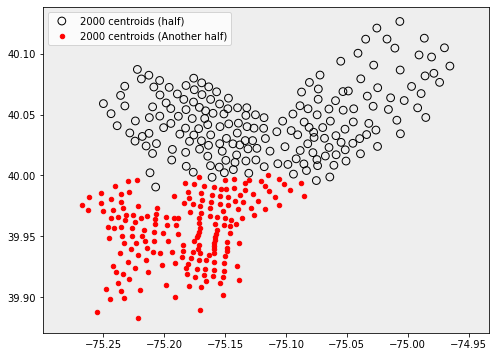

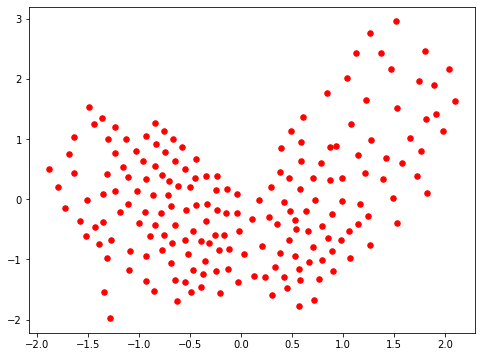

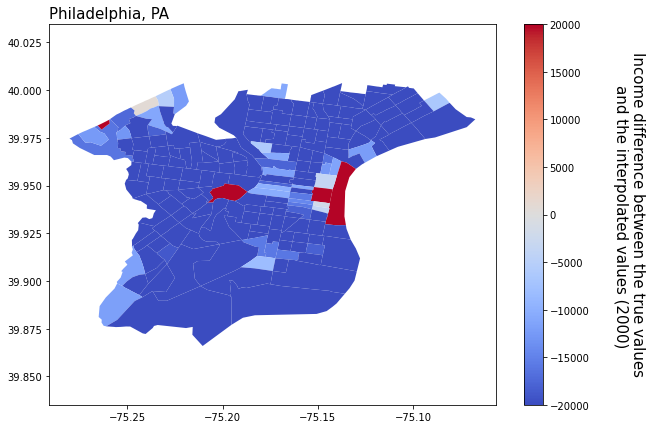

In [18]:
# Training on only half of the 2000 data
train_pct_index = int(0.5 * len(inc00sh))
X = inc00sh[:train_pct_index]
Y = inc00sh[train_pct_index:]

# -- Create the features array(lat/lon)
# -- labeled data (2000 adjusted median incomes) for the model from the inc00sh GeoDataFrame
lonX = X.centroid.x
latX = X.centroid.y
lonY = Y.centroid.x
latY = Y.centroid.y
# Plot1
fig, ax = plt.subplots(figsize=(8, 6))
plt1 = ax.scatter(lonX, latX, facecolor="none", color="k", s=60, label="2000 centroids (half)")
plt2 = ax.scatter(lonY, latY, c="r", s=20, label="2000 centroids (Another half)")
ax.set_facecolor("#EEEEEE")
ax.legend()
ax.axis("equal")
fig.show()

# --Need the usual 2D array of Nobj x Nfeat
posX = np.vstack([lonX, latX]).T
# --and an Nobj "target"
# -- Make sure to use .values.copy() for these so that these are numpy arrays and not pandas Series objects.
wfX = X["income_2000_adj"].values.copy()
# -- Standardize the features array across objects
posXm = posX.mean(0)
posXs = posX.std(0)
wfXm = wfX.mean()
wfXs = wfX.std()
posX -= posXm
posX /= posXs
wfX -= wfXm
wfX /= wfXs
# Plot2
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(posX[:, 0], posX[:, 1], c="r", s=30)

# -- now we initialize the kernel and fit to the data
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(posX, wfX)
# -- now we can use this fit model to predict the 2000 census data at the 2016 census tract centroids
# -- create the features array
posY = np.vstack([lonY, latY]).T
# -- standardize
posY -= posXm
posY /= posXs
# -- predict
wfYpred = gpr.predict(posY)
# -- now un-standardize and reattatch to the GeoDF
Y["income_2000_interp"] = wfYpred * wfXs + wfXm
Y["income_diff_pred"] = Y["income_2000"] - Y["income_2000_interp"]
# Plot3
fig, ax = plt.subplots(figsize=[10, 7])
Y.plot("income_diff_pred", cmap="coolwarm", vmin=-20000, vmax=20000, legend=True, ax=ax)
ax.axis("equal")
ax.set_title("Philadelphia, PA", loc="left", fontsize=15)
fig.text(0.93, 0.5, "Income difference between the true values \nand the interpolated values (2000)", ha="center", 
         va="center", rotation=-90, fontsize=15)
fig.show()

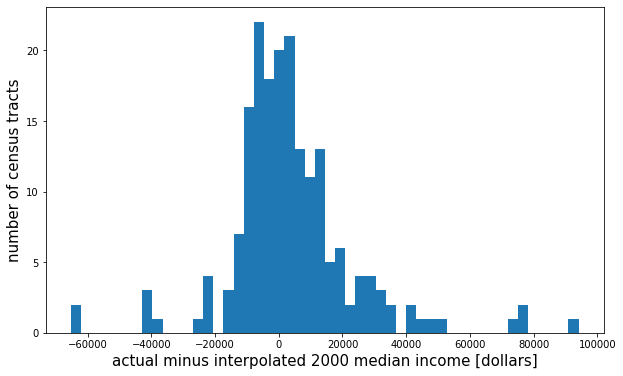

In [20]:
## For reference: Answer

# -- create features and target arrays
lon00  = inc00sh.centroid.x
lat00  = inc00sh.centroid.y
pos00 = np.vstack([lon00, lat00]).T
wf00 = inc00sh["income_2000_adj"].values.copy()

# -- select every other census tract to split into two samples
pos00_0 = pos00[::2].copy()
wf00_0 = wf00[::2].copy()
pos00_1 = pos00[1::2].copy()
wf00_1 = wf00[1::2].copy()

# -- standardize (in units of the first sample)
pos00_0st = (pos00_0 - pos00_0.mean(axis=0, keepdims=True)) / pos00_0.std(axis=0, keepdims=True)
wf00_0st = (wf00_0 - wf00_0.mean()) / wf00_0.std()
pos00_1st = (pos00_1 - pos00_0.mean(axis=0, keepdims=True)) / pos00_0.std(axis=0, keepdims=True)
wf00_1st = (wf00_1 - wf00_0.mean()) / wf00_0.std()

# -- fit a Gaussian Process Regressor to first half
kernel   = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr_half = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr_half.fit(pos00_0st, wf00_0st)

# -- predict second half
pred00_1st = gpr_half.predict(pos00_1st)

# -- unstandardize the prediction
pred00_1 = pred00_1st * wf00_0.std() + wf00_0.mean()

# -- take the difference between the prediction and the target
diff00_1 = wf00_1 - pred00_1

# -- plot the histogram of differences
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(diff00_1, bins=50)
ax.set_xlabel("actual minus interpolated 2000 median income [dollars]", fontsize=15)
ax.set_ylabel("number of census tracts", fontsize=15)
fig.show()